In [64]:
library(data.table)
library(tidyverse)

In [65]:
all = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/TWAS_QTL_gene_list.tsv")
AD1 = all |> filter(str_detect(event_id,"image_AD1"))
AD2 = all |> filter(str_detect(event_id,"image_AD2"))
Aging1 = all |> filter(str_detect(event_id,"image_Aging1"))
Aging2 = all |> filter(str_detect(event_id,"image_Aging2"))
Aging3 = all |> filter(str_detect(event_id,"image_Aging3"))
Aging4 = all |> filter(str_detect(event_id,"image_Aging4"))
Aging5 = all |> filter(str_detect(event_id,"image_Aging5"))
TL1 = all |> filter(str_detect(event_id,"TL1"))


In [66]:
AD = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/AD_mr_gene_list.gene_list.tsv")
AD_gene = AD$gene_id |> unique()

In [67]:
AD_AD1_Aging3 = union(intersect(AD$gene_id, Aging3$gene_id), intersect(AD$gene_id, AD1$gene_id)) |> unique()

In [68]:
TL1_Aging5 = intersect(TL1$gene_id, Aging5$gene_id)

In [69]:
TL1_AD1_AD2 = union(intersect(TL1$gene_id, AD1$gene_id), intersect(TL1$gene_id, AD2$gene_id)) |> unique()

In [70]:
AD2_Aging5 = intersect(AD2$gene_id, Aging5$gene_id)

In [71]:
AD2_not_Aging2 = setdiff(AD2$gene_id, Aging2$gene_id)


In [72]:
TL1_AD1_Aging3 = union(intersect(TL1$gene_id, Aging3$gene_id), intersect(TL1$gene_id, AD1$gene_id)) |> unique()

In [30]:
TL1_AD1_overlap = intersect(TL1$gene_id, AD1$gene_id) |> unique()

In [31]:
AD2_Aging4_overlap = intersect(AD2$gene_id, Aging4$gene_id) |> unique()

In [32]:
AD1_Aging5_overlap = intersect(AD1$gene_id, Aging5$gene_id)|> unique()

In [33]:
AD2_Aging2 = union(AD2$gene_id, Aging2$gene_id)|> unique()

In [34]:
AD = union(AD1$gene_id, AD2$gene_id)|> unique()

In [35]:
AD2_Aging2_overlap <- intersect(AD2$gene_id, Aging2$gene_id) |> unique()


In [18]:

library(clusterProfiler)
library(org.Hs.eg.db)


## AD

In [19]:
AD_ego <- enrichGO(
  gene          = AD_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [20]:
head(AD_ego, n=15)

ID         Description                                        
GO:0010975 GO:0010975 regulation of neuron projection development        
GO:0030705 GO:0030705 cytoskeleton-dependent intracellular transport     
GO:0099111 GO:0099111 microtubule-based transport                        
GO:0051656 GO:0051656 establishment of organelle localization            
GO:0010970 GO:0010970 transport along microtubule                        
GO:0016358 GO:0016358 dendrite development                               
GO:0032535 GO:0032535 regulation of cellular component size              
GO:0007409 GO:0007409 axonogenesis                                       
GO:0050770 GO:0050770 regulation of axonogenesis                         
GO:0048813 GO:0048813 dendrite morphogenesis                             
GO:0031346 GO:0031346 positive regulation of cell projection organization
GO:0007018 GO:0007018 microtubule-based movement                         
GO:1990778 GO:1990778 protein localization to cell periphery             
GO:0016482 GO:0016482 cytosolic transport                                
GO:0050767 GO:0050767 regulation of neurogenesis                         
           GeneRatio BgRatio   pvalue       p.adjust     qvalue      
GO:0010975 205/5358  484/21261 6.061389e-17 4.008396e-13 3.331212e-13
GO:0030705 108/5358  228/21261 3.166214e-13 1.046909e-09 8.700423e-10
GO:0099111 105/5358  221/21261 5.293289e-13 1.166817e-09 9.696934e-10
GO:0051656 194/5358  495/21261 2.999001e-12 4.958099e-09 4.120470e-09
GO:0010970 87/5358   179/21261 1.099831e-11 1.454636e-08 1.208888e-08
GO:0016358 115/5358  260/21261 1.545626e-11 1.703538e-08 1.415740e-08
GO:0032535 160/5358  397/21261 1.949772e-11 1.776805e-08 1.476629e-08
GO:0007409 185/5358  476/21261 2.217547e-11 1.776805e-08 1.476629e-08
GO:0050770 83/5358   170/21261 2.418153e-11 1.776805e-08 1.476629e-08
GO:0048813 75/5358   151/21261 7.761091e-11 5.132410e-08 4.265332e-08
GO:0031346 153/5358  386/21261 2.269861e-10 1.364599e-07 1.134062e-07
GO:0007018 171/5358  447/21261 5.288800e-10 2.914570e-07 2.422178e-07
GO:1990778 148/5358  379/21261 1.501214e-09 7.436481e-07 6.180150e-07
GO:0016482 91/5358   205/21261 1.574334e-09 7.436481e-07 6.180150e-07
GO:0050767 162/5358  427/21261 2.995140e-09 1.320457e-06 1.097377e-06
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [21]:
AD_ego %>% as.data.frame %>% filter(str_detect(Description, 'cili|vesicle|transport')) |> head()


ID         Description                                    GeneRatio
GO:0030705 GO:0030705 cytoskeleton-dependent intracellular transport 108/5358 
GO:0099111 GO:0099111 microtubule-based transport                    105/5358 
GO:0010970 GO:0010970 transport along microtubule                    87/5358  
GO:0016482 GO:0016482 cytosolic transport                            91/5358  
GO:0044782 GO:0044782 cilium organization                            161/5358 
GO:0060271 GO:0060271 cilium assembly                                151/5358 
           BgRatio   pvalue       p.adjust     qvalue      
GO:0030705 228/21261 3.166214e-13 1.046909e-09 8.700423e-10
GO:0099111 221/21261 5.293289e-13 1.166817e-09 9.696934e-10
GO:0010970 179/21261 1.099831e-11 1.454636e-08 1.208888e-08
GO:0016482 205/21261 1.574334e-09 7.436481e-07 6.180150e-07
GO:0044782 425/21261 3.785994e-09 1.564799e-06 1.300439e-06
GO:0060271 396/21261 6.888785e-09 2.009314e-06 1.669857e-06
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0030705 ENSG00000067606/ENSG00000188807/ENSG00000054523/ENSG00000117245/ENSG00000070831/ENSG00000186094/ENSG00000134709/ENSG00000117155/ENSG00000137942/ENSG00000162722/ENSG00000118965/ENSG00000021574/ENSG00000138095/ENSG00000169994/ENSG00000123607/ENSG00000077380/ENSG00000128641/ENSG00000078018/ENSG00000204104/ENSG00000130294/ENSG00000134108/ENSG00000182606/ENSG00000181789/ENSG00000163913/ENSG00000144868/ENSG00000198836/ENSG00000197386/ENSG0000

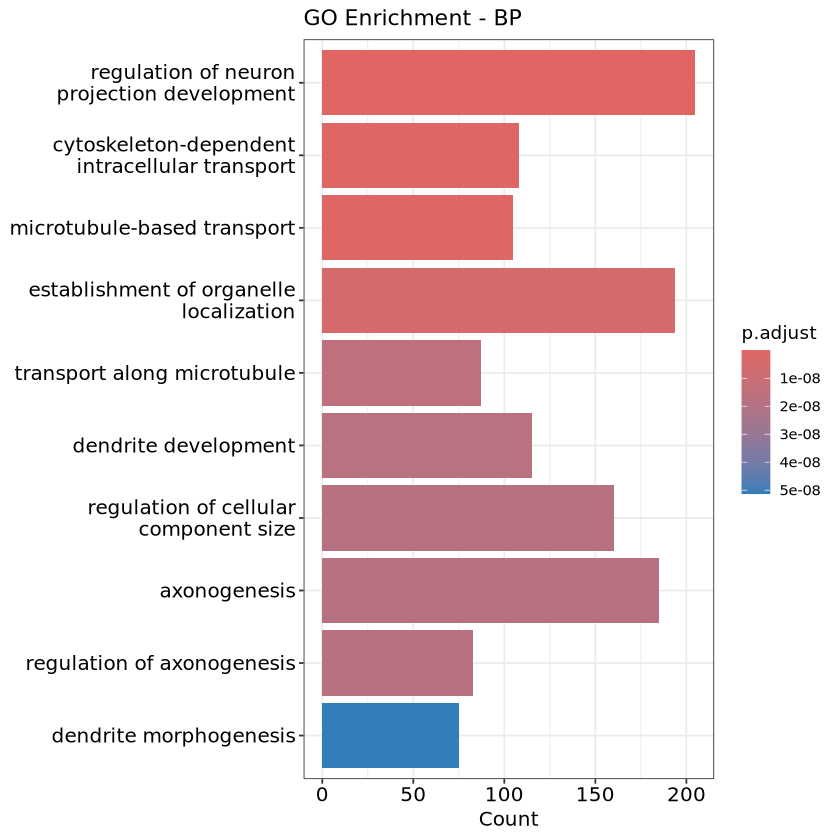

In [22]:
barplot(AD_ego, showCategory = 10, title = "GO Enrichment - BP")

In [23]:
AD_ego %>% as.data.frame %>% filter(str_detect(Description, 'cili|vesicle|transport')) |> head()


ID         Description                                    GeneRatio
GO:0030705 GO:0030705 cytoskeleton-dependent intracellular transport 108/5358 
GO:0099111 GO:0099111 microtubule-based transport                    105/5358 
GO:0010970 GO:0010970 transport along microtubule                    87/5358  
GO:0016482 GO:0016482 cytosolic transport                            91/5358  
GO:0044782 GO:0044782 cilium organization                            161/5358 
GO:0060271 GO:0060271 cilium assembly                                151/5358 
           BgRatio   pvalue       p.adjust     qvalue      
GO:0030705 228/21261 3.166214e-13 1.046909e-09 8.700423e-10
GO:0099111 221/21261 5.293289e-13 1.166817e-09 9.696934e-10
GO:0010970 179/21261 1.099831e-11 1.454636e-08 1.208888e-08
GO:0016482 205/21261 1.574334e-09 7.436481e-07 6.180150e-07
GO:0044782 425/21261 3.785994e-09 1.564799e-06 1.300439e-06
GO:0060271 396/21261 6.888785e-09 2.009314e-06 1.669857e-06
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0030705 ENSG00000067606/ENSG00000188807/ENSG00000054523/ENSG00000117245/ENSG00000070831/ENSG00000186094/ENSG00000134709/ENSG00000117155/ENSG00000137942/ENSG00000162722/ENSG00000118965/ENSG00000021574/ENSG00000138095/ENSG00000169994/ENSG00000123607/ENSG00000077380/ENSG00000128641/ENSG00000078018/ENSG00000204104/ENSG00000130294/ENSG00000134108/ENSG00000182606/ENSG00000181789/ENSG00000163913/ENSG00000144868/ENSG00000198836/ENSG00000197386/ENSG0000

In [24]:
AD_ego_cc <- enrichGO(
  gene          = AD_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [25]:
head(AD_ego_cc, n=10)

ID         Description                 GeneRatio BgRatio  
GO:0031252 GO:0031252 cell leading edge           188/5622  461/22568
GO:0005938 GO:0005938 cell cortex                 136/5622  318/22568
GO:0001726 GO:0001726 ruffle                      91/5622   197/22568
GO:0032279 GO:0032279 asymmetric synapse          146/5622  363/22568
GO:0014069 GO:0014069 postsynaptic density        140/5622  347/22568
GO:0030427 GO:0030427 site of polarized growth    86/5622   185/22568
GO:0098984 GO:0098984 neuron to neuron synapse    155/5622  395/22568
GO:0030426 GO:0030426 growth cone                 84/5622   180/22568
GO:0150034 GO:0150034 distal axon                 122/5622  295/22568
GO:0099572 GO:0099572 postsynaptic specialization 150/5622  383/22568
           pvalue       p.adjust     qvalue      
GO:0031252 3.032338e-14 2.365223e-11 1.771524e-11
GO:0005938 1.895105e-12 7.390908e-10 5.535700e-10
GO:0001726 6.429173e-11 1.439941e-08 1.078498e-08
GO:0032279 7.384311e-11 1.439941e-08 1.078498e-08
GO:0014069 1.395607e-10 1.774893e-08 1.329373e-08
GO:0030427 1.422896e-10 1.774893e-08 1.329373e-08
GO:0098984 1.712165e-10 1.774893e-08 1.329373e-08
GO:0030426 1.820403e-10 1.774893e-08 1.329373e-08
GO:0150034 3.414184e-10 2.958960e-08 2.216225e-08
GO:0099572 3.945869e-10 3.077778e-08 2.305218e-08
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

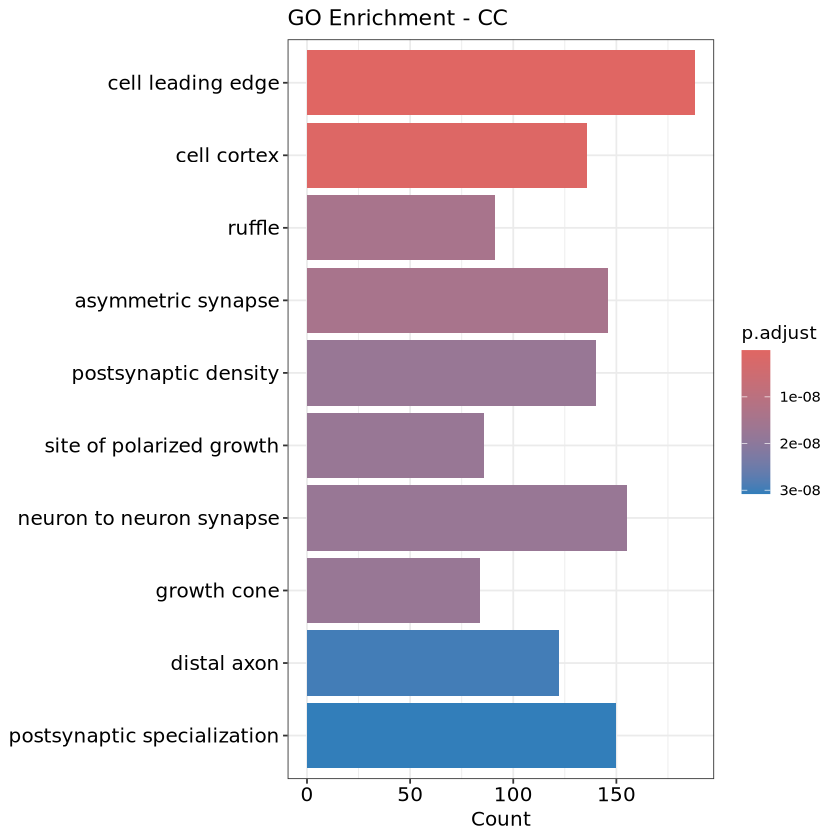

In [26]:
barplot(AD_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [27]:
AD_ego_mf <- enrichGO(
  gene          = AD_gene,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [28]:
head(AD_ego_mf, n=5)

ID         Description                  GeneRatio BgRatio  
GO:0005516 GO:0005516 calmodulin binding           104/5486  216/21059
GO:0035091 GO:0035091 phosphatidylinositol binding 130/5486  292/21059
GO:0045296 GO:0045296 cadherin binding             151/5486  359/21059
GO:0003779 GO:0003779 actin binding                188/5486  475/21059
GO:0015631 GO:0015631 tubulin binding              162/5486  397/21059
           pvalue       p.adjust     qvalue      
GO:0005516 2.174140e-12 2.858994e-09 2.332051e-09
GO:0035091 5.246292e-12 3.449437e-09 2.813669e-09
GO:0045296 2.257899e-11 9.897122e-09 8.072978e-09
GO:0003779 5.087983e-11 1.672674e-08 1.364383e-08
GO:0015631 7.317711e-11 1.924558e-08 1.569842e-08
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0005516 ENSG00000158109/ENSG00000127481/ENSG00000130770/ENSG00000159023/ENSG00000116761/ENSG00000143622/ENSG00000117152/ENSG00000143333/ENSG00000116741/ENSG00000081248/ENSG00000058668/ENSG00000162889/ENSG00000143473/ENSG00000154358/ENSG00000198626/ENSG00000138031

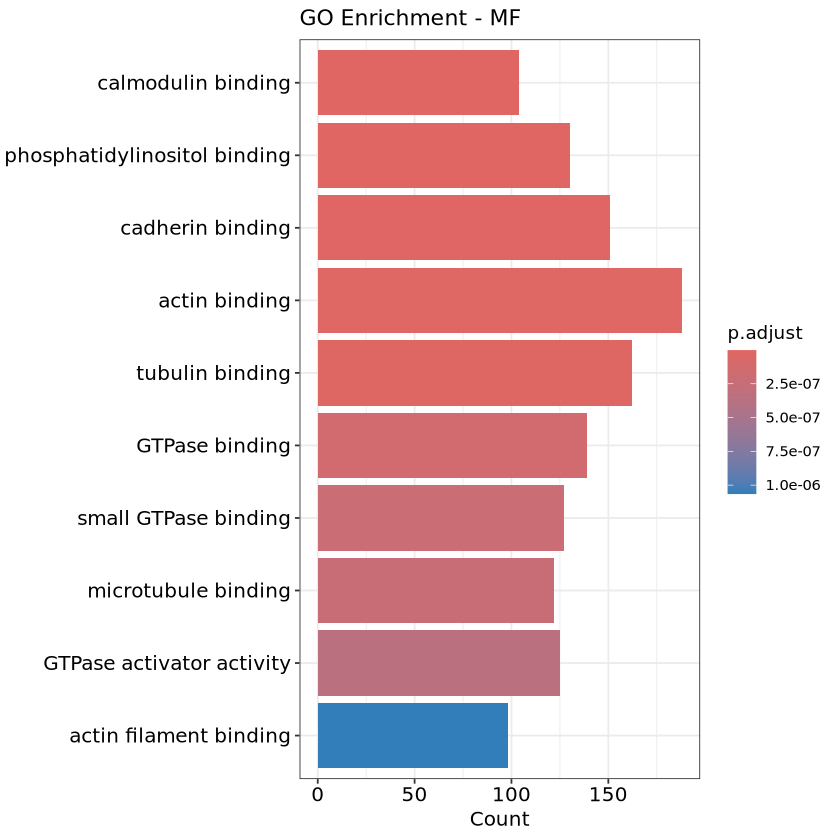

In [29]:
barplot(AD_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [30]:
entrez_ids <- bitr(AD_gene, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD_gene, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“2.53% of input gene IDs are fail to map...”
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [31]:
kegg_enrich %>% head(n=20)

category                            
hsa04360 Organismal Systems                  
hsa04070 Environmental Information Processing
hsa04510 Cellular Processes                  
hsa00562 Metabolism                          
hsa04814 Cellular Processes                  
hsa04015 Environmental Information Processing
hsa04144 Cellular Processes                  
hsa01521 Human Diseases                      
hsa04929 Organismal Systems                  
hsa04520 Cellular Processes                  
hsa00230 Metabolism                          
hsa04820 NA                                  
hsa04713 Organismal Systems                  
hsa04611 Organismal Systems                  
hsa04148 Cellular Processes                  
hsa04066 Environmental Information Processing
hsa04512 Environmental Information Processing
hsa04340 Environmental Information Processing
hsa04020 Environmental Information Processing
hsa04810 Cellular Processes                  
         subcategory                         ID      
hsa04360 Development and regeneration        hsa04360
hsa04070 Signal transduction                 hsa04070
hsa04510 Cellular community - eukaryotes     hsa04510
hsa00562 Carbohydrate metabolism             hsa00562
hsa04814 Cell motility                       hsa04814
hsa04015 Signal transduction                 hsa04015
hsa04144 Transport and catabolism            hsa04144
hsa01521 Drug resistance: antineoplastic     hsa01521
hsa04929 Endocrine system                    hsa04929
hsa04520 Cellular community - eukaryotes     hsa04520
hsa00230 Nucleotide metabolism               hsa00230
hsa04820 NA                                  hsa04820
hsa04713 Environmental adaptation            hsa04713
hsa04611 Immune system                       hsa04611
hsa04148 Transport and catabolism            hsa04148
hsa04066 Signal transduction                 hsa04066
hsa04512 Signaling molecules and interaction hsa04512
hsa04340 Signal transduction                 hsa04340
hsa04020 Signal transduction                 hsa04020
hsa04810 Cell motility                       hsa04810
         Description                               GeneRatio BgRatio 
hsa04360 Axon guidance                             91/2647   184/9446
hsa04070 Phosphatidylinositol signaling system     56/2647   98/9446 
hsa04510 Focal adhesion                            96/2647   203/9446
hsa00562 Inositol phosphate metabolism             44/2647   78/9446 
hsa04814 Motor proteins                            89/2647   197/9446
hsa04015 Rap1 signaling pathway                    93/2647   212/9446
hsa04144 Endocytosis                               107/2647  252/9446
hsa01521 EGFR tyrosine kinase inhibitor resistance 43/2647   80/9446 
hsa04929 GnRH secretion                            36/2647   65/9446 
hsa04520 Adherens junction                         47/2647   93/9446 
hsa00230 Purine metabolism                         60/2647   128/9446
hsa04820 Cytoskeleton in muscle cells              97/2647   233/9446
hsa04713 Circadian entrainment                     48/2647   97/9446 
hsa04611 Platelet activation                       58/2647   126/9446
hsa04148 Efferocytosis                             69/2647   157/9446
hsa04066 HIF-1 signaling pathway                   52/2647   110/9446
hsa04512 ECM-receptor interaction                  44/2647   89/9446 
hsa04340 Hedgehog signaling pathway                31/2647   56/9446 
hsa04020 Calcium signaling pathway                 102/2647  254/9446
hsa04810 Regulation of actin cytoskeleton          94/2647   232/9446
         pvalue       p.adjust     qvalue      
hsa04360 4.254604e-10 1.472093e-07 9.315344e-08
hsa04070 1.226644e-09 2.122093e-07 1.342852e-07
hsa04510 2.945526e-09 3.397174e-07 2.149717e-07
hsa00562 1.220095e-07 1.055382e-05 6.678414e-06
hsa04814 1.583102e-07 1.095507e-05 6.932321e-06
hsa04015 4.421181e-07 2.208058e-05 1.397250e-05
hsa04144 4.467169e-07 2.208058e-05 1.397250e-05
hsa01521 1.031423e-06 4.460903e-05 2.822841e-05
hsa0492

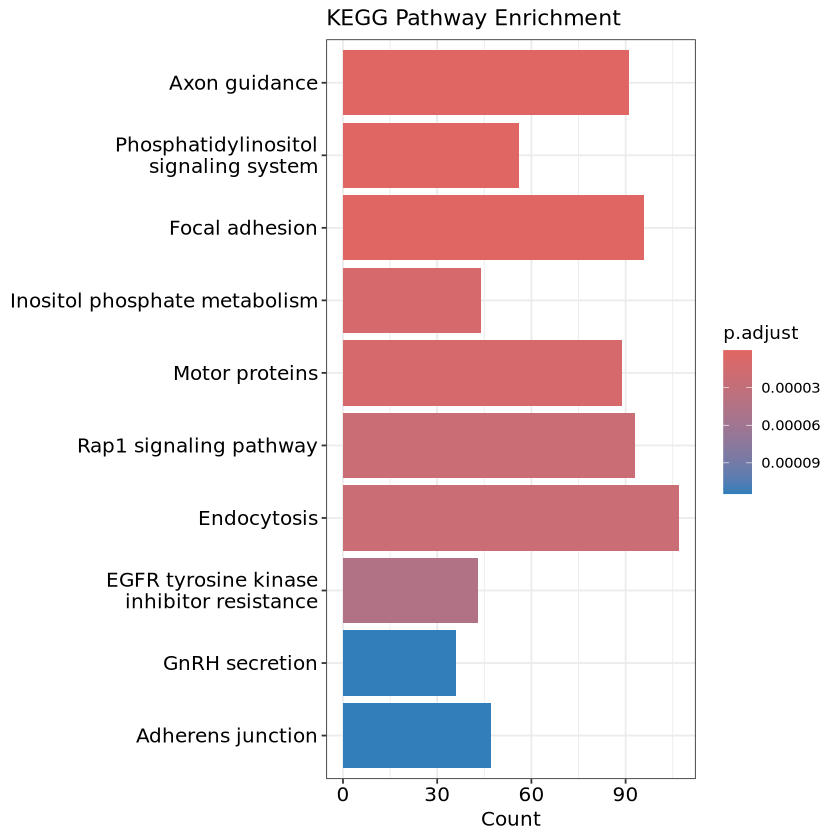

In [32]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## TL1

In [37]:
TL1_ego <- enrichGO(
  gene          = TL1$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [38]:
head(TL1_ego, n=15)

ID        
GO:0032200 GO:0032200
GO:0016233 GO:0016233
GO:0034502 GO:0034502
GO:0006334 GO:0006334
GO:0034728 GO:0034728
GO:0065004 GO:0065004
GO:0032205 GO:0032205
GO:0010833 GO:0010833
GO:0032211 GO:0032211
GO:0040029 GO:0040029
GO:0000723 GO:0000723
GO:0007004 GO:0007004
GO:0070199 GO:0070199
GO:0006278 GO:0006278
GO:2000279 GO:2000279
           Description                                                GeneRatio
GO:0032200 telomere organization                                      27/608   
GO:0016233 telomere capping                                           11/608   
GO:0034502 protein localization to chromosome                         18/608   
GO:0006334 nucleosome assembly                                        18/608   
GO:0034728 nucleosome organization                                    19/608   
GO:0065004 protein-DNA complex assembly                               25/608   
GO:0032205 negative regulation of telomere maintenance                9/608    
GO:0010833 telomere maintenance via telomere lengthening              13/608   
GO:0032211 negative regulation of telomere maintenance via telomerase 7/608    
GO:0040029 epigenetic regulation of gene expression                   22/608   
GO:0000723 telomere maintenance                                       18/608   
GO:0007004 telomere maintenance via telomerase                        11/608   
GO:0070199 establishment of protein localization to chromosome        7/608    
GO:0006278 RNA-templated DNA biosynthetic process                     11/608   
GO:2000279 negative regulation of DNA biosynthetic process            8/608    
           BgRatio   pvalue       p.adjust     qvalue      
GO:0032200 218/21261 1.682527e-10 7.122139e-07 6.765531e-07
GO:0016233 42/21261  1.828783e-08 3.232484e-05 3.070633e-05
GO:0034502 127/21261 2.290917e-08 3.232484e-05 3.070633e-05
GO:0006334 138/21261 8.480296e-08 8.974273e-05 8.524929e-05
GO:0034728 160/21261 1.695274e-07 1.435219e-04 1.363357e-04
GO:0065004 273/21261 3.450090e-07 2.434039e-04 2.312166e-04
GO:0032205 40/21261  1.492544e-06 9.025626e-04 8.573711e-04
GO:0010833 91/21261  1.868622e-06 9.887349e-04 9.392287e-04
GO:0032211 24/21261  3.422982e-06 1.609942e-03 1.529332e-03
GO:0040029 254/21261 4.328215e-06 1.832133e-03 1.740398e-03
GO:0000723 185/21261 6.476239e-06 2.492175e-03 2.367391e-03
GO:0007004 78/21261  1.308741e-05 4.438508e-03 4.216270e-03
GO:0070199 29/21261  1.363114e-05 4.438508e-03 4.216270e-03
GO:0006278 80/21261  1.674205e-05 5.004127e-03 4.753569e-03
GO:2000279 41/21261  1.773255e-05 5.004127e-03 4.753569e-03
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0032200 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000101442/ENSG00000197409/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000145414/ENSG00000286522/ENSG00000273983/ENSG00000278828/ENSG00000197153/ENSG00000275126/ENSG00000275379/ENSG00000204569/ENSG00000147601/ENSG00000102977/ENSG00000258366/ENSG00000163806/ENSG00000164362/ENSG00000132604/ENSG00000132383/ENSG00000133302
GO:0016233 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000147601/ENSG00000102977/ENSG00000258366/ENSG00000163806/ENSG00000132604                                                                                                                                                                                                                                                                
GO:0034502 ENSG00000117748/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000278463

In [77]:
TL1_ego %>% as.data.frame %>% filter(str_detect(Description, 'cili|vesicle|transport')) |> head()


ID         Description                            GeneRatio
GO:0006891 GO:0006891 intra-Golgi vesicle-mediated transport 5/608    
GO:0098693 GO:0098693 regulation of synaptic vesicle cycle   3/608    
GO:1902018 GO:1902018 negative regulation of cilium assembly 3/608    
GO:0051955 GO:0051955 regulation of amino acid transport     5/608    
GO:0015802 GO:0015802 basic amino acid transport             3/608    
GO:0048193 GO:0048193 Golgi vesicle transport                16/608   
           BgRatio   pvalue     p.adjust  qvalue   
GO:0006891 38/21261  0.00432756 0.1621663 0.1540466
GO:0098693 13/21261  0.00537217 0.1876076 0.1782141
GO:1902018 19/21261  0.01602957 0.3246563 0.3084007
GO:0051955 57/21261  0.02323795 0.3918974 0.3722750
GO:0015802 22/21261  0.02391773 0.3985975 0.3786396
GO:0048193 326/21261 0.02607372 0.4059903 0.3856623
           geneID                                                                                                                                                                                                                                                         
GO:0006891 ENSG00000213380/ENSG00000111481/ENSG00000181789/ENSG00000103051/ENSG00000105669                                                                                                                                                                                
GO:0098693 ENSG00000164061/ENSG00000101152/ENSG00000080815                                                                                                                                                                                                                
GO:1902018 ENSG00000057608/ENSG00000051825/ENSG00000047849                                                                                                                                                                                                                
GO:0051955 ENSG00000188338/ENSG00000167703/ENSG00000164082/ENSG00000080815/ENSG00000101180                                                                                                                                                                                
GO:0015802 ENSG00000188603/ENSG00000188338/ENSG00000139370                                                                                                                                                                                                                
GO:0048193 ENSG00000177951/ENSG00000092531/ENSG00000188603/ENSG00000101246/ENSG00000213380/ENSG00000223501/ENSG00000111481/ENSG00000125149/ENSG00000220205/ENSG00000181789/ENSG00000163558/ENSG00000249915/ENSG00000004059/ENSG00000103051/ENSG00000105669/ENSG00000138674
           Count
GO:0006891  5   
GO:0098693  3   
GO:1902018  3   
GO:0051955  5   
GO:0015802  3   
GO:0048193 16

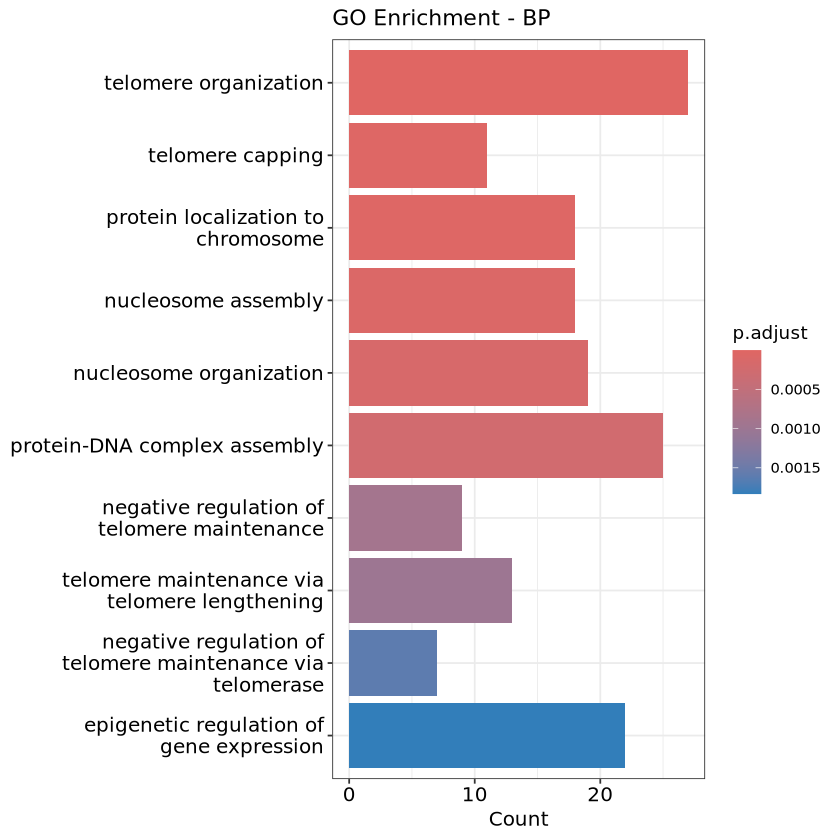

In [39]:
barplot(TL1_ego, showCategory = 10, title = "GO Enrichment - BP")

In [78]:
TL1_ego_cc %>% as.data.frame %>% filter(str_detect(Description, 'cili|vesicle|transport')) |> head()


ID         Description                            GeneRatio
GO:0030658 GO:0030658 transport vesicle membrane             23/639   
GO:0030662 GO:0030662 coated vesicle membrane                20/639   
GO:0012507 GO:0012507 ER to Golgi transport vesicle membrane 12/639   
GO:0030666 GO:0030666 endocytic vesicle membrane             19/639   
GO:0060198 GO:0060198 clathrin-sculpted vesicle              3/639    
GO:0030126 GO:0030126 COPI vesicle coat                      3/639    
           BgRatio   pvalue       p.adjust    qvalue     
GO:0030658 350/22568 0.0001780582 0.008520734 0.007806521
GO:0030662 308/22568 0.0005351977 0.020643341 0.018913003
GO:0012507 156/22568 0.0016612759 0.059805932 0.054792959
GO:0030666 324/22568 0.0023730696 0.075379859 0.069061469
GO:0060198 12/22568  0.0041061179 0.110865182 0.101572389
GO:0030126 13/22568  0.0052265697 0.128288529 0.117535299
           geneID                                                                                                                                                                                                                                                                                                                                                                         
GO:0030658 ENSG00000134262/ENSG00000101438/ENSG00000164061/ENSG00000204642/ENSG00000204592/ENSG00000168807/ENSG00000181031/ENSG00000101152/ENSG00000079689/ENSG00000204632/ENSG00000234745/ENSG00000198502/ENSG00000125149/ENSG00000220205/ENSG00000134207/ENSG00000249915/ENSG00000206503/ENSG00000204314/ENSG00000179344/ENSG00000196126/ENSG00000237541/ENSG00000204525/ENSG00000138674
GO:0030662 ENSG00000134262/ENSG00000101438/ENSG00000204642/ENSG00000204592/ENSG00000101152/ENSG00000204632/ENSG00000234745/ENSG00000198502/ENSG00000111481/ENSG00000220205/ENSG00000181789/ENSG00000249915/ENSG00000206503/ENSG00000179344/ENSG00000196126/ENSG00000237541/ENSG00000105669/ENSG00000204525/ENSG00000091513/ENSG00000138674                                                
GO:0012507 ENSG00000204642/ENSG00000204592/ENSG00000204632/ENSG00000234745/ENSG00000198502/ENSG00000249915/ENSG00000206503/ENSG00000179344/ENSG00000196126/ENSG00000237541/ENSG00000204525/ENSG00000138674                                                                                                                                                                                
GO:0030666 ENSG00000092531/ENSG00000074660/ENSG00000204642/ENSG00000204592/ENSG00000198018/ENSG00000172780/ENSG00000204632/ENSG00000234745/ENSG00000198502/ENSG00000168394/ENSG00000179331/ENSG00000220205/ENSG00000206503/ENSG00000179344/ENSG00000196126/ENSG00000237541/ENSG00000204525/ENSG00000091513/ENSG00000254087                                                                
GO:0060198 ENSG00000101438/ENSG00000101152/ENSG00000220205                                                                                                                                                                                                                                                                                                                                
GO:0030126 ENSG00000111481/ENSG00000181789/ENSG00000105669                                                                                                                                                                                                                                                                                                                                
           Count
GO:0030658 23   
GO:0030662 20   
GO:0012507 12   
GO:0030666 19   
GO:0060198  3   
GO:0030126  3

In [40]:
TL1_ego_cc <- enrichGO(
  gene          = TL1$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [41]:
head(TL1_ego_cc, n=10)

ID         Description                         GeneRatio BgRatio  
GO:0000781 GO:0000781 chromosome, telomeric region        27/639    199/22568
GO:0000786 GO:0000786 nucleosome                          21/639    137/22568
GO:0000782 GO:0000782 telomere cap complex                8/639     13/22568 
GO:0000783 GO:0000783 nuclear telomere cap complex        8/639     13/22568 
GO:0098687 GO:0098687 chromosomal region                  39/639    444/22568
GO:0140445 GO:0140445 chromosome, telomeric repeat region 8/639     14/22568 
GO:0016607 GO:0016607 nuclear speck                       31/639    500/22568
GO:0016605 GO:0016605 PML body                            13/639    133/22568
GO:0043505 GO:0043505 CENP-A containing nucleosome        5/639     18/22568 
GO:0061638 GO:0061638 CENP-A containing chromatin         5/639     18/22568 
           pvalue       p.adjust     qvalue      
GO:0000781 1.644875e-11 8.882325e-09 8.137803e-09
GO:0000786 3.012338e-10 5.061151e-08 4.636922e-08
GO:0000782 4.491961e-10 5.061151e-08 4.636922e-08
GO:0000783 4.491961e-10 5.061151e-08 4.636922e-08
GO:0098687 4.686251e-10 5.061151e-08 4.636922e-08
GO:0140445 1.022102e-09 9.198920e-08 8.427861e-08
GO:0016607 4.336450e-05 3.345261e-03 3.064859e-03
GO:0016605 1.060683e-04 6.101735e-03 5.590284e-03
GO:0043505 1.129951e-04 6.101735e-03 5.590284e-03
GO:0061638 1.129951e-04 6.101735e-03 5.590284e-03
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
GO:0000781 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000197238/ENSG00000273542/ENSG00000128513/ENSG00000104738/ENSG00000149311/ENSG00000257949/ENSG00000118655/ENSG00000213639/ENSG00000276410/ENSG00000275126/ENSG00000204569/ENSG00000147601/ENSG00000102977/ENSG00000101596/ENSG00000258366/ENSG00000163806/ENSG00000164362/ENSG00000094916/ENSG00000132604/ENSG00000132383/ENSG00000133302/ENSG00000092203/ENSG00000183765/ENSG00000100242                                                                                                                                                                                                
GO:0000786 ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000198959/ENSG00000286522/ENSG00000276410/ENSG00000278463/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000196747/ENSG00000197903/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000124635/ENSG00000133302                                                                                                                                                                                                                                                                                                
GO:0000782 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG00000257949/ENSG00000147601/ENSG00000102977/ENSG00000164362/ENSG00000132604                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
GO:0000783 ENSG00000107960/ENSG00000178971/ENSG00000128513/ENSG

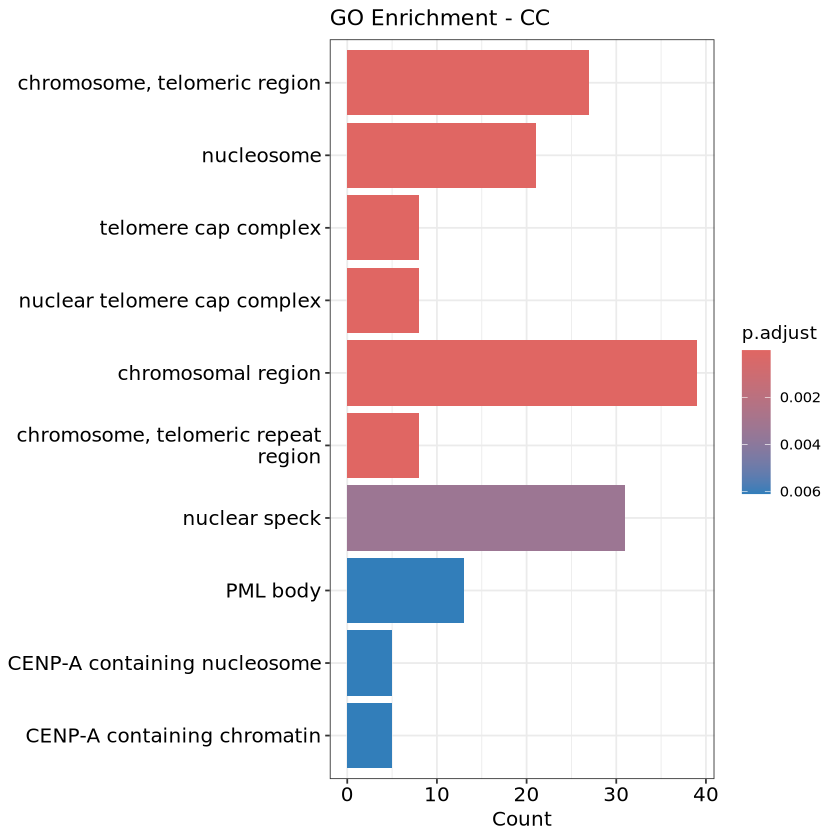

In [42]:
barplot(TL1_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [43]:
TL1_ego_mf <- enrichGO(
  gene          = TL1$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [44]:
head(TL1_ego_mf, n=5)

ID         Description                                   GeneRatio
GO:0030527 GO:0030527 structural constituent of chromatin           19/636   
GO:0043047 GO:0043047 single-stranded telomeric DNA binding         7/636    
GO:0098847 GO:0098847 sequence-specific single stranded DNA binding 7/636    
GO:0098505 GO:0098505 G-rich strand telomeric DNA binding           6/636    
GO:0042162 GO:0042162 telomeric DNA binding                         10/636   
           BgRatio   pvalue       p.adjust     qvalue      
GO:0030527 101/21059 1.634238e-10 1.255095e-07 1.212777e-07
GO:0043047 12/21059  1.539659e-08 5.912290e-06 5.712945e-06
GO:0098847 15/21059  1.155618e-07 2.695066e-05 2.604196e-05
GO:0098505 10/21059  1.403680e-07 2.695066e-05 2.604196e-05
GO:0042162 40/21059  2.199851e-07 3.378971e-05 3.265042e-05
           geneID                                                                                                                                                                                                                                                                                                         
GO:0030527 ENSG00000180596/ENSG00000197409/ENSG00000197238/ENSG00000233822/ENSG00000273542/ENSG00000286522/ENSG00000276410/ENSG00000278463/ENSG00000273802/ENSG00000273983/ENSG00000185130/ENSG00000196747/ENSG00000197903/ENSG00000278828/ENSG00000197153/ENSG00000274641/ENSG00000275126/ENSG00000275379/ENSG00000124635
GO:0043047 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                
GO:0098847 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                
GO:0098505 ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000147601/ENSG00000132604/ENSG00000132383                                                                                                                                                                                                                
GO:0042162 ENSG00000107960/ENSG00000178971/ENSG00000117748/ENSG00000128513/ENSG00000257949/ENSG00000147601/ENSG00000102977/ENSG00000164362/ENSG00000132604/ENSG00000132383                                                                                                                                                
           Count
GO:0030527 19   
GO:0043047  7   
GO:0098847  7   
GO:0098505  6   
GO:0042162 10

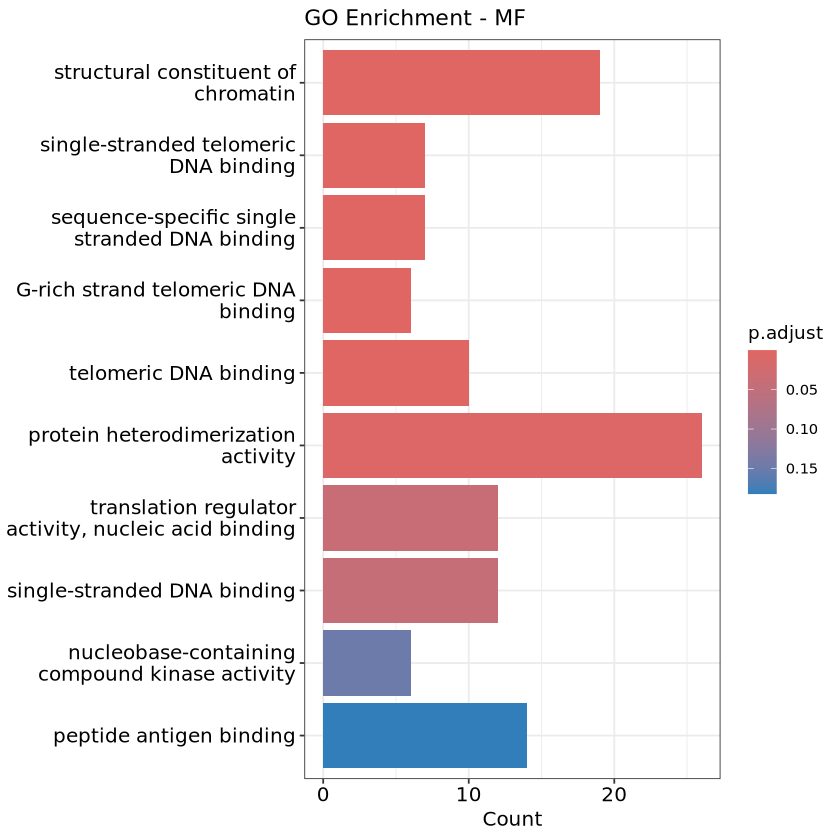

In [45]:
barplot(TL1_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [46]:
entrez_ids <- bitr(TL1$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(TL1$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
“3.28% of input gene IDs are fail to map...”


In [47]:
kegg_enrich %>% head(n=20)

category                            
hsa05322 Human Diseases                      
hsa04612 Organismal Systems                  
hsa05330 Human Diseases                      
hsa04940 Human Diseases                      
hsa05332 Human Diseases                      
hsa05416 Human Diseases                      
hsa05320 Human Diseases                      
hsa05203 Human Diseases                      
hsa05034 Human Diseases                      
hsa04613 Organismal Systems                  
hsa05168 Human Diseases                      
hsa05310 Human Diseases                      
hsa05166 Human Diseases                      
hsa05169 Human Diseases                      
hsa04218 Cellular Processes                  
hsa04145 Cellular Processes                  
hsa04514 Environmental Information Processing
hsa00240 Metabolism                          
hsa05150 Human Diseases                      
hsa04672 Organismal Systems                  
         subcategory                         ID      
hsa05322 Immune disease                      hsa05322
hsa04612 Immune system                       hsa04612
hsa05330 Immune disease                      hsa05330
hsa04940 Endocrine and metabolic disease     hsa04940
hsa05332 Immune disease                      hsa05332
hsa05416 Cardiovascular disease              hsa05416
hsa05320 Immune disease                      hsa05320
hsa05203 Cancer: overview                    hsa05203
hsa05034 Substance dependence                hsa05034
hsa04613 Immune system                       hsa04613
hsa05168 Infectious disease: viral           hsa05168
hsa05310 Immune disease                      hsa05310
hsa05166 Infectious disease: viral           hsa05166
hsa05169 Infectious disease: viral           hsa05169
hsa04218 Cell growth and death               hsa04218
hsa04145 Transport and catabolism            hsa04145
hsa04514 Signaling molecules and interaction hsa04514
hsa00240 Nucleotide metabolism               hsa00240
hsa05150 Infectious disease: bacterial       hsa05150
hsa04672 Immune system                       hsa04672
         Description                                  GeneRatio BgRatio 
hsa05322 Systemic lupus erythematosus                 31/303    144/9446
hsa04612 Antigen processing and presentation          20/303    82/9446 
hsa05330 Allograft rejection                          14/303    39/9446 
hsa04940 Type I diabetes mellitus                     14/303    44/9446 
hsa05332 Graft-versus-host disease                    14/303    45/9446 
hsa05416 Viral myocarditis                            16/303    70/9446 
hsa05320 Autoimmune thyroid disease                   14/303    54/9446 
hsa05203 Viral carcinogenesis                         24/303    205/9446
hsa05034 Alcoholism                                   23/303    191/9446
hsa04613 Neutrophil extracellular trap formation      22/303    196/9446
hsa05168 Herpes simplex virus 1 infection             21/303    183/9446
hsa05310 Asthma                                       8/303     32/9446 
hsa05166 Human T-cell leukemia virus 1 infection      21/303    224/9446
hsa05169 Epstein-Barr virus infection                 19/303    205/9446
hsa04218 Cellular senescence                          16/303    157/9446
hsa04145 Phagosome                                    16/303    159/9446
hsa04514 Cell adhesion molecules                      16/303    160/9446
hsa00240 Pyrimidine metabolism                        9/303     58/9446 
hsa05150 Staphylococcus aureus infection              12/303    102/9446
hsa04672 Intestinal immune network for IgA production 8/303     50/9446 
         pvalue       p.adjust     qvalue      
hsa05322 1.274367e-17 3.772126e-15 3.380426e-15
hsa04612 7.334953e-13 1.085573e-10 9.728464e-11
hsa05330 6.639661e-12 6.551132e-10 5.870858e-10
hsa04940 4.377319e-11 3.239216e-09 2.902854e-09
hsa05332 6.172674e-11 3.654223e-09 3.274766e-09
hsa05416 4.392130e-10 2.166784e-08 1.941784e-08
hsa05320 9.249384e-10 3.911168e-08 3.505

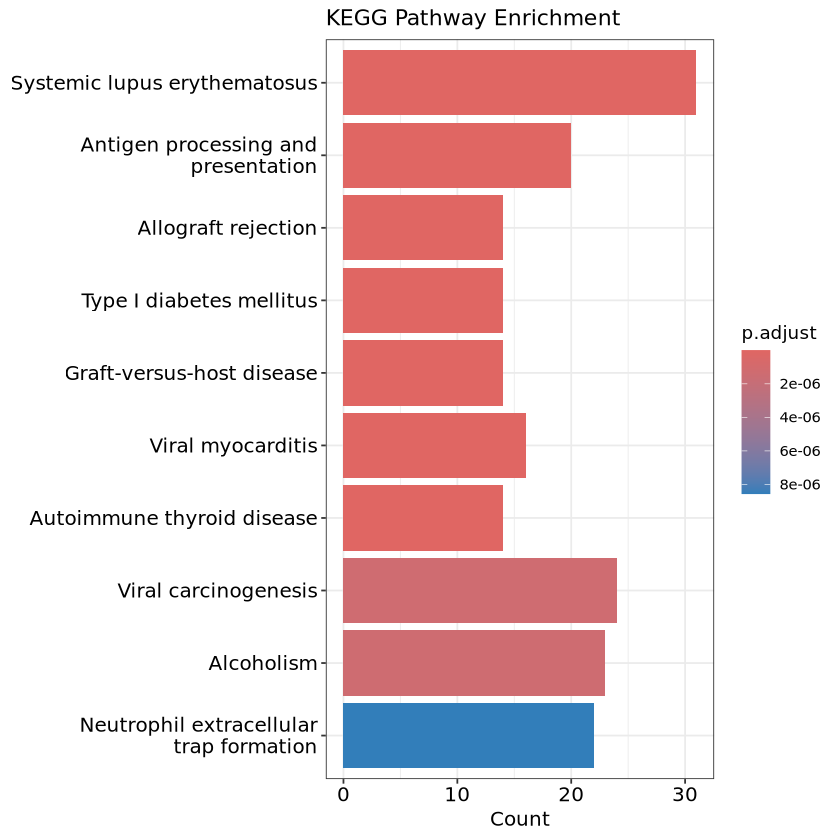

In [48]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## AD2_not_Aging2

In [29]:
AD2_not_Aging2_ego <- enrichGO(
  gene          = AD2_not_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [30]:
head(AD2_not_Aging2_ego, n=15)

ID        
GO:0007020 GO:0007020
GO:0009048 GO:0009048
GO:0010972 GO:0010972
GO:0007549 GO:0007549
GO:1902750 GO:1902750
GO:0000086 GO:0000086
GO:1903749 GO:1903749
GO:0044839 GO:0044839
GO:0085020 GO:0085020
GO:0046785 GO:0046785
GO:0031056 GO:0031056
GO:1905477 GO:1905477
GO:1900095 GO:1900095
GO:0010389 GO:0010389
GO:0033147 GO:0033147
           Description                                                                  
GO:0007020 microtubule nucleation                                                       
GO:0009048 dosage compensation by inactivation of X chromosome                          
GO:0010972 negative regulation of G2/M transition of mitotic cell cycle                 
GO:0007549 dosage compensation                                                          
GO:1902750 negative regulation of cell cycle G2/M phase transition                      
GO:0000086 G2/M transition of mitotic cell cycle                                        
GO:1903749 positive regulation of establishment of protein localization to mitochondrion
GO:0044839 cell cycle G2/M phase transition                                             
GO:0085020 protein K6-linked ubiquitination                                             
GO:0046785 microtubule polymerization                                                   
GO:0031056 regulation of histone modification                                           
GO:1905477 positive regulation of protein localization to membrane                      
GO:1900095 regulation of dosage compensation by inactivation of X chromosome            
GO:0010389 regulation of G2/M transition of mitotic cell cycle                          
GO:0033147 negative regulation of intracellular estrogen receptor signaling pathway     
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0007020 4/93      57/21261  0.0001134831 0.1631913 0.1550492
GO:0009048 3/93      34/21261  0.0004394510 0.1631913 0.1550492
GO:0010972 4/93      83/21261  0.0004841224 0.1631913 0.1550492
GO:0007549 3/93      36/21261  0.0005210389 0.1631913 0.1550492
GO:1902750 4/93      86/21261  0.0005538967 0.1631913 0.1550492
GO:0000086 5/93      158/21261 0.0006532008 0.1631913 0.1550492
GO:1903749 3/93      45/21261  0.0010064810 0.1690013 0.1605693
GO:0044839 5/93      174/21261 0.0010076767 0.1690013 0.1605693
GO:0085020 2/93      11/21261  0.0010146843 0.1690013 0.1605693
GO:0046785 4/93      110/21261 0.0013904653 0.1903868 0.1808879
GO:0031056 3/93      54/21261  0.0017100809 0.1903868 0.1808879
GO:1905477 4/93      117/21261 0.0017446178 0.1903868 0.1808879
GO:1900095 2/93      15/21261  0.0019151817 0.1903868 0.1808879
GO:0010389 4/93      121/21261 0.0019728463 0.1903868 0.1808879
GO:0033147 2/93      16/21261  0.0021825593 0.1903868 0.1808879
           geneID                                                                         
GO:0007020 ENSG00000176155/ENSG00000037042/ENSG00000131462/ENSG00000175216                
GO:0009048 ENSG00000012048/ENSG00000120071/ENSG00000025293                                
GO:0010972 ENSG00000012048/ENSG00000137331/ENSG00000254093/ENSG00000139579                
GO:0007549 ENSG00000012048/ENSG00000120071/ENSG00000025293                                
GO:1902750 ENSG00000012048/ENSG00000137331/ENSG00000254093/ENSG00000139579                
GO:0000086 ENSG00000176155/ENSG00000012048/ENSG00000137331/ENSG00000254093/ENSG00000139579
GO:1903749 ENSG00000136448/ENSG00000109332/ENSG00000175224                                
GO:0044839 ENSG00000176155/ENSG00000012048/ENSG00000137331/ENSG00000254093/ENSG00000139579
GO:0085020 ENSG00000012048/ENSG00000109332                                                
GO:0046785 ENSG00000176155/ENSG00000037042/ENSG00000131462/ENSG00000175216                
GO:0031056 ENSG00000012048/ENSG00000120071/ENSG00000025293                                
GO:1905477 ENSG00000115306/ENSG00000136448/ENSG00000134569/ENSG00000156599                
GO:1900095 ENSG00000120071/E

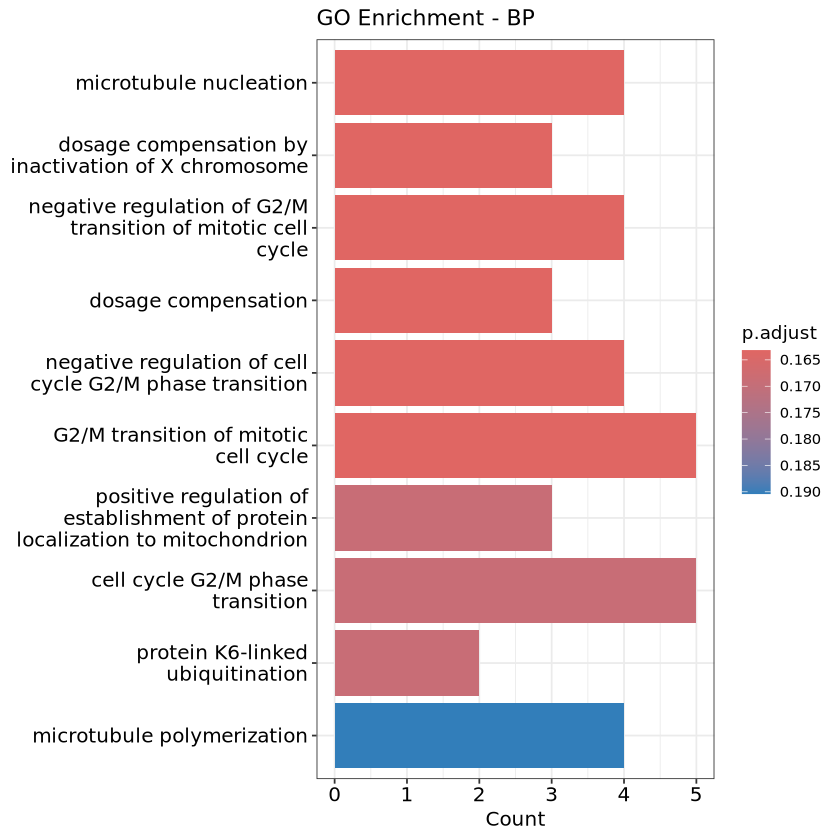

In [31]:
barplot(AD2_not_Aging2_ego, showCategory = 10, title = "GO Enrichment - BP")

In [32]:
AD2_not_Aging2_ego_cc <- enrichGO(
  gene          = AD2_not_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [33]:
head(AD2_not_Aging2_ego_cc, n=10)

ID         Description                                         
GO:0000930 GO:0000930 gamma-tubulin complex                               
GO:0044545 GO:0044545 NSL complex                                         
GO:0043505 GO:0043505 CENP-A containing nucleosome                        
GO:0061638 GO:0061638 CENP-A containing chromatin                         
GO:0034506 GO:0034506 chromosome, centromeric core domain                 
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0031252 GO:0031252 cell leading edge                                   
GO:0000242 GO:0000242 pericentriolar material                             
GO:0005876 GO:0005876 spindle microtubule                                 
GO:0000775 GO:0000775 chromosome, centromeric region                      
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0000930 3/94      20/22568  7.577878e-05 0.01530731 0.01340088
GO:0044545 2/94      13/22568  1.299441e-03 0.09101411 0.07967884
GO:0043505 2/94      18/22568  2.514590e-03 0.09101411 0.07967884
GO:0061638 2/94      18/22568  2.514590e-03 0.09101411 0.07967884
GO:0034506 2/94      20/22568  3.105828e-03 0.09101411 0.07967884
GO:0099091 2/94      20/22568  3.105828e-03 0.09101411 0.07967884
GO:0031252 7/94      461/22568 3.153954e-03 0.09101411 0.07967884
GO:0000242 2/94      23/22568  4.102223e-03 0.10358112 0.09068071
GO:0005876 3/94      83/22568  5.054421e-03 0.11344368 0.09931494
GO:0000775 5/94      277/22568 6.071347e-03 0.12264121 0.10736698
           geneID                                                                                                         
GO:0000930 ENSG00000037042/ENSG00000131462/ENSG00000012048                                                                
GO:0044545 ENSG00000120071/ENSG00000025293                                                                                
GO:0043505 ENSG00000278463/ENSG00000275126                                                                                
GO:0061638 ENSG00000278463/ENSG00000275126                                                                                
GO:0034506 ENSG00000278463/ENSG00000275126                                                                                
GO:0099091 ENSG00000156599/ENSG00000198561                                                                                
GO:0031252 ENSG00000088280/ENSG00000115306/ENSG00000137312/ENSG00000131462/ENSG00000108852/ENSG00000149091/ENSG00000198561
GO:0000242 ENSG00000037042/ENSG00000131462                                                                                
GO:0005876 ENSG00000176155/ENSG00000037042/ENSG00000131462                                                                
GO:0000775 ENSG00000278463/ENSG00000120071/ENSG00000254093/ENSG00000275126/ENSG00000175216                                
           Count
GO:0000930 3    
GO:0044545 2    
GO:0043505 2    
GO:0061638 2    
GO:0034506 2    
GO:0099091 2    
GO:0031252 7    
GO:0000242 2    
GO:0005876 3    
GO:0000775 5

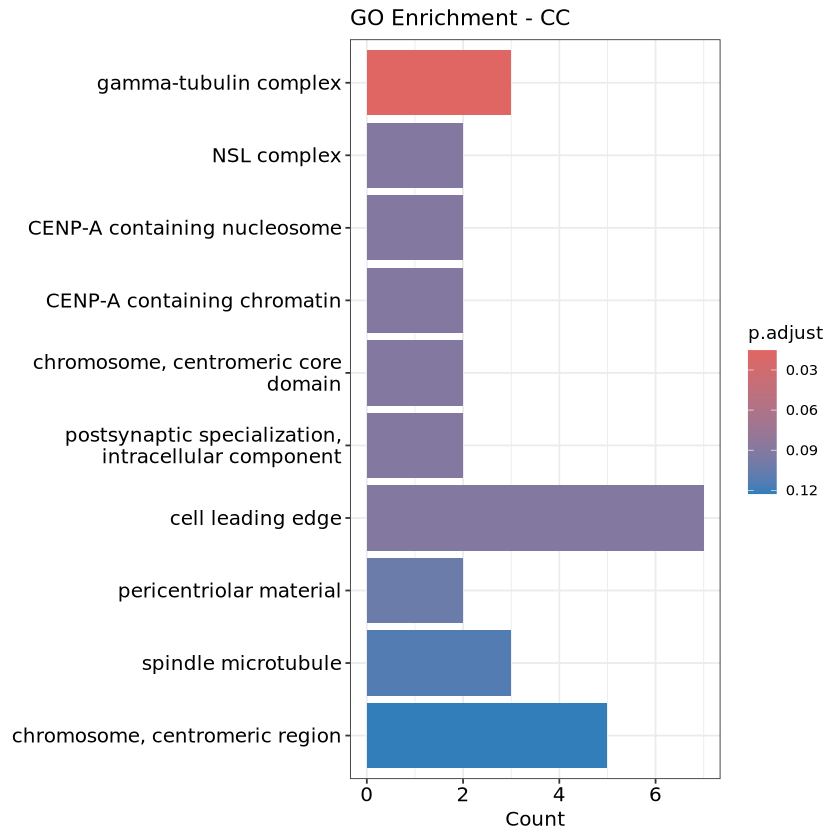

In [34]:
barplot(AD2_not_Aging2_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [35]:
AD2_not_Aging2_ego_mf <- enrichGO(
  gene          = AD2_not_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [36]:
head(AD2_not_Aging2_ego_mf, n=5)

ID         Description                                   GeneRatio
GO:0005200 GO:0005200 structural constituent of cytoskeleton        4/93     
GO:0002161 GO:0002161 aminoacyl-tRNA editing activity               2/93     
GO:0004435 GO:0004435 phosphatidylinositol phospholipase C activity 2/93     
GO:0004629 GO:0004629 phospholipase C activity                      2/93     
GO:0030527 GO:0030527 structural constituent of chromatin           3/93     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0005200 129/21059 0.002576475 0.3757765 0.3527364
GO:0002161 25/21059  0.005417779 0.3757765 0.3527364
GO:0004435 29/21059  0.007248603 0.3757765 0.3527364
GO:0004629 32/21059  0.008779818 0.3757765 0.3527364
GO:0030527 101/21059 0.010172324 0.3757765 0.3527364
           geneID                                                         
GO:0005200 ENSG00000115306/ENSG00000037042/ENSG00000131462/ENSG00000131095
GO:0002161 ENSG00000137411/ENSG00000266967                                
GO:0004435 ENSG00000115556/ENSG00000161714                                
GO:0004629 ENSG00000115556/ENSG00000161714                                
GO:0030527 ENSG00000278463/ENSG00000196787/ENSG00000275126                
           Count
GO:0005200 4    
GO:0002161 2    
GO:0004435 2    
GO:0004629 2    
GO:0030527 3

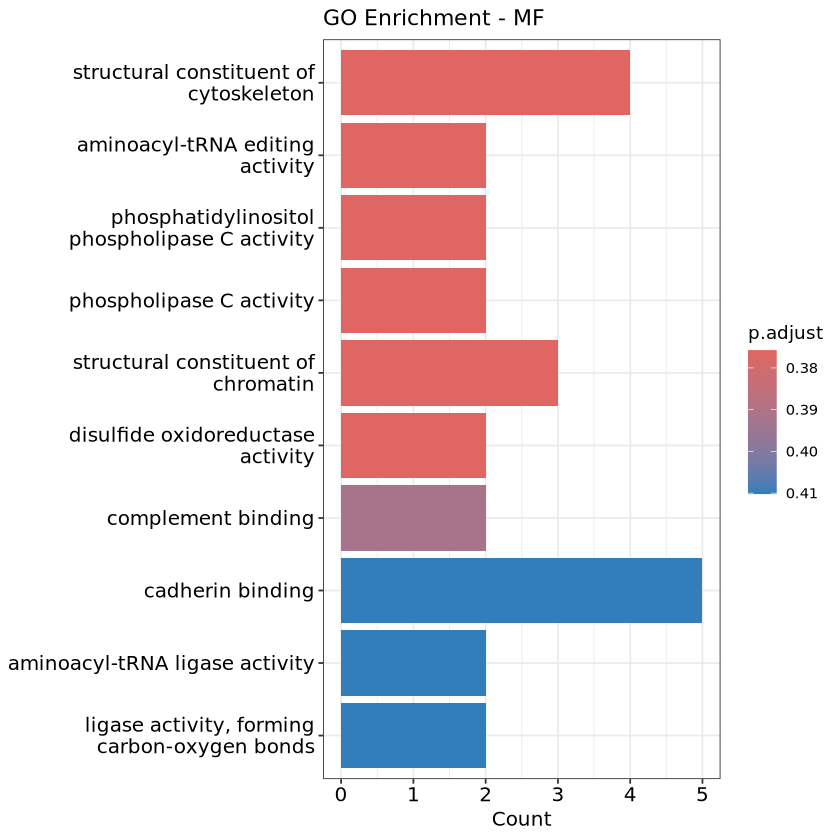

In [37]:
barplot(AD2_not_Aging2_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [38]:
entrez_ids <- bitr(AD2_not_Aging2, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_not_Aging2, fromType = "ENSEMBL", toType = "ENTREZID", :
“2% of input gene IDs are fail to map...”


In [39]:
kegg_enrich %>% head(n=20)

category                             subcategory                     
hsa05322 Human Diseases                       Immune disease                  
hsa05133 Human Diseases                       Infectious disease: bacterial   
hsa05034 Human Diseases                       Substance dependence            
hsa04613 Organismal Systems                   Immune system                   
hsa04936 Human Diseases                       Endocrine and metabolic disease 
hsa04610 Organismal Systems                   Immune system                   
hsa04211 Organismal Systems                   Aging                           
hsa04070 Environmental Information Processing Signal transduction             
hsa05150 Human Diseases                       Infectious disease: bacterial   
hsa04931 Human Diseases                       Endocrine and metabolic disease 
hsa05171 Human Diseases                       Infectious disease: viral       
hsa04910 Organismal Systems                   Endocrine system                
hsa04217 Cellular Processes                   Cell growth and death           
hsa04630 Environmental Information Processing Signal transduction             
hsa04920 Organismal Systems                   Endocrine system                
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa00562 Metabolism                           Carbohydrate metabolism         
hsa05165 Human Diseases                       Infectious disease: viral       
hsa05203 Human Diseases                       Cancer: overview                
hsa04520 Cellular Processes                   Cellular community - eukaryotes 
         ID       Description                                 GeneRatio
hsa05322 hsa05322 Systemic lupus erythematosus                6/40     
hsa05133 hsa05133 Pertussis                                   4/40     
hsa05034 hsa05034 Alcoholism                                  5/40     
hsa04613 hsa04613 Neutrophil extracellular trap formation     5/40     
hsa04936 hsa04936 Alcoholic liver disease                     4/40     
hsa04610 hsa04610 Complement and coagulation cascades         3/40     
hsa04211 hsa04211 Longevity regulating pathway                3/40     
hsa04070 hsa04070 Phosphatidylinositol signaling system       3/40     
hsa05150 hsa05150 Staphylococcus aureus infection             3/40     
hsa04931 hsa04931 Insulin resistance                          3/40     
hsa05171 hsa05171 Coronavirus disease - COVID-19              4/40     
hsa04910 hsa04910 Insulin signaling pathway                   3/40     
hsa04217 hsa04217 Necroptosis                                 3/40     
hsa04630 hsa04630 JAK-STAT signaling pathway                  3/40     
hsa04920 hsa04920 Adipocytokine signaling pathway             2/40     
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 3/40     
hsa00562 hsa00562 Inositol phosphate metabolism               2/40     
hsa05165 hsa05165 Human papillomavirus infection              4/40     
hsa05203 hsa05203 Viral carcinogenesis                        3/40     
hsa04520 hsa04520 Adherens junction                           2/40     
         BgRatio  pvalue       p.adjust    qvalue     
hsa05322 144/9446 2.831809e-05 0.003653033 0.003338553
hsa05133 78/9446  3.137751e-04 0.020238491 0.018496214
hsa05034 191/9446 1.188030e-03 0.042988117 0.039287385
hsa04613 196/9446 1.332965e-03 0.042988117 0.039287385
hsa04936 144/9446 3.091963e-03 0.079772647 0.072905234
hsa04610 88/9446  6.019306e-03 0.118065482 0.107901542
hsa04211 90/9446  6.406654e-03 0.118065482 0.107901542
hsa04070 98/9446  8.103489e-03 0.129604237 0.118446956
hsa05150 102/9446 9.042156e-03 0.129604237 0.118446956
hsa04931 109/9446 1.083301e-02 0.139745797 0.127715457
hsa05171 238/9446 1.765353e-02 0.207027753 0.189205290
hsa04910 138/9446 2.033011e-02 0.218548630 0.199734366
hsa04217 159/9446 2.934993e-02 0.288952348 0.264077217
hsa04630 168/9446 3.376912e-02 0.288952348 0.264077217
hsa04920 70/9

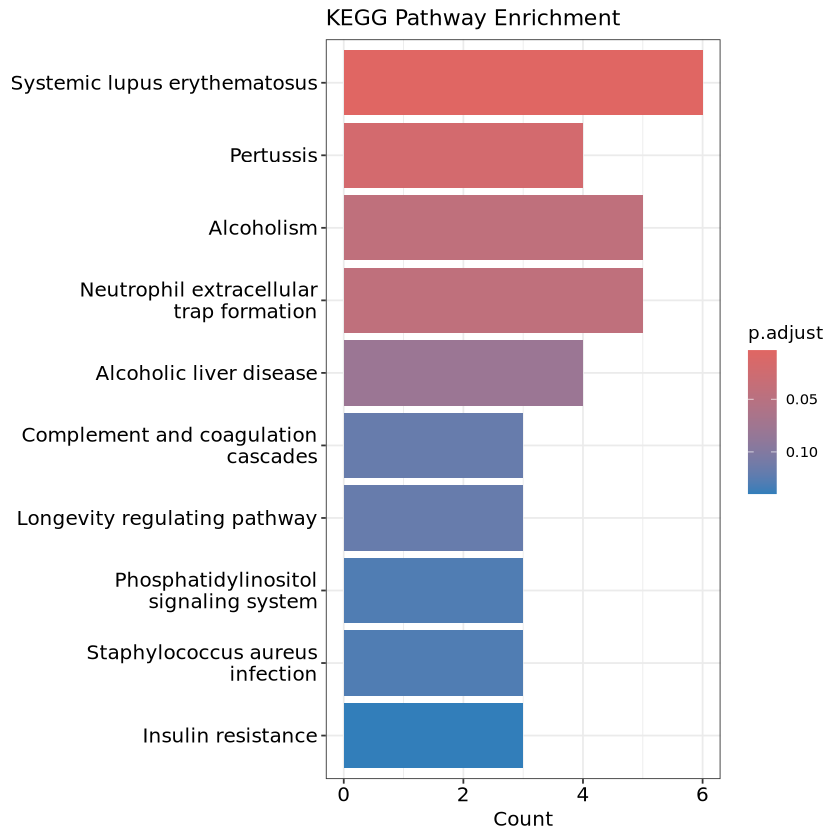

In [40]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## TL1_Aging5

In [50]:
TL1_Aging5_ego <- enrichGO(
  gene          = TL1_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [51]:
head(TL1_Aging5_ego, n=15)

ID        
GO:0002456 GO:0002456
GO:0002460 GO:0002460
GO:0002483 GO:0002483
GO:0001916 GO:0001916
GO:0050852 GO:0050852
GO:0019883 GO:0019883
GO:0048002 GO:0048002
GO:0002768 GO:0002768
GO:0001914 GO:0001914
GO:0001913 GO:0001913
GO:0002486 GO:0002486
GO:0002711 GO:0002711
GO:0001912 GO:0001912
GO:0031343 GO:0031343
GO:0050851 GO:0050851
           Description                                                                                                              
GO:0002456 T cell mediated immunity                                                                                                 
GO:0002460 adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains
GO:0002483 antigen processing and presentation of endogenous peptide antigen                                                        
GO:0001916 positive regulation of T cell mediated cytotoxicity                                                                      
GO:0050852 T cell receptor signaling pathway                                                                                        
GO:0019883 antigen processing and presentation of endogenous antigen                                                                
GO:0048002 antigen processing and presentation of peptide antigen                                                                   
GO:0002768 immune response-regulating cell surface receptor signaling pathway                                                       
GO:0001914 regulation of T cell mediated cytotoxicity                                                                               
GO:0001913 T cell mediated cytotoxicity                                                                                             
GO:0002486 antigen processing and presentation of endogenous peptide antigen via MHC class I via ER pathway, TAP-independent        
GO:0002711 positive regulation of T cell mediated immunity                                                                          
GO:0001912 positive regulation of leukocyte mediated cytotoxicity                                                                   
GO:0031343 positive regulation of cell killing                                                                                      
GO:0050851 antigen receptor-mediated signaling pathway                                                                              
           GeneRatio BgRatio   pvalue       p.adjust     qvalue      
GO:0002456 7/41      219/21261 1.866374e-07 0.0001755675 0.0001181704
GO:0002460 9/41      495/21261 3.376297e-07 0.0001755675 0.0001181704
GO:0002483 5/41      103/21261 1.578639e-06 0.0003788002 0.0002549616
GO:0001916 5/41      108/21261 1.995989e-06 0.0003788002 0.0002549616
GO:0050852 6/41      197/21261 2.012802e-06 0.0003788002 0.0002549616
GO:0019883 5/41      110/21261 2.185386e-06 0.0003788002 0.0002549616
GO:0048002 6/41      218/21261 3.614737e-06 0.0004785014 0.0003220682
GO:0002768 8/41      490/21261 3.680780e-06 0.0004785014 0.0003220682
GO:0001914 5/41      129/21261 4.784390e-06 0.0005528628 0.0003721192
GO:0001913 5/41      137/21261 6.420753e-06 0.0005972400 0.0004019885
GO:0002486 4/41      63/21261  6.528255e-06 0.0005972400 0.0004019885
GO:0002711 5/41      139/21261 6.891231e-06 0.0005972400 0.0004019885
GO:0001912 5/41      143/21261 7.913032e-06 0.0006330425 0.0004260863
GO:0031343 5/41      150/21261 9.983276e-06 0.0006442393 0.0004336226
GO:0050851 6/41      262/21261 1.035588e-05 0.0006442393 0.0004336226
           geneID                                                                                                                                         
GO:0002456 ENSG00000111801/ENSG00000186470/ENSG00000010704/ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                                
GO:0002460 ENSG00000111801/ENSG00000186470/ENSG00000244731/ENSG00000010704/ENSG00000204632/ENSG000002

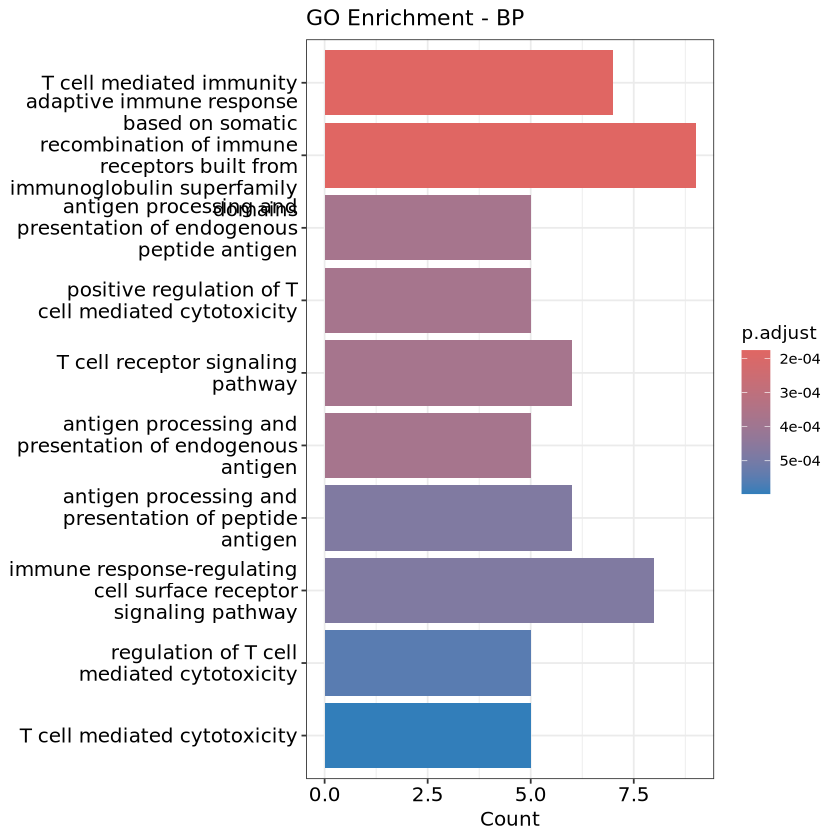

In [52]:
barplot(TL1_Aging5_ego, showCategory = 10, title = "GO Enrichment - BP")

In [53]:
TL1_Aging5_ego_cc <- enrichGO(
  gene          = TL1_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [54]:
head(TL1_Aging5_ego_cc, n=10)

ID         Description                                    GeneRatio
GO:0042611 GO:0042611 MHC protein complex                            5/42     
GO:0042612 GO:0042612 MHC class I protein complex                    3/42     
GO:0098553 GO:0098553 lumenal side of endoplasmic reticulum membrane 4/42     
GO:0098576 GO:0098576 lumenal side of membrane                       4/42     
GO:0012507 GO:0012507 ER to Golgi transport vesicle membrane         4/42     
GO:0072562 GO:0072562 blood microparticle                            4/42     
GO:0030134 GO:0030134 COPII-coated ER to Golgi transport vesicle     4/42     
GO:0055037 GO:0055037 recycling endosome                             4/42     
GO:0030670 GO:0030670 phagocytic vesicle membrane                    3/42     
GO:0030662 GO:0030662 coated vesicle membrane                        4/42     
           BgRatio   pvalue       p.adjust     qvalue      
GO:0042611 142/22568 6.481328e-06 0.0006222074 0.0004434593
GO:0042612 46/22568  8.604920e-05 0.0029027992 0.0020688810
GO:0098553 127/22568 9.071247e-05 0.0029027992 0.0020688810
GO:0098576 138/22568 1.250864e-04 0.0030020727 0.0021396352
GO:0012507 156/22568 2.004004e-04 0.0038476870 0.0027423208
GO:0072562 180/22568 3.457368e-04 0.0054784951 0.0039046292
GO:0030134 187/22568 3.994736e-04 0.0054784951 0.0039046292
GO:0055037 260/22568 1.365947e-03 0.0163913690 0.0116824450
GO:0030670 138/22568 2.157146e-03 0.0230095610 0.0163993582
GO:0030662 308/22568 2.531588e-03 0.0242985664 0.0173180572
           geneID                                                                         
GO:0042611 ENSG00000204632/ENSG00000204257/ENSG00000206503/ENSG00000196126/ENSG00000204525
GO:0042612 ENSG00000204632/ENSG00000206503/ENSG00000204525                                
GO:0098553 ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                
GO:0098576 ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                
GO:0012507 ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                
GO:0072562 ENSG00000213719/ENSG00000244731/ENSG00000204389/ENSG00000224389                
GO:0030134 ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                
GO:0055037 ENSG00000010704/ENSG00000204632/ENSG00000206503/ENSG00000204525                
GO:0030670 ENSG00000204632/ENSG00000206503/ENSG00000204525                                
GO:0030662 ENSG00000204632/ENSG00000206503/ENSG00000196126/ENSG00000204525                
           Count
GO:0042611 5    
GO:0042612 3    
GO:0098553 4    
GO:0098576 4    
GO:0012507 4    
GO:0072562 4    
GO:0030134 4    
GO:0055037 4    
GO:0030670 3    
GO:0030662 4

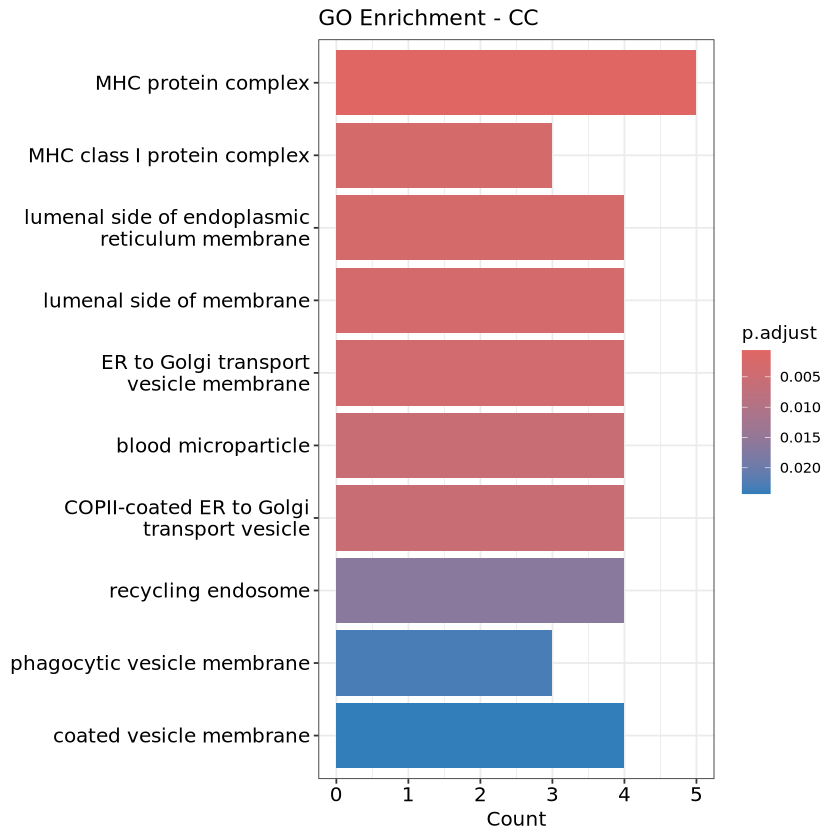

In [55]:
barplot(TL1_Aging5_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [56]:
TL1_Aging5_ego_mf <- enrichGO(
  gene          = TL1_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [57]:
head(TL1_Aging5_ego_mf, n=5)

ID         Description                  GeneRatio BgRatio  
GO:0042605 GO:0042605 peptide antigen binding      5/43      194/21059
GO:0042610 GO:0042610 CD8 receptor binding         2/43      17/21059 
GO:0003823 GO:0003823 antigen binding              5/43      350/21059
GO:0030881 GO:0030881 beta-2-microglobulin binding 2/43      26/21059 
GO:0051787 GO:0051787 misfolded protein binding    2/43      31/21059 
           pvalue       p.adjust    qvalue     
GO:0042605 4.564586e-05 0.006801233 0.005093117
GO:0042610 5.431849e-04 0.035079786 0.026269568
GO:0003823 7.063044e-04 0.035079786 0.026269568
GO:0030881 1.283002e-03 0.047791841 0.035789016
GO:0051787 1.823837e-03 0.054350328 0.040700352
           geneID                                                                         
GO:0042605 ENSG00000204632/ENSG00000204257/ENSG00000206503/ENSG00000196126/ENSG00000204525
GO:0042610 ENSG00000204632/ENSG00000206503                                                
GO:0003823 ENSG00000204632/ENSG00000204257/ENSG00000206503/ENSG00000196126/ENSG00000204525
GO:0030881 ENSG00000010704/ENSG00000206503                                                
GO:0051787 ENSG00000204463/ENSG00000204389                                                
           Count
GO:0042605 5    
GO:0042610 2    
GO:0003823 5    
GO:0030881 2    
GO:0051787 2

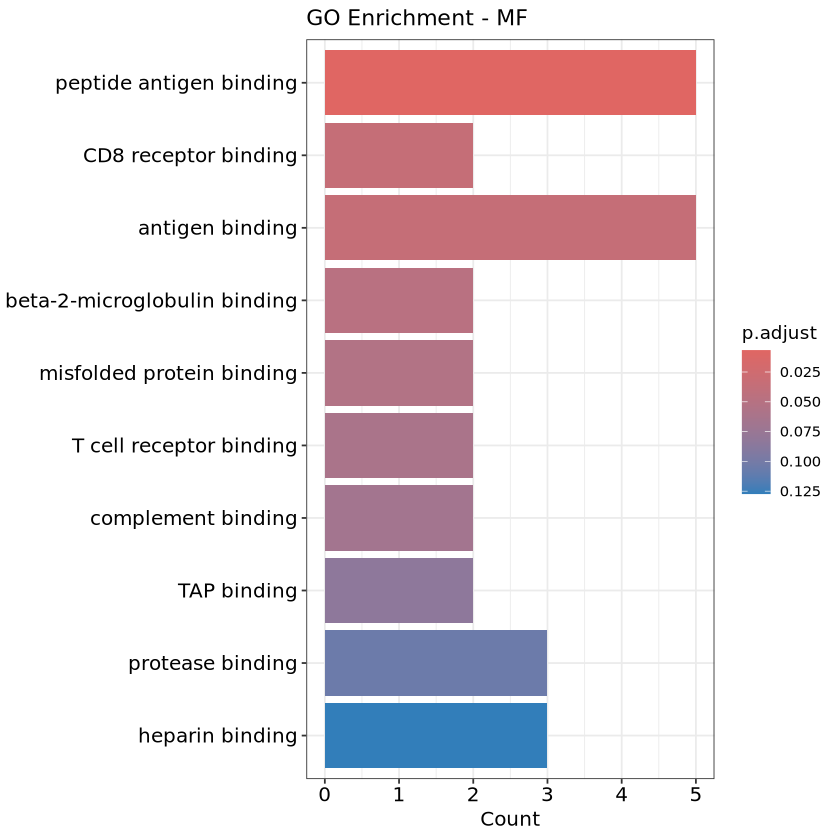

In [58]:
barplot(TL1_Aging5_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [59]:
entrez_ids <- bitr(TL1_Aging5, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(TL1_Aging5, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“2.17% of input gene IDs are fail to map...”


In [60]:
kegg_enrich %>% head(n=20)

category                            
hsa05330 Human Diseases                      
hsa04612 Organismal Systems                  
hsa04940 Human Diseases                      
hsa05332 Human Diseases                      
hsa05320 Human Diseases                      
hsa05416 Human Diseases                      
hsa05150 Human Diseases                      
hsa05166 Human Diseases                      
hsa05322 Human Diseases                      
hsa04145 Cellular Processes                  
hsa04514 Environmental Information Processing
hsa05168 Human Diseases                      
hsa05169 Human Diseases                      
hsa04218 Cellular Processes                  
hsa05133 Human Diseases                      
hsa05165 Human Diseases                      
hsa04610 Organismal Systems                  
hsa05203 Human Diseases                      
hsa05170 Human Diseases                      
hsa05163 Human Diseases                      
         subcategory                         ID      
hsa05330 Immune disease                      hsa05330
hsa04612 Immune system                       hsa04612
hsa04940 Endocrine and metabolic disease     hsa04940
hsa05332 Immune disease                      hsa05332
hsa05320 Immune disease                      hsa05320
hsa05416 Cardiovascular disease              hsa05416
hsa05150 Infectious disease: bacterial       hsa05150
hsa05166 Infectious disease: viral           hsa05166
hsa05322 Immune disease                      hsa05322
hsa04145 Transport and catabolism            hsa04145
hsa04514 Signaling molecules and interaction hsa04514
hsa05168 Infectious disease: viral           hsa05168
hsa05169 Infectious disease: viral           hsa05169
hsa04218 Cell growth and death               hsa04218
hsa05133 Infectious disease: bacterial       hsa05133
hsa05165 Infectious disease: viral           hsa05165
hsa04610 Immune system                       hsa04610
hsa05203 Cancer: overview                    hsa05203
hsa05170 Infectious disease: viral           hsa05170
hsa05163 Infectious disease: viral           hsa05163
         Description                              GeneRatio BgRatio 
hsa05330 Allograft rejection                      5/22      39/9446 
hsa04612 Antigen processing and presentation      6/22      82/9446 
hsa04940 Type I diabetes mellitus                 5/22      44/9446 
hsa05332 Graft-versus-host disease                5/22      45/9446 
hsa05320 Autoimmune thyroid disease               5/22      54/9446 
hsa05416 Viral myocarditis                        5/22      70/9446 
hsa05150 Staphylococcus aureus infection          5/22      102/9446
hsa05166 Human T-cell leukemia virus 1 infection  6/22      224/9446
hsa05322 Systemic lupus erythematosus             5/22      144/9446
hsa04145 Phagosome                                5/22      159/9446
hsa04514 Cell adhesion molecules                  5/22      160/9446
hsa05168 Herpes simplex virus 1 infection         5/22      183/9446
hsa05169 Epstein-Barr virus infection             5/22      205/9446
hsa04218 Cellular senescence                      4/22      157/9446
hsa05133 Pertussis                                3/22      78/9446 
hsa05165 Human papillomavirus infection           5/22      333/9446
hsa04610 Complement and coagulation cascades      3/22      88/9446 
hsa05203 Viral carcinogenesis                     4/22      205/9446
hsa05170 Human immunodeficiency virus 1 infection 4/22      214/9446
hsa05163 Human cytomegalovirus infection          4/22      227/9446
         pvalue       p.adjust     qvalue       geneID                       
hsa05330 2.301263e-08 1.080267e-06 6.497849e-07 3135/3108/3105/3123/3107     
hsa04612 2.374214e-08 1.080267e-06 6.497849e-07 3135/3303/3108/3105/3123/3107
hsa04940 4.308178e-08 1.100967e-06 6.622356e-07 3135/3108/3105/3123/3107     
hsa05332 4.839414e-08 1.100967e-06 6.622356e-07 3135/3108/3105/3123/3107     
hsa05320 1.235826e-07 2.249203e-06 1.352904e-06 3135/3108/3105/3123/31

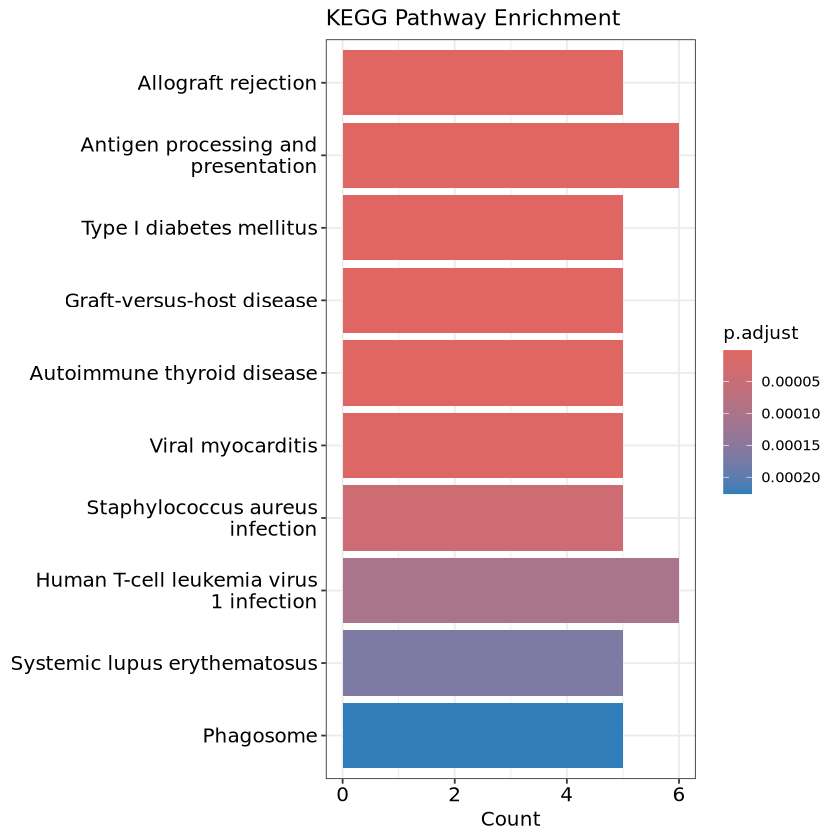

In [61]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## AD2_Aging5

In [63]:
AD2_Aging5_ego <- enrichGO(
  gene          = AD2_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [64]:
head(AD2_Aging5_ego, n=15)

ID        
GO:2000427 GO:2000427
GO:2000425 GO:2000425
GO:0045807 GO:0045807
GO:0006958 GO:0006958
GO:0043277 GO:0043277
GO:0002455 GO:0002455
GO:0030100 GO:0030100
GO:0006956 GO:0006956
GO:0050766 GO:0050766
GO:0050764 GO:0050764
GO:0002460 GO:0002460
GO:0032226 GO:0032226
GO:0033227 GO:0033227
GO:0036500 GO:0036500
GO:0006438 GO:0006438
           Description                                                                                                              
GO:2000427 positive regulation of apoptotic cell clearance                                                                          
GO:2000425 regulation of apoptotic cell clearance                                                                                   
GO:0045807 positive regulation of endocytosis                                                                                       
GO:0006958 complement activation, classical pathway                                                                                 
GO:0043277 apoptotic cell clearance                                                                                                 
GO:0002455 humoral immune response mediated by circulating immunoglobulin                                                           
GO:0030100 regulation of endocytosis                                                                                                
GO:0006956 complement activation                                                                                                    
GO:0050766 positive regulation of phagocytosis                                                                                      
GO:0050764 regulation of phagocytosis                                                                                               
GO:0002460 adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains
GO:0032226 positive regulation of synaptic transmission, dopaminergic                                                               
GO:0033227 dsRNA transport                                                                                                          
GO:0036500 ATF6-mediated unfolded protein response                                                                                  
GO:0006438 valyl-tRNA aminoacylation                                                                                                
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:2000427 2/17      21/21261  0.0001252448 0.01922041 0.01285328
GO:2000425 2/17      23/21261  0.0001507483 0.01922041 0.01285328
GO:0045807 3/17      190/21261 0.0004355649 0.03702302 0.02475843
GO:0006958 2/17      57/21261  0.0009358874 0.05824234 0.03894844
GO:0043277 2/17      63/21261  0.0011420067 0.05824234 0.03894844
GO:0002455 2/17      84/21261  0.0020184131 0.07137105 0.04772801
GO:0030100 3/17      340/21261 0.0023337737 0.07137105 0.04772801
GO:0006956 2/17      92/21261  0.0024146299 0.07137105 0.04772801
GO:0050766 2/17      94/21261  0.0025189781 0.07137105 0.04772801
GO:0050764 2/17      124/21261 0.0043333737 0.11050103 0.07389543
GO:0002460 3/17      495/21261 0.0066886893 0.12443115 0.08321092
GO:0032226 1/17      10/21261  0.0079688327 0.12443115 0.08321092
GO:0033227 1/17      10/21261  0.0079688327 0.12443115 0.08321092
GO:0036500 1/17      12/21261  0.0095554104 0.12443115 0.08321092
GO:0006438 1/17      13/21261  0.0103478034 0.12443115 0.08321092
           geneID                                          Count
GO:2000427 ENSG00000224389/ENSG00000244731                 2    
GO:2000425 ENSG00000224389/ENSG00000244731                 2    
GO:0045807 ENSG00000137312/ENSG00000224389/ENSG00000244731 3    
GO:0006958 ENSG00000224389/ENSG00000244731                 2    
GO:0043277 ENSG00000224389/ENSG00000244731                 2    
GO:0002455 ENSG00000224389/ENSG00000244731                 2    
GO:0030100 ENSG00000

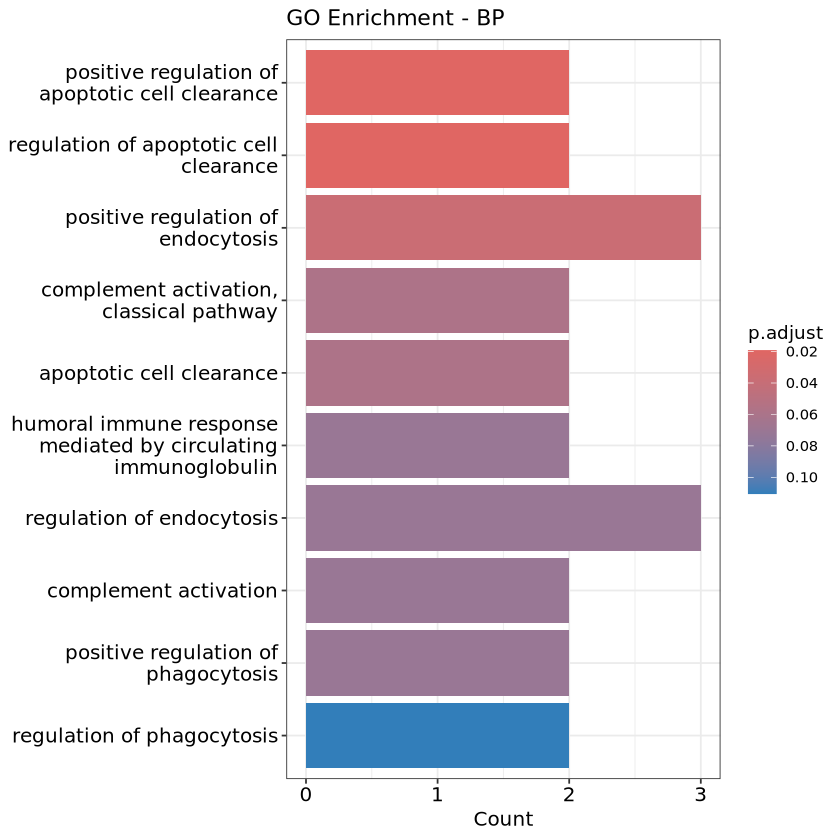

In [65]:
barplot(AD2_Aging5_ego, showCategory = 10, title = "GO Enrichment - BP")

In [66]:
AD2_Aging5_ego_cc <- enrichGO(
  gene          = AD2_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [67]:
head(AD2_Aging5_ego_cc, n=10)

ID         Description                 GeneRatio BgRatio  
GO:0072562 GO:0072562 blood microparticle         2/17      180/22568
GO:0016600 GO:0016600 flotillin complex           1/17      17/22568 
GO:0001931 GO:0001931 uropod                      1/17      20/22568 
GO:0031254 GO:0031254 cell trailing edge          1/17      21/22568 
GO:0098691 GO:0098691 dopaminergic synapse        1/17      23/22568 
GO:0044291 GO:0044291 cell-cell contact zone      1/17      80/22568 
GO:0030864 GO:0030864 cortical actin cytoskeleton 1/17      82/22568 
GO:0048786 GO:0048786 presynaptic active zone     1/17      86/22568 
GO:0005901 GO:0005901 caveola                     1/17      92/22568 
GO:0098982 GO:0098982 GABA-ergic synapse          1/17      95/22568 
           pvalue      p.adjust   qvalue    geneID                         
GO:0072562 0.007952474 0.09970735 0.0868594 ENSG00000224389/ENSG00000244731
GO:0016600 0.012733349 0.09970735 0.0868594 ENSG00000137312                
GO:0001931 0.014964509 0.09970735 0.0868594 ENSG00000137312                
GO:0031254 0.015707174 0.09970735 0.0868594 ENSG00000137312                
GO:0098691 0.017190922 0.09970735 0.0868594 ENSG00000137312                
GO:0044291 0.058603464 0.19282241 0.1679760 ENSG00000137312                
GO:0030864 0.060026272 0.19282241 0.1679760 ENSG00000137312                
GO:0048786 0.062865817 0.19282241 0.1679760 ENSG00000137312                
GO:0005901 0.067110002 0.19282241 0.1679760 ENSG00000137312                
GO:0098982 0.069225304 0.19282241 0.1679760 ENSG00000137312                
           Count
GO:0072562 2    
GO:0016600 1    
GO:0001931 1    
GO:0031254 1    
GO:0098691 1    
GO:0044291 1    
GO:0030864 1    
GO:0048786 1    
GO:0005901 1    
GO:0098982 1

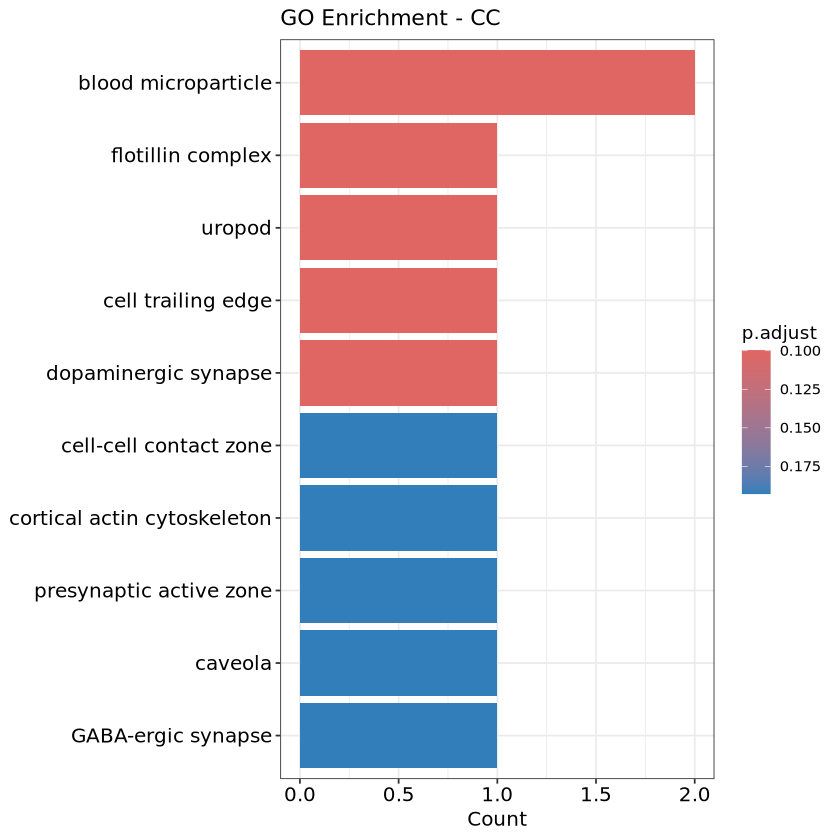

In [68]:
barplot(AD2_Aging5_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [69]:
AD2_Aging5_ego_mf <- enrichGO(
  gene          = AD2_Aging5,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [70]:
head(AD2_Aging5_ego_mf, n=5)

ID         Description                              GeneRatio
GO:0001848 GO:0001848 complement binding                       2/17     
GO:0001849 GO:0001849 complement component C1q complex binding 1/17     
GO:0004866 GO:0004866 endopeptidase inhibitor activity         2/17     
GO:0004832 GO:0004832 valine-tRNA ligase activity              1/17     
GO:0030414 GO:0030414 peptidase inhibitor activity             2/17     
           BgRatio   pvalue      p.adjust   qvalue     
GO:0001848 41/21059  0.000493726 0.01382433 0.005197116
GO:0001849 11/21059  0.008846151 0.05537888 0.020819127
GO:0004866 189/21059 0.009972742 0.05537888 0.020819127
GO:0004832 13/21059  0.010446608 0.05537888 0.020819127
GO:0030414 196/21059 0.010691740 0.05537888 0.020819127
           geneID                          Count
GO:0001848 ENSG00000224389/ENSG00000244731 2    
GO:0001849 ENSG00000244731                 1    
GO:0004866 ENSG00000224389/ENSG00000244731 2    
GO:0004832 ENSG00000137411                 1    
GO:0030414 ENSG00000224389/ENSG00000244731 2

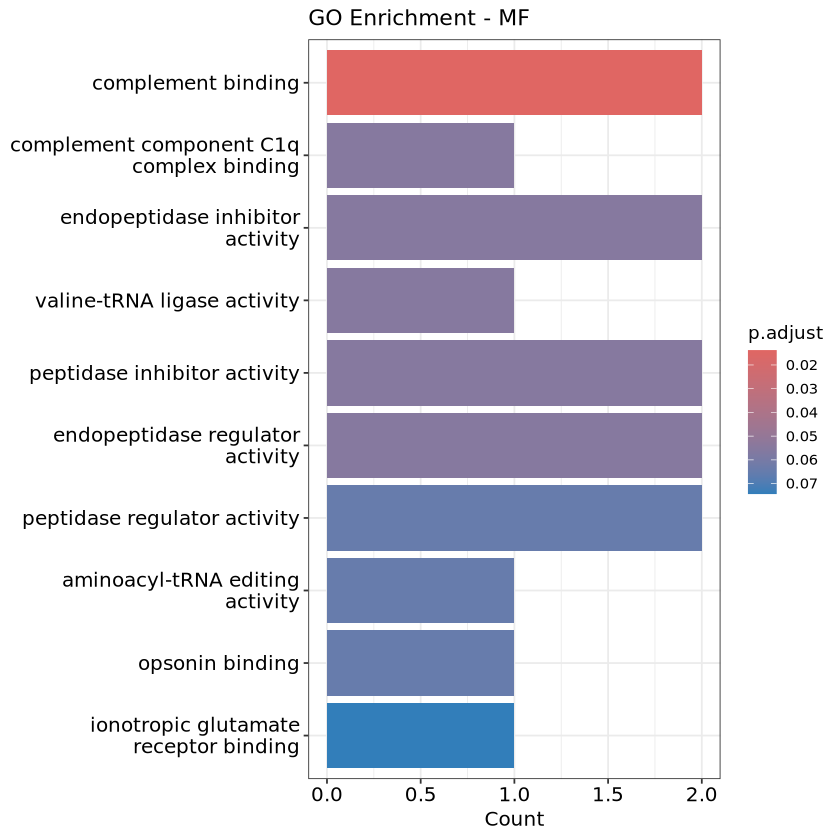

In [71]:
barplot(AD2_Aging5_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [72]:
entrez_ids <- bitr(AD2_Aging5, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_Aging5, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“5.56% of input gene IDs are fail to map...”


In [73]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa05133 Human Diseases                       Infectious disease: bacterial  
hsa04610 Organismal Systems                   Immune system                  
hsa05150 Human Diseases                       Infectious disease: bacterial  
hsa04936 Human Diseases                       Endocrine and metabolic disease
hsa05322 Human Diseases                       Immune disease                 
hsa05171 Human Diseases                       Infectious disease: viral      
hsa05030 Human Diseases                       Substance dependence           
hsa04927 Organismal Systems                   Endocrine system               
hsa00970 Genetic Information Processing       Translation                    
hsa05031 Human Diseases                       Substance dependence           
hsa04918 Organismal Systems                   Endocrine system               
hsa04911 Organismal Systems                   Endocrine system               
hsa04211 Organismal Systems                   Aging                          
hsa04925 Organismal Systems                   Endocrine system               
hsa04928 Organismal Systems                   Endocrine system               
hsa04668 Environmental Information Processing Signal transduction            
hsa04935 Organismal Systems                   Endocrine system               
hsa04926 Organismal Systems                   Endocrine system               
hsa04728 Organismal Systems                   Nervous system                 
hsa04910 Organismal Systems                   Endocrine system               
         ID       Description                                         GeneRatio
hsa05133 hsa05133 Pertussis                                           3/6      
hsa04610 hsa04610 Complement and coagulation cascades                 3/6      
hsa05150 hsa05150 Staphylococcus aureus infection                     3/6      
hsa04936 hsa04936 Alcoholic liver disease                             3/6      
hsa05322 hsa05322 Systemic lupus erythematosus                        3/6      
hsa05171 hsa05171 Coronavirus disease - COVID-19                      3/6      
hsa05030 hsa05030 Cocaine addiction                                   1/6      
hsa04927 hsa04927 Cortisol synthesis and secretion                    1/6      
hsa00970 hsa00970 Aminoacyl-tRNA biosynthesis                         1/6      
hsa05031 hsa05031 Amphetamine addiction                               1/6      
hsa04918 hsa04918 Thyroid hormone synthesis                           1/6      
hsa04911 hsa04911 Insulin secretion                                   1/6      
hsa04211 hsa04211 Longevity regulating pathway                        1/6      
hsa04925 hsa04925 Aldosterone synthesis and secretion                 1/6      
hsa04928 hsa04928 Parathyroid hormone synthesis, secretion and action 1/6      
hsa04668 hsa04668 TNF signaling pathway                               1/6      
hsa04935 hsa04935 Growth hormone synthesis, secretion and action      1/6      
hsa04926 hsa04926 Relaxin signaling pathway                           1/6      
hsa04728 hsa04728 Dopaminergic synapse                                1/6      
hsa04910 hsa04910 Insulin signaling pathway                           1/6      
         BgRatio  pvalue       p.adjust     qvalue       geneID           
hsa05133 78/9446  1.064244e-05 0.0002526888 0.0001773255 721/720/110384692
hsa04610 88/9446  1.531448e-05 0.0002526888 0.0001773255 721/720/110384692
hsa05150 102/9446 2.388170e-05 0.0002626987 0.0001843500 721/720/110384692
hsa04936 144/9446 6.710392e-05 0.0004428859 0.0003107971 721/720/110384692
hsa05322 144/9446 6.710392e-05 0.0004428859 0.0003107971 721/720/110384692
hsa05171 238/9446 2.986367e-04 0.0016425018 0.0011526329 721/720/110384692
hsa05030 49/9446  3.073146e-02 0.1325390445 0.0930098558 1388             
hsa04927 65/9446  4.059409e-02 0.1325390445 0.0930098558 1388             
hsa00970 66/9446

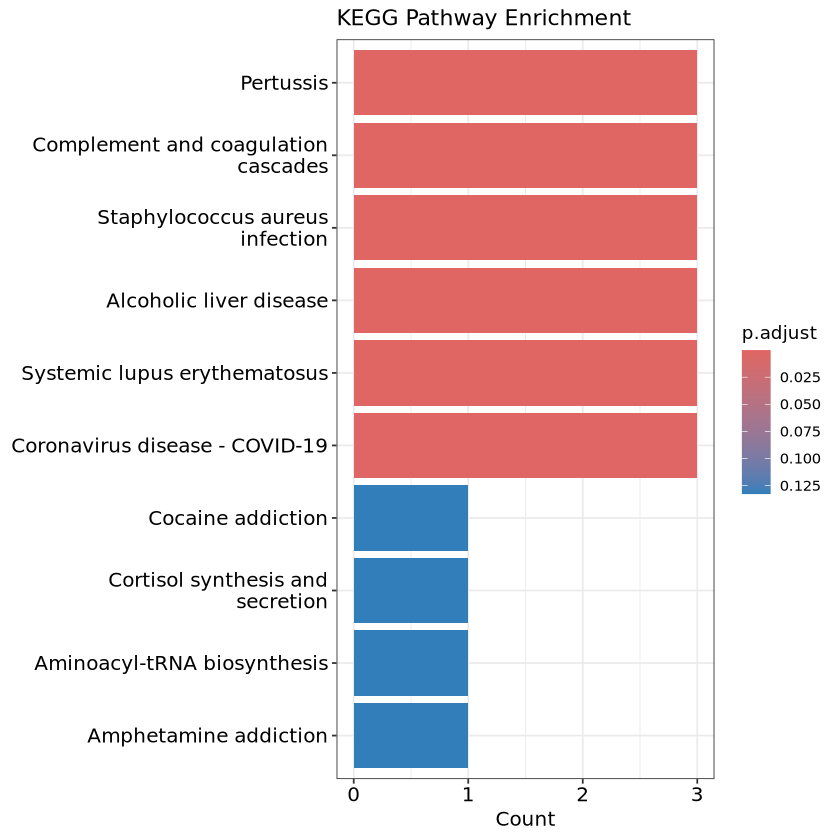

In [74]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## AD2_Aging2_overlap

In [21]:
AD2_Aging2_overlap_ego <- enrichGO(
  gene          = AD2_Aging2_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [39]:
head(AD2_Aging2_overlap_ego, n=15)

ID         Description                                              
GO:0090085 GO:0090085 regulation of protein deubiquitination                   
GO:0010759 GO:0010759 positive regulation of macrophage chemotaxis             
GO:1902307 GO:1902307 positive regulation of sodium ion transmembrane transport
GO:1905523 GO:1905523 positive regulation of macrophage migration              
GO:0010758 GO:0010758 regulation of macrophage chemotaxis                      
GO:0010765 GO:0010765 positive regulation of sodium ion transport              
GO:0030509 GO:0030509 BMP signaling pathway                                    
GO:0050767 GO:0050767 regulation of neurogenesis                               
GO:0071772 GO:0071772 response to BMP                                          
GO:0071773 GO:0071773 cellular response to BMP stimulus                        
GO:0031281 GO:0031281 positive regulation of cyclase activity                  
GO:0048246 GO:0048246 macrophage chemotaxis                                    
GO:1905521 GO:1905521 regulation of macrophage migration                       
GO:0071622 GO:0071622 regulation of granulocyte chemotaxis                     
GO:0031279 GO:0031279 regulation of cyclase activity                           
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0090085 2/21      11/21261  5.083184e-05 0.03924218 0.02755621
GO:0010759 2/21      20/21261  1.746620e-04 0.04964796 0.03486324
GO:1902307 2/21      21/21261  1.929325e-04 0.04964796 0.03486324
GO:1905523 2/21      29/21261  3.712302e-04 0.05929699 0.04163888
GO:0010758 2/21      32/21261  4.527133e-04 0.05929699 0.04163888
GO:0010765 2/21      35/21261  5.421044e-04 0.05929699 0.04163888
GO:0030509 3/21      172/21261 6.216289e-04 0.05929699 0.04163888
GO:0050767 4/21      427/21261 7.321224e-04 0.05929699 0.04163888
GO:0071772 3/21      185/21261 7.680958e-04 0.05929699 0.04163888
GO:0071773 3/21      185/21261 7.680958e-04 0.05929699 0.04163888
GO:0031281 2/21      45/21261  8.966369e-04 0.06292761 0.04418833
GO:0048246 2/21      49/21261  1.062564e-03 0.06833061 0.04798236
GO:1905521 2/21      51/21261  1.150645e-03 0.06833061 0.04798236
GO:0071622 2/21      54/21261  1.289127e-03 0.07108617 0.04991734
GO:0031279 2/21      61/21261  1.641721e-03 0.07946986 0.05580444
           geneID                                                         
GO:0090085 ENSG00000136560/ENSG00000145901                                
GO:0010759 ENSG00000110492/ENSG00000102882                                
GO:1902307 ENSG00000088992/ENSG00000089250                                
GO:1905523 ENSG00000110492/ENSG00000102882                                
GO:0010758 ENSG00000110492/ENSG00000102882                                
GO:0010765 ENSG00000088992/ENSG00000089250                                
GO:0030509 ENSG00000174106/ENSG00000102882/ENSG00000133104                
GO:0050767 ENSG00000110492/ENSG00000174989/ENSG00000038427/ENSG00000133104
GO:0071772 ENSG00000174106/ENSG00000102882/ENSG00000133104                
GO:0071773 ENSG00000174106/ENSG00000102882/ENSG00000133104                
GO:0031281 ENSG00000089250/ENSG00000102882                                
GO:0048246 ENSG00000110492/ENSG00000102882                                
GO:1905521 ENSG00000110492/ENSG00000102882                                
GO:0071622 ENSG00000110492/ENSG00000102882                                
GO:0031279 ENSG00000089250/ENSG00000102882                                
           Count
GO:0090085 2    
GO:0010759 2    
GO:1902307 2    
GO:1905523 2    
GO:0010758 2    
GO:0010765 2    
GO:0030509 3    
GO:0050767 4    
GO:0071772 3    
GO:0071773 3    
GO:0031281 2    
GO:0048246 2    
GO:1905521 2    
GO:0071622 2    
GO:0031279 2

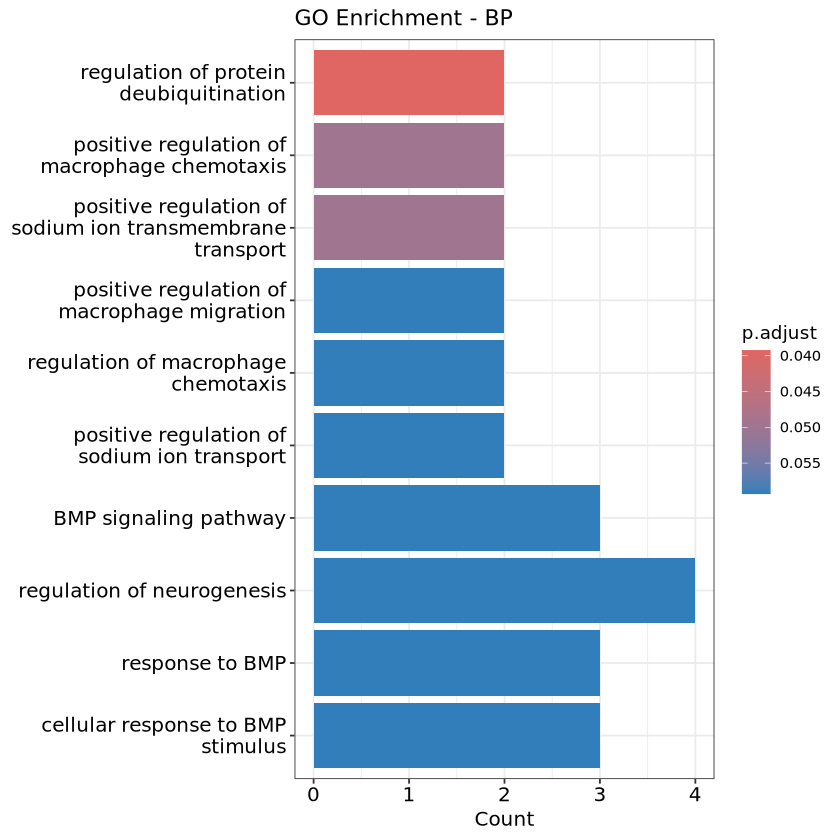

In [23]:
barplot(AD2_Aging2_overlap_ego, showCategory = 10, title = "GO Enrichment - BP")

In [24]:
AD2_Aging2_overlap_ego_cc <- enrichGO(
  gene          = AD2_Aging2_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [25]:
head(AD2_Aging2_overlap_ego_cc, n=10)

ID         Description                             GeneRatio
GO:0072534 GO:0072534 perineuronal net                        1/21     
GO:0098966 GO:0098966 perisynaptic extracellular matrix       1/21     
GO:0099535 GO:0099535 synapse-associated extracellular matrix 1/21     
GO:0036064 GO:0036064 ciliary basal body                      2/21     
GO:0033391 GO:0033391 chromatoid body                         1/21     
GO:0001741 GO:0001741 XY body                                 1/21     
GO:0031143 GO:0031143 pseudopodium                            1/21     
GO:0043186 GO:0043186 P granule                               1/21     
GO:0045495 GO:0045495 pole plasm                              1/21     
GO:0060293 GO:0060293 germ plasm                              1/21     
           BgRatio   pvalue     p.adjust  qvalue   
GO:0072534 11/22568  0.01019049 0.1597672 0.1248579
GO:0098966 12/22568  0.01111198 0.1597672 0.1248579
GO:0099535 13/22568  0.01203265 0.1597672 0.1248579
GO:0036064 181/22568 0.01215354 0.1597672 0.1248579
GO:0033391 14/22568  0.01295250 0.1597672 0.1248579
GO:0001741 16/22568  0.01478976 0.1597672 0.1248579
GO:0031143 20/22568  0.01845452 0.1597672 0.1248579
GO:0043186 27/22568  0.02483663 0.1597672 0.1248579
GO:0045495 27/22568  0.02483663 0.1597672 0.1248579
GO:0060293 27/22568  0.02483663 0.1597672 0.1248579
           geneID                          Count
GO:0072534 ENSG00000038427                 1    
GO:0098966 ENSG00000038427                 1    
GO:0099535 ENSG00000038427                 1    
GO:0036064 ENSG00000111490/ENSG00000174989 2    
GO:0033391 ENSG00000143194                 1    
GO:0001741 ENSG00000143194                 1    
GO:0031143 ENSG00000102882                 1    
GO:0043186 ENSG00000143194                 1    
GO:0045495 ENSG00000143194                 1    
GO:0060293 ENSG00000143194                 1

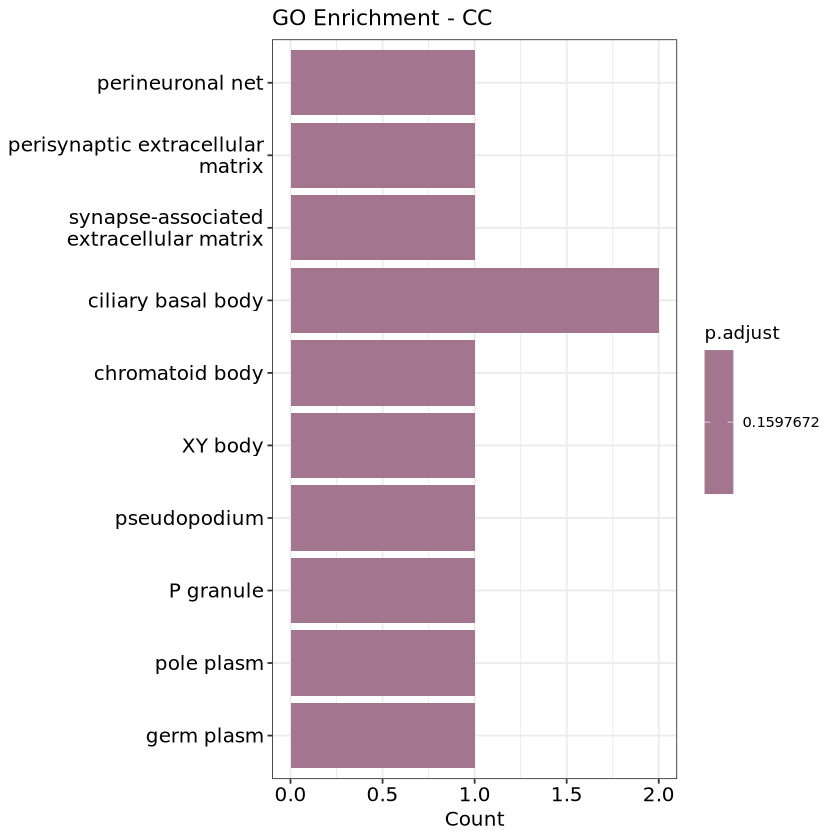

In [26]:
barplot(AD2_Aging2_overlap_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [27]:
AD2_Aging2_overlap_ego_mf <- enrichGO(
  gene          = AD2_Aging2_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [28]:
head(AD2_Aging2_overlap_ego_mf, n=5)

ID        
GO:0000049 GO:0000049
GO:0031625 GO:0031625
GO:0044389 GO:0044389
GO:0016671 GO:0016671
GO:0035374 GO:0035374
           Description                                                                       
GO:0000049 tRNA binding                                                                      
GO:0031625 ubiquitin protein ligase binding                                                  
GO:0044389 ubiquitin-like protein ligase binding                                             
GO:0016671 oxidoreductase activity, acting on a sulfur group of donors, disulfide as acceptor
GO:0035374 chondroitin sulfate binding                                                       
           GeneRatio BgRatio   pvalue      p.adjust  qvalue    
GO:0000049 2/21      86/21059  0.003291297 0.1275159 0.08702647
GO:0031625 3/21      363/21059 0.005364886 0.1275159 0.08702647
GO:0044389 3/21      382/21059 0.006179188 0.1275159 0.08702647
GO:0016671 1/21      10/21059  0.009929467 0.1275159 0.08702647
GO:0035374 1/21      10/21059  0.009929467 0.1275159 0.08702647
           geneID                                          Count
GO:0000049 ENSG00000184575/ENSG00000066651                 2    
GO:0031625 ENSG00000185104/ENSG00000136560/ENSG00000133104 3    
GO:0044389 ENSG00000185104/ENSG00000136560/ENSG00000133104 3    
GO:0016671 ENSG00000174099                                 1    
GO:0035374 ENSG00000110492                                 1

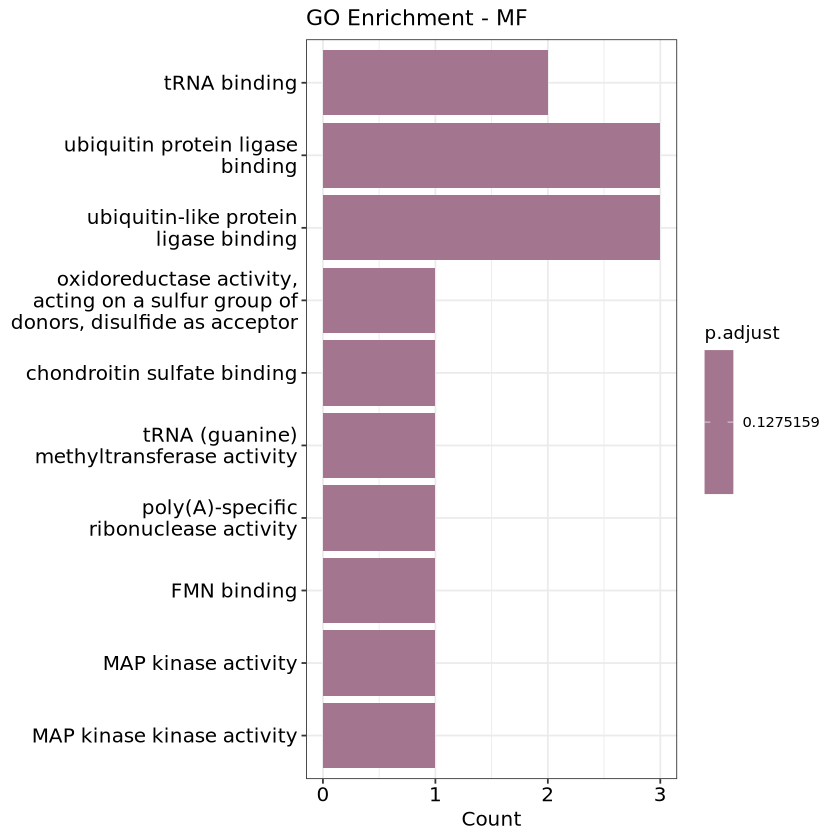

In [29]:
barplot(AD2_Aging2_overlap_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [14]:
entrez_ids <- bitr(AD2_Aging2_overlap, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(AD2_Aging2_overlap, fromType = "ENSEMBL", toType = "ENTREZID", :
“4.17% of input gene IDs are fail to map...”


In [15]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa04730 Organismal Systems                   Nervous system                 
hsa04713 Organismal Systems                   Environmental adaptation       
hsa04350 Environmental Information Processing Signal transduction            
hsa04926 Organismal Systems                   Endocrine system               
hsa04371 Environmental Information Processing Signal transduction            
hsa04140 Cellular Processes                   Transport and catabolism       
hsa05022 Human Diseases                       Neurodegenerative disease      
hsa04621 Organismal Systems                   Immune system                  
hsa05417 Human Diseases                       Cardiovascular disease         
hsa00220 Metabolism                           Amino acid metabolism          
hsa05131 Human Diseases                       Infectious disease: bacterial  
hsa05216 Human Diseases                       Cancer: specific types         
hsa04960 Organismal Systems                   Excretory system               
hsa05219 Human Diseases                       Cancer: specific types         
hsa04930 Human Diseases                       Endocrine and metabolic disease
hsa00330 Metabolism                           Amino acid metabolism          
hsa00565 Metabolism                           Lipid metabolism               
hsa05213 Human Diseases                       Cancer: specific types         
hsa05014 Human Diseases                       Neurodegenerative disease      
hsa04370 Environmental Information Processing Signal transduction            
         ID       Description                                       GeneRatio
hsa04730 hsa04730 Long-term depression                              2/11     
hsa04713 hsa04713 Circadian entrainment                             2/11     
hsa04350 hsa04350 TGF-beta signaling pathway                        2/11     
hsa04926 hsa04926 Relaxin signaling pathway                         2/11     
hsa04371 hsa04371 Apelin signaling pathway                          2/11     
hsa04140 hsa04140 Autophagy - animal                                2/11     
hsa05022 hsa05022 Pathways of neurodegeneration - multiple diseases 3/11     
hsa04621 hsa04621 NOD-like receptor signaling pathway               2/11     
hsa05417 hsa05417 Lipid and atherosclerosis                         2/11     
hsa00220 hsa00220 Arginine biosynthesis                             1/11     
hsa05131 hsa05131 Shigellosis                                       2/11     
hsa05216 hsa05216 Thyroid cancer                                    1/11     
hsa04960 hsa04960 Aldosterone-regulated sodium reabsorption         1/11     
hsa05219 hsa05219 Bladder cancer                                    1/11     
hsa04930 hsa04930 Type II diabetes mellitus                         1/11     
hsa00330 hsa00330 Arginine and proline metabolism                   1/11     
hsa00565 hsa00565 Ether lipid metabolism                            1/11     
hsa05213 hsa05213 Endometrial cancer                                1/11     
hsa05014 hsa05014 Amyotrophic lateral sclerosis                     2/11     
hsa04370 hsa04370 VEGF signaling pathway                            1/11     
         BgRatio  pvalue      p.adjust  qvalue    geneID          Count
hsa04730 60/9446  0.002103333 0.2285344 0.2157987 4842/5595       2    
hsa04713 97/9446  0.005404262 0.2285344 0.2157987 4842/5595       2    
hsa04350 110/9446 0.006901207 0.2285344 0.2157987 23592/5595      2    
hsa04926 130/9446 0.009530592 0.2285344 0.2157987 4842/5595       2    
hsa04371 140/9446 0.010989307 0.2285344 0.2157987 4842/5595       2    
hsa04140 169/9446 0.015740622 0.2285344 0.2157987 5595/10010      2    
hsa05022 483/9446 0.016114906 0.2285344 0.2157987 4842/5595/10010 3    
hsa04621 189/9446 0.019450371 0.2285344 0.2157987 5595/10010      2    
hsa05417 216/9446 0.024989209 0.2285344 0.2157987 5595/10010      2    
hsa00220 23/9

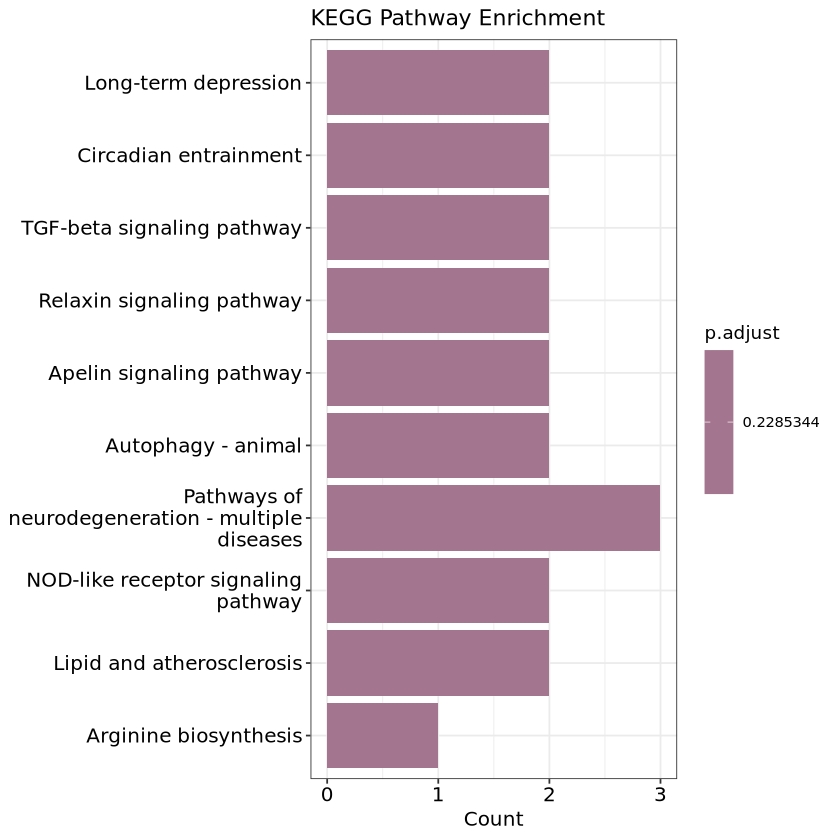

In [16]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### AD2_Aging2_union

In [41]:
AD2_Aging2_union_ego <- enrichGO(
  gene          = AD2_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [42]:
head(AD2_Aging2_union_ego, n=5)

ID        
GO:0008630 GO:0008630
GO:0032200 GO:0032200
GO:0010639 GO:0010639
GO:0000724 GO:0000724
GO:0000723 GO:0000723
           Description                                                    
GO:0008630 intrinsic apoptotic signaling pathway in response to DNA damage
GO:0032200 telomere organization                                          
GO:0010639 negative regulation of organelle organization                  
GO:0000724 double-strand break repair via homologous recombination        
GO:0000723 telomere maintenance                                           
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0008630 7/182     126/21261 0.0001075763 0.2639922 0.2530873
GO:0032200 8/182     218/21261 0.0005975588 0.3843392 0.3684632
GO:0010639 11/182    405/21261 0.0007646902 0.3843392 0.3684632
GO:0000724 7/182     182/21261 0.0009975859 0.3843392 0.3684632
GO:0000723 7/182     185/21261 0.0010970158 0.3843392 0.3684632
           geneID                                                                                                                                                                         
GO:0008630 ENSG00000110108/ENSG00000143194/ENSG00000012048/ENSG00000137331/ENSG00000116062/ENSG00000171552/ENSG00000127334                                                                
GO:0032200 ENSG00000102882/ENSG00000254093/ENSG00000275126/ENSG00000139579/ENSG00000169592/ENSG00000108384/ENSG00000181625/ENSG00000106399                                                
GO:0010639 ENSG00000111490/ENSG00000115306/ENSG00000012048/ENSG00000108828/ENSG00000137331/ENSG00000254093/ENSG00000102879/ENSG00000141298/ENSG00000171552/ENSG00000181625/ENSG00000108395
GO:0000724 ENSG00000012048/ENSG00000139579/ENSG00000127311/ENSG00000108384/ENSG00000181625/ENSG00000106399/ENSG00000185480                                                                
GO:0000723 ENSG00000102882/ENSG00000254093/ENSG00000139579/ENSG00000169592/ENSG00000108384/ENSG00000181625/ENSG00000106399                                                                
           Count
GO:0008630  7   
GO:0032200  8   
GO:0010639 11   
GO:0000724  7   
GO:0000723  7

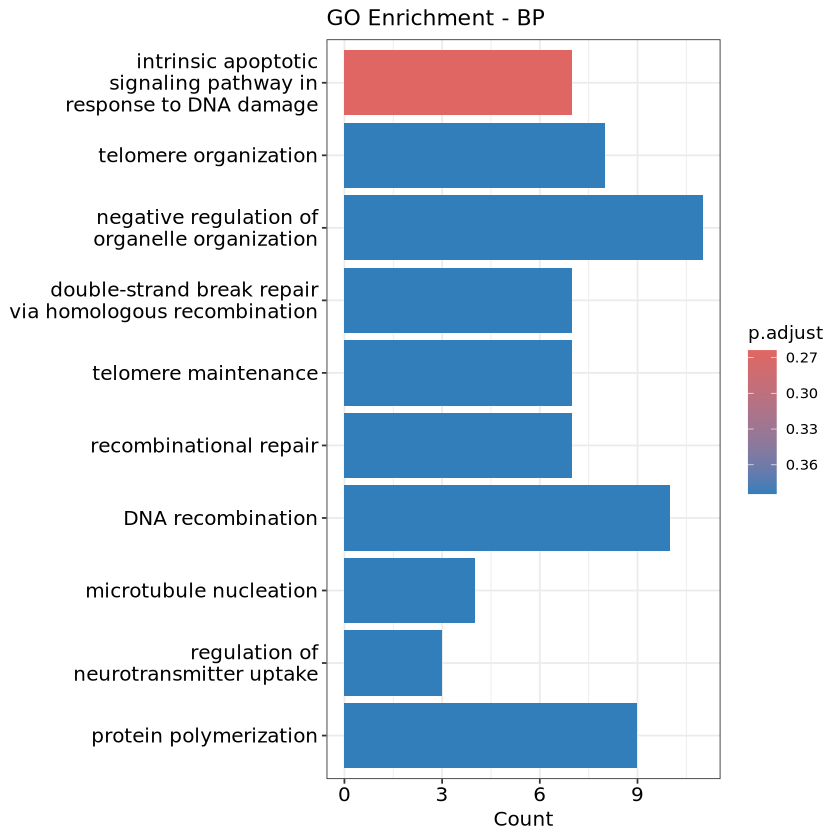

In [32]:
barplot(AD2_Aging2_union_ego, showCategory = 10, title = "GO Enrichment - BP")

In [33]:
AD2_Aging2_union_ego_cc <- enrichGO(
  gene          = AD2_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [34]:
head(AD2_Aging2_union_ego_cc, n=10)

ID         Description                                   GeneRatio
GO:0098978 GO:0098978 glutamatergic synapse                         13/189   
GO:0000930 GO:0000930 gamma-tubulin complex                         3/189    
GO:0036064 GO:0036064 ciliary basal body                            6/189    
GO:1990229 GO:1990229 iron-sulfur cluster assembly complex          2/189    
GO:0044545 GO:0044545 NSL complex                                   2/189    
GO:0031252 GO:0031252 cell leading edge                             10/189   
GO:0035861 GO:0035861 site of double-strand break                   4/189    
GO:0098985 GO:0098985 asymmetric, glutamatergic, excitatory synapse 2/189    
GO:0001741 GO:0001741 XY body                                       2/189    
GO:0000775 GO:0000775 chromosome, centromeric region                7/189    
           BgRatio   pvalue       p.adjust   qvalue    
GO:0098978 440/22568 9.155579e-05 0.02627651 0.02409363
GO:0000930 20/22568  5.933360e-04 0.08514372 0.07807053
GO:0036064 181/22568 4.275774e-03 0.22606105 0.20728136
GO:1990229 12/22568  4.357220e-03 0.22606105 0.20728136
GO:0044545 13/22568  5.121182e-03 0.22606105 0.20728136
GO:0031252 461/22568 5.653247e-03 0.22606105 0.20728136
GO:0035861 88/22568  6.430711e-03 0.22606105 0.20728136
GO:0098985 15/22568  6.818519e-03 0.22606105 0.20728136
GO:0001741 16/22568  7.749915e-03 0.22606105 0.20728136
GO:0000775 277/22568 8.984016e-03 0.22606105 0.20728136
           geneID                                                                                                                                                                                                         
GO:0098978 ENSG00000102882/ENSG00000115306/ENSG00000137312/ENSG00000131094/ENSG00000118407/ENSG00000156599/ENSG00000198561/ENSG00000221866/ENSG00000102879/ENSG00000149927/ENSG00000124181/ENSG00000135905/ENSG00000110975
GO:0000930 ENSG00000037042/ENSG00000131462/ENSG00000012048                                                                                                                                                                
GO:0036064 ENSG00000111490/ENSG00000126001/ENSG00000135912/ENSG00000174989/ENSG00000131462/ENSG00000076382                                                                                                                
GO:1990229 ENSG00000244005/ENSG00000183336                                                                                                                                                                                
GO:0044545 ENSG00000120071/ENSG00000025293                                                                                                                                                                                
GO:0031252 ENSG00000088992/ENSG00000088280/ENSG00000115306/ENSG00000137312/ENSG00000131462/ENSG00000108852/ENSG00000149091/ENSG00000198561/ENSG00000102879/ENSG00000124181                                                
GO:0035861 ENSG00000176563/ENSG00000139579/ENSG00000127311/ENSG00000106399                                                                                                                                                
GO:0098985 ENSG00000131094/ENSG00000221866                                                                                                                                                                                
GO:0001741 ENSG00000143194/ENSG00000012048                                                                                                                                                                                
GO:0000775 ENSG00000278463/ENSG00000120071/ENSG00000254093/ENSG00000275126/ENSG00000175216/ENSG00000076382/ENSG00000203760                                                                                                
           Count
GO:0098978 13   
GO:0000930  3   
GO:0036064  6   
GO:1990229  2   
GO:0044545  2   
GO:0031252 10   
GO:003586

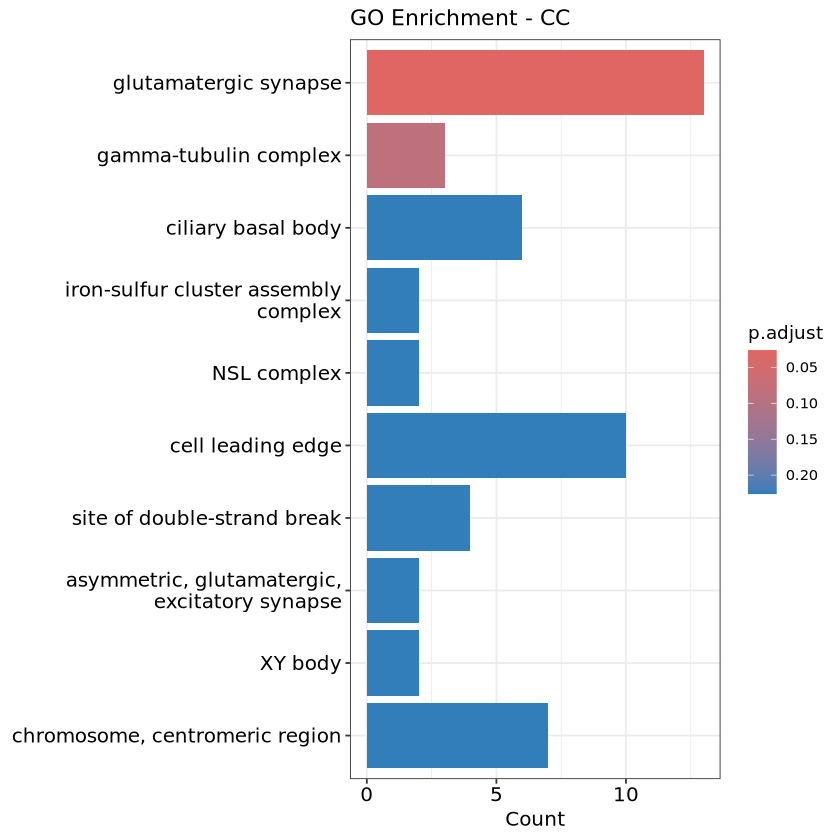

In [35]:
barplot(AD2_Aging2_union_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [36]:
AD2_Aging2_union_ego_mf <- enrichGO(
  gene          = AD2_Aging2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [37]:
head(AD2_Aging2_union_ego_mf, n=5)

ID        
GO:0004435 GO:0004435
GO:0004629 GO:0004629
GO:0016889 GO:0016889
GO:0004861 GO:0004861
GO:0042578 GO:0042578
           Description                                                        
GO:0004435 phosphatidylinositol phospholipase C activity                      
GO:0004629 phospholipase C activity                                           
GO:0016889 DNA endonuclease activity, producing 3'-phosphomonoesters          
GO:0004861 cyclin-dependent protein serine/threonine kinase inhibitor activity
GO:0042578 phosphoric ester hydrolase activity                                
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0004435 3/184     29/21059  0.002028570 0.3937177 0.3766593
GO:0004629 3/184     32/21059  0.002701272 0.3937177 0.3766593
GO:0016889 2/184     10/21059  0.003262854 0.3937177 0.3766593
GO:0004861 2/184     13/21059  0.005559013 0.4168624 0.3988012
GO:0042578 9/184     390/21059 0.007496445 0.4168624 0.3988012
           geneID                                                                                                                                         
GO:0004435 ENSG00000115556/ENSG00000161714/ENSG00000124181                                                                                                
GO:0004629 ENSG00000115556/ENSG00000161714/ENSG00000124181                                                                                                
GO:0016889 ENSG00000108384/ENSG00000181625                                                                                                                
GO:0004861 ENSG00000186834/ENSG00000123080                                                                                                                
GO:0042578 ENSG00000115556/ENSG00000102886/ENSG00000141349/ENSG00000161714/ENSG00000107902/ENSG00000108389/ENSG00000141298/ENSG00000175175/ENSG00000124181
           Count
GO:0004435 3    
GO:0004629 3    
GO:0016889 2    
GO:0004861 2    
GO:0042578 9

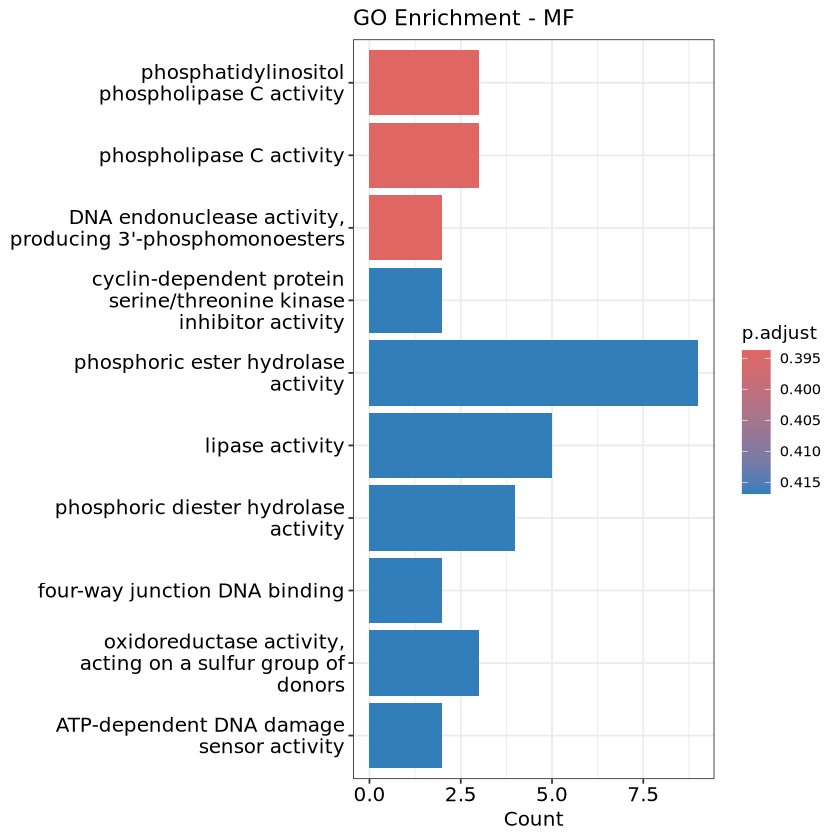

In [38]:
barplot(AD2_Aging2_union_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [43]:
entrez_ids <- bitr(AD2_Aging2, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_Aging2, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“1.96% of input gene IDs are fail to map...”


In [44]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa05133 Human Diseases                       Infectious disease: bacterial  
hsa04613 Organismal Systems                   Immune system                  
hsa03460 Genetic Information Processing       Replication and repair         
hsa05131 Human Diseases                       Infectious disease: bacterial  
hsa04936 Human Diseases                       Endocrine and metabolic disease
hsa05322 Human Diseases                       Immune disease                 
hsa04070 Environmental Information Processing Signal transduction            
hsa04933 Human Diseases                       Endocrine and metabolic disease
hsa04625 Organismal Systems                   Immune system                  
hsa01524 Human Diseases                       Drug resistance: antineoplastic
hsa05171 Human Diseases                       Infectious disease: viral      
hsa00562 Metabolism                           Carbohydrate metabolism        
hsa03440 Genetic Information Processing       Replication and repair         
hsa05034 Human Diseases                       Substance dependence           
hsa04211 Organismal Systems                   Aging                          
hsa05166 Human Diseases                       Infectious disease: viral      
hsa04064 Environmental Information Processing Signal transduction            
hsa04659 Organismal Systems                   Immune system                  
hsa04931 Human Diseases                       Endocrine and metabolic disease
hsa04350 Environmental Information Processing Signal transduction            
         ID       Description                                         
hsa05133 hsa05133 Pertussis                                           
hsa04613 hsa04613 Neutrophil extracellular trap formation             
hsa03460 hsa03460 Fanconi anemia pathway                              
hsa05131 hsa05131 Shigellosis                                         
hsa04936 hsa04936 Alcoholic liver disease                             
hsa05322 hsa05322 Systemic lupus erythematosus                        
hsa04070 hsa04070 Phosphatidylinositol signaling system               
hsa04933 hsa04933 AGE-RAGE signaling pathway in diabetic complications
hsa04625 hsa04625 C-type lectin receptor signaling pathway            
hsa01524 hsa01524 Platinum drug resistance                            
hsa05171 hsa05171 Coronavirus disease - COVID-19                      
hsa00562 hsa00562 Inositol phosphate metabolism                       
hsa03440 hsa03440 Homologous recombination                            
hsa05034 hsa05034 Alcoholism                                          
hsa04211 hsa04211 Longevity regulating pathway                        
hsa05166 hsa05166 Human T-cell leukemia virus 1 infection             
hsa04064 hsa04064 NF-kappa B signaling pathway                        
hsa04659 hsa04659 Th17 cell differentiation                           
hsa04931 hsa04931 Insulin resistance                                  
hsa04350 hsa04350 TGF-beta signaling pathway                          
         GeneRatio BgRatio  pvalue       p.adjust   qvalue     
hsa05133 6/81      78/9446  5.178947e-05 0.01170442 0.009758227
hsa04613 8/81      196/9446 2.621586e-04 0.02962393 0.024698104
hsa03460 4/81      55/9446  1.227821e-03 0.04814099 0.040136173
hsa05131 8/81      253/9446 1.410049e-03 0.04814099 0.040136173
hsa04936 6/81      144/9446 1.435551e-03 0.04814099 0.040136173
hsa05322 6/81      144/9446 1.435551e-03 0.04814099 0.040136173
hsa04070 5/81      98/9446  1.491092e-03 0.04814099 0.040136173
hsa04933 5/81      101/9446 1.704775e-03 0.04815989 0.040151932
hsa04625 5/81      105/9446 2.023661e-03 0.05081637 0.042366700
hsa01524 4/81      75/9446  3.844921e-03 0.08335351 0.069493612
hsa05171 7/81      238/9446 4.213421e-03 0.08335351 0.069493612
hsa00562 4/81      78/9446  4.425850e-03 0.08335351 0.069493612
hsa03440 3/81      41/9446  5.122052e-03 0.08904

In [46]:
entrez_ids |> filter(ENTREZID %in% c("9020","5595","721","720","110384692","51561","4790","5335"))

ENSEMBL         ENTREZID 
1 ENSG00000102882 5595     
2 ENSG00000224389 721      
3 ENSG00000244731 720      
4 ENSG00000244731 110384692
5 ENSG00000110944 51561    
6 ENSG00000006062 9020     
7 ENSG00000124181 5335     
8 ENSG00000109320 4790

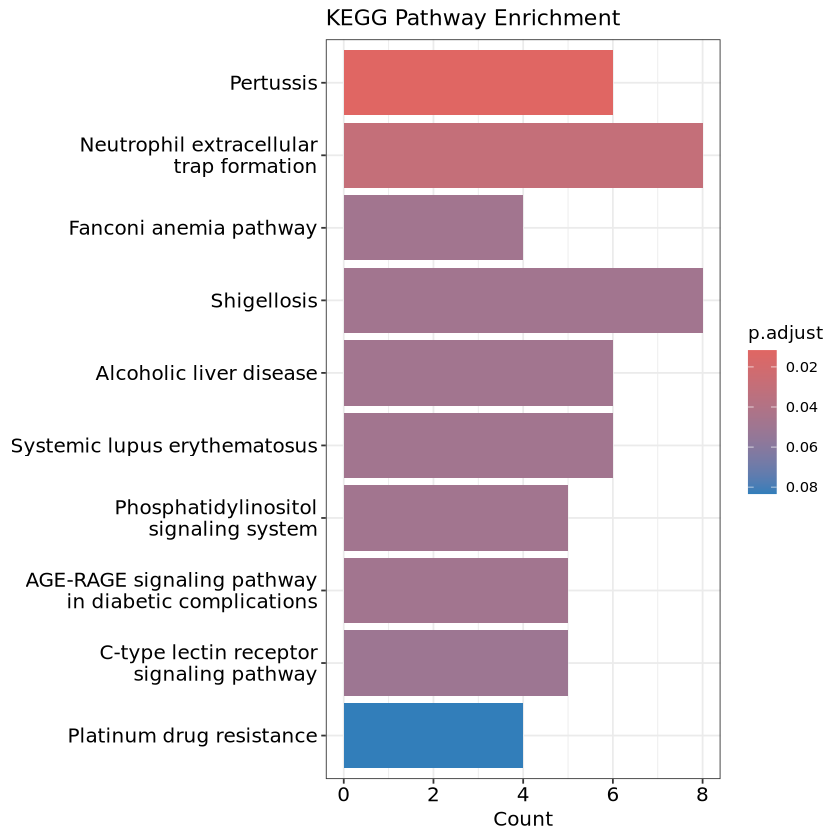

In [13]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### AD2_Aging4_xQTL

In [21]:
AD2_Aging4_xQTL_ego <- enrichGO(
  gene          = AD2_Aging4_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(AD2_Aging4_xQTL_ego, n=25)

ID        
GO:0090151 GO:0090151
GO:0000266 GO:0000266
GO:0046638 GO:0046638
GO:0046637 GO:0046637
GO:0051607 GO:0051607
GO:0140546 GO:0140546
GO:0046635 GO:0046635
GO:0072594 GO:0072594
GO:0072655 GO:0072655
GO:0046632 GO:0046632
GO:0007006 GO:0007006
GO:0045582 GO:0045582
GO:0070585 GO:0070585
GO:0045621 GO:0045621
GO:0046634 GO:0046634
GO:0010821 GO:0010821
GO:0007259 GO:0007259
GO:0097696 GO:0097696
GO:0010533 GO:0010533
GO:0045580 GO:0045580
GO:0001865 GO:0001865
GO:1902107 GO:1902107
GO:1903708 GO:1903708
GO:0022400 GO:0022400
GO:0034975 GO:0034975
           Description                                                    
GO:0090151 establishment of protein localization to mitochondrial membrane
GO:0000266 mitochondrial fission                                          
GO:0046638 positive regulation of alpha-beta T cell differentiation       
GO:0046637 regulation of alpha-beta T cell differentiation                
GO:0051607 defense response to virus                                      
GO:0140546 defense response to symbiont                                   
GO:0046635 positive regulation of alpha-beta T cell activation            
GO:0072594 establishment of protein localization to organelle             
GO:0072655 establishment of protein localization to mitochondrion         
GO:0046632 alpha-beta T cell differentiation                              
GO:0007006 mitochondrial membrane organization                            
GO:0045582 positive regulation of T cell differentiation                  
GO:0070585 protein localization to mitochondrion                          
GO:0045621 positive regulation of lymphocyte differentiation              
GO:0046634 regulation of alpha-beta T cell activation                     
GO:0010821 regulation of mitochondrion organization                       
GO:0007259 receptor signaling pathway via JAK-STAT                        
GO:0097696 receptor signaling pathway via STAT                            
GO:0010533 regulation of activation of Janus kinase activity              
GO:0045580 regulation of T cell differentiation                           
GO:0001865 NK T cell differentiation                                      
GO:1902107 positive regulation of leukocyte differentiation               
GO:1903708 positive regulation of hemopoiesis                             
GO:0022400 regulation of rhodopsin mediated signaling pathway             
GO:0034975 protein folding in endoplasmic reticulum                       
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0090151 2/11      43/21261  0.0002172238 0.04686572 0.02394774
GO:0000266 2/11      44/21261  0.0002275035 0.04686572 0.02394774
GO:0046638 2/11      70/21261  0.0005765365 0.07279693 0.03719822
GO:0046637 2/11      92/21261  0.0009931434 0.07279693 0.03719822
GO:0051607 3/11      424/21261 0.0011534507 0.07279693 0.03719822
GO:0140546 3/11      425/21261 0.0011613202 0.07279693 0.03719822
GO:0046635 2/11      106/21261 0.0013151089 0.07279693 0.03719822
GO:0072594 3/11      494/21261 0.0017900526 0.07279693 0.03719822
GO:0072655 2/11      141/21261 0.0023095280 0.07279693 0.03719822
GO:0046632 2/11      142/21261 0.0023418601 0.07279693 0.03719822
GO:0007006 2/11      144/21261 0.0024071705 0.07279693 0.03719822
GO:0045582 2/11      147/21261 0.0025067485 0.07279693 0.03719822
GO:0070585 2/11      148/21261 0.0025403704 0.07279693 0.03719822
GO:0045621 2/11      162/21261 0.0030334912 0.07279693 0.03719822
GO:0046634 2/11      173/21261 0.0034500708 0.07279693 0.03719822
GO:0010821 2/11      179/21261 0.0036880009 0.07279693 0.03719822
GO:0007259 2/11      192/21261 0.0042292082 0.07279693 0.03719822
GO:0097696 2/11      207/21261 0.0048969242 0.07279693 0.03719822
GO:0010533 1/11      10/21261  0.0051628536 0.07279693 0.03719822
GO:0045580 2/11      219/21261 0.0054640608 0.07279693 0.03719822
GO:0001865 1/11      11/21261  0.0056778039 0.07279693 0.03719822
GO:1902107 2/11      232/21261 0.0061

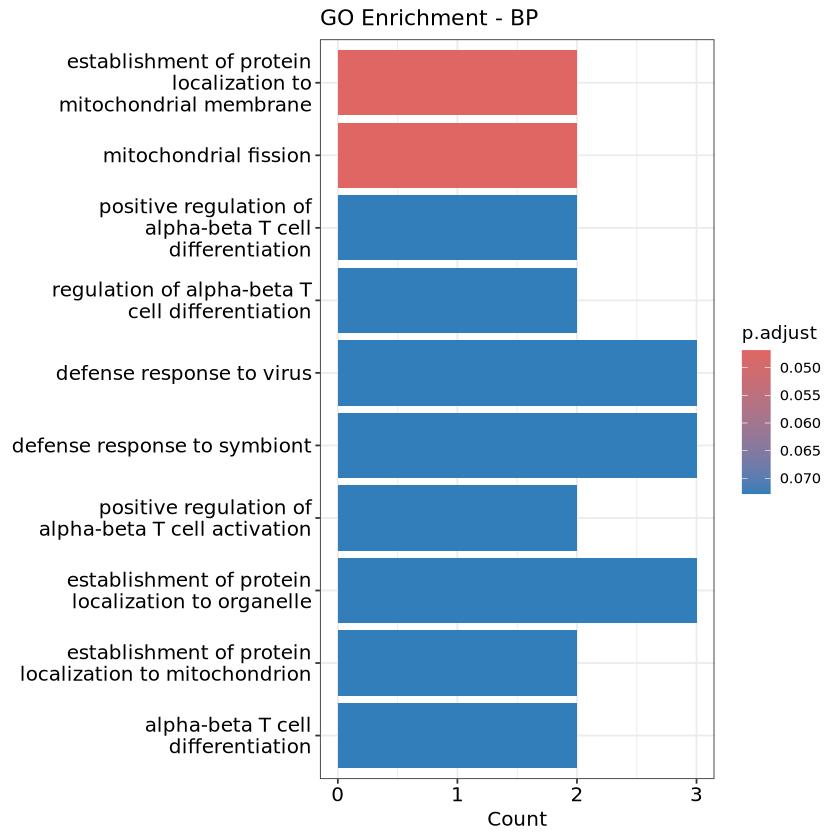

In [42]:
barplot(AD2_Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [43]:
AD2_Aging4_xQTL_ego_cc <- enrichGO(
  gene          = AD2_Aging4_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [44]:
head(AD2_Aging4_xQTL_ego_cc, n=10)

ID         Description                           GeneRatio BgRatio  
GO:0005788 GO:0005788 endoplasmic reticulum lumen           2/11      337/22568
GO:0030131 GO:0030131 clathrin adaptor complex              1/11      29/22568 
GO:0030119 GO:0030119 AP-type membrane coat adaptor complex 1/11      41/22568 
GO:0009295 GO:0009295 nucleoid                              1/11      47/22568 
GO:0042645 GO:0042645 mitochondrial nucleoid                1/11      47/22568 
GO:0030118 GO:0030118 clathrin coat                         1/11      52/22568 
GO:1904115 GO:1904115 axon cytoplasm                        1/11      66/22568 
GO:0035861 GO:0035861 site of double-strand break           1/11      88/22568 
GO:0120111 GO:0120111 neuron projection cytoplasm           1/11      92/22568 
GO:0030117 GO:0030117 membrane coat                         1/11      100/22568
           pvalue     p.adjust  qvalue     geneID                         
GO:0005788 0.01118613 0.1002445 0.05715694 ENSG00000086619/ENSG00000110944
GO:0030131 0.01404768 0.1002445 0.05715694 ENSG00000132842                
GO:0030119 0.01980785 0.1002445 0.05715694 ENSG00000132842                
GO:0009295 0.02267645 0.1002445 0.05715694 ENSG00000197785                
GO:0042645 0.02267645 0.1002445 0.05715694 ENSG00000197785                
GO:0030118 0.02506112 0.1002445 0.05715694 ENSG00000132842                
GO:1904115 0.03171007 0.1040427 0.05932262 ENSG00000132842                
GO:0035861 0.04207518 0.1040427 0.05932262 ENSG00000139579                
GO:0120111 0.04394887 0.1040427 0.05932262 ENSG00000132842                
GO:0030117 0.04768626 0.1040427 0.05932262 ENSG00000132842                
           Count
GO:0005788 2    
GO:0030131 1    
GO:0030119 1    
GO:0009295 1    
GO:0042645 1    
GO:0030118 1    
GO:1904115 1    
GO:0035861 1    
GO:0120111 1    
GO:0030117 1

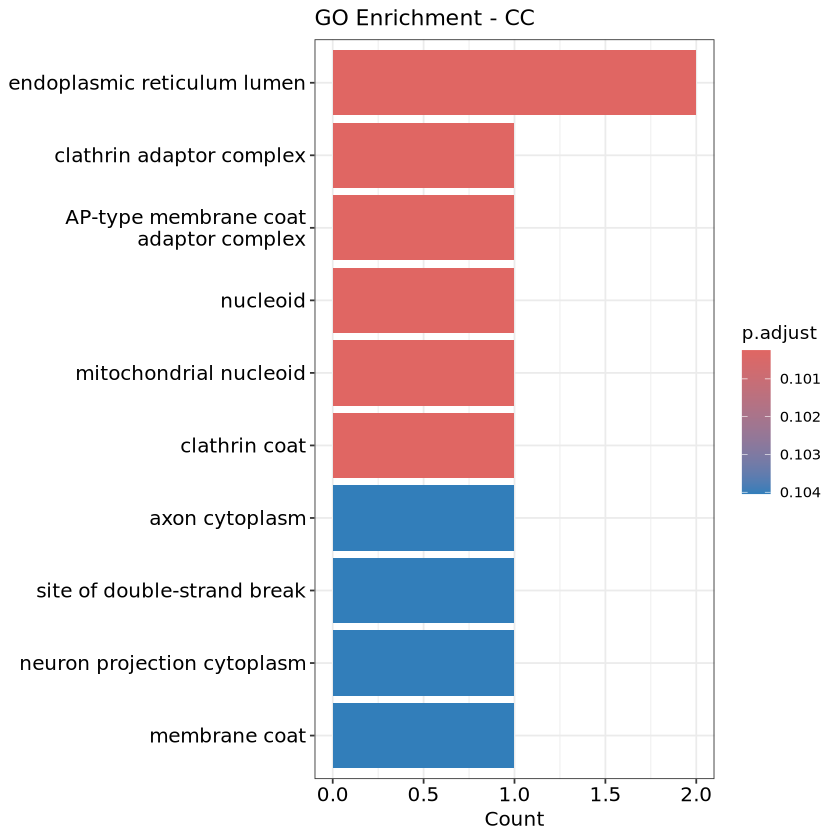

In [45]:
barplot(AD2_Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [46]:
AD2_Aging4_xQTL_ego_mf <- enrichGO(
  gene          = AD2_Aging4_overlap,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [47]:
head(AD2_Aging4_xQTL_ego_mf, n=5)

ID        
GO:0098505 GO:0098505
GO:0019107 GO:0019107
GO:0016670 GO:0016670
GO:0043047 GO:0043047
GO:0004535 GO:0004535
           Description                                                                    
GO:0098505 G-rich strand telomeric DNA binding                                            
GO:0019107 myristoyltransferase activity                                                  
GO:0016670 oxidoreductase activity, acting on a sulfur group of donors, oxygen as acceptor
GO:0043047 single-stranded telomeric DNA binding                                          
GO:0004535 poly(A)-specific ribonuclease activity                                         
           GeneRatio BgRatio  pvalue      p.adjust   qvalue     geneID         
GO:0098505 1/12      10/21059 0.005684899 0.04411064 0.02048482 ENSG00000139579
GO:0019107 1/12      11/21059 0.006251756 0.04411064 0.02048482 ENSG00000136448
GO:0016670 1/12      12/21059 0.006818317 0.04411064 0.02048482 ENSG00000086619
GO:0043047 1/12      12/21059 0.006818317 0.04411064 0.02048482 ENSG00000139579
GO:0004535 1/12      14/21059 0.007950551 0.04411064 0.02048482 ENSG00000135473
           Count
GO:0098505 1    
GO:0019107 1    
GO:0016670 1    
GO:0043047 1    
GO:0004535 1

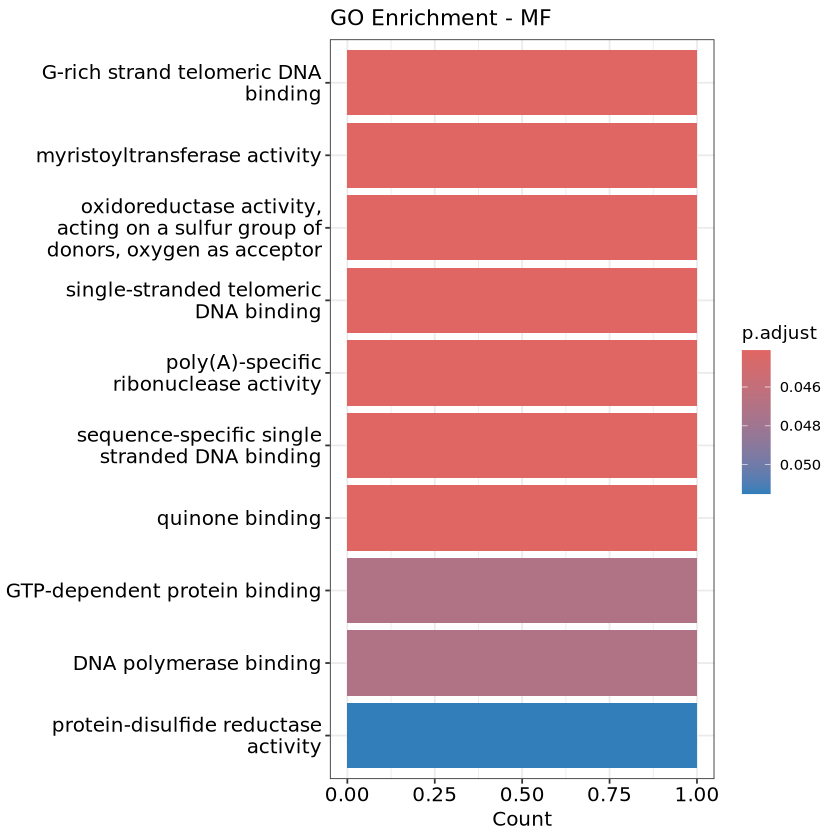

In [48]:
barplot(AD2_Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [17]:
entrez_ids <- bitr(AD2_Aging4_overlap, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [18]:
kegg_enrich %>% head(n=20)

category                             subcategory                     
hsa04625 Organismal Systems                   Immune system                   
hsa04630 Environmental Information Processing Signal transduction             
hsa00020 Metabolism                           Carbohydrate metabolism         
hsa00630 Metabolism                           Carbohydrate metabolism         
hsa01210 Metabolism                           Global and overview maps        
hsa05321 Human Diseases                       Immune disease                  
hsa01230 Metabolism                           Global and overview maps        
hsa03018 Genetic Information Processing       Folding, sorting and degradation
hsa05133 Human Diseases                       Infectious disease: bacterial   
hsa05323 Human Diseases                       Immune disease                  
hsa04620 Organismal Systems                   Immune system                   
hsa04659 Organismal Systems                   Immune system                   
hsa01200 Metabolism                           Global and overview maps        
hsa04142 Cellular Processes                   Transport and catabolism        
hsa05162 Human Diseases                       Infectious disease: viral       
hsa04380 Organismal Systems                   Development and regeneration    
hsa04217 Cellular Processes                   Cell growth and death           
hsa05160 Human Diseases                       Infectious disease: viral       
hsa05161 Human Diseases                       Infectious disease: viral       
hsa04141 Genetic Information Processing       Folding, sorting and degradation
         ID       Description                                 GeneRatio
hsa04625 hsa04625 C-type lectin receptor signaling pathway    2/6      
hsa04630 hsa04630 JAK-STAT signaling pathway                  2/6      
hsa00020 hsa00020 Citrate cycle (TCA cycle)                   1/6      
hsa00630 hsa00630 Glyoxylate and dicarboxylate metabolism     1/6      
hsa01210 hsa01210 2-Oxocarboxylic acid metabolism             1/6      
hsa05321 hsa05321 Inflammatory bowel disease                  1/6      
hsa01230 hsa01230 Biosynthesis of amino acids                 1/6      
hsa03018 hsa03018 RNA degradation                             1/6      
hsa05133 hsa05133 Pertussis                                   1/6      
hsa05323 hsa05323 Rheumatoid arthritis                        1/6      
hsa04620 hsa04620 Toll-like receptor signaling pathway        1/6      
hsa04659 hsa04659 Th17 cell differentiation                   1/6      
hsa01200 hsa01200 Carbon metabolism                           1/6      
hsa04142 hsa04142 Lysosome                                    1/6      
hsa05162 hsa05162 Measles                                     1/6      
hsa04380 hsa04380 Osteoclast differentiation                  1/6      
hsa04217 hsa04217 Necroptosis                                 1/6      
hsa05160 hsa05160 Hepatitis C                                 1/6      
hsa05161 hsa05161 Hepatitis B                                 1/6      
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 1/6      
         BgRatio  pvalue      p.adjust   qvalue     geneID     Count
hsa04625 105/9446 0.001783212 0.05349635 0.03941837 51561/6773 2    
hsa04630 168/9446 0.004500220 0.06750330 0.04973927 51561/6773 2    
hsa00020 30/9446  0.018909990 0.12470691 0.09188930 1431       1    
hsa00630 32/9446  0.020159985 0.12470691 0.09188930 1431       1    
hsa01210 33/9446  0.020784485 0.12470691 0.09188930 1431       1    
hsa05321 66/9446  0.041207720 0.13643607 0.10053184 51561      1    
hsa01230 75/9446  0.046715661 0.13643607 0.10053184 1431       1    
hsa03018 78/9446  0.048545772 0.13643607 0.10053184 9924       1    
hsa05133 78/9446  0.048545772 0.13643607 0.10053184 51561      1    
hsa05323 95/9446  0.058861185 0.13643607 0.10053184 51561      1    
hsa04620 109/9446 0.067286095 0.13643607 0.10053184 6773       1    
hsa04659 1

In [20]:
entrez_ids |> filter(ENTREZID %in% c("51561", "6773")) 

ENSEMBL         ENTREZID
1 ENSG00000110944 51561   
2 ENSG00000170581 6773

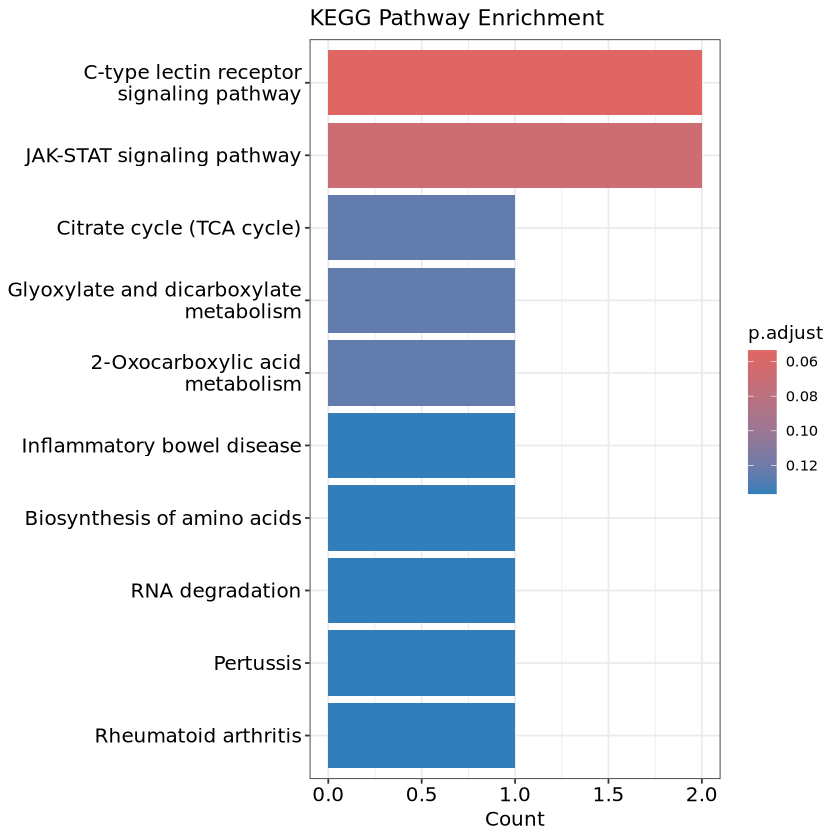

In [19]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### AD_AD1_Aging3

In [38]:
AD_AD1_Aging3_ego <- enrichGO(
  gene          = AD_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [55]:
head(AD_AD1_Aging3_ego, n=35)

ID        
GO:0072384 GO:0072384
GO:0010970 GO:0010970
GO:0031346 GO:0031346
GO:0019896 GO:0019896
GO:0032872 GO:0032872
GO:0070302 GO:0070302
GO:0099111 GO:0099111
GO:0030705 GO:0030705
GO:0034643 GO:0034643
GO:0047497 GO:0047497
GO:0051647 GO:0051647
GO:0051654 GO:0051654
GO:0048568 GO:0048568
GO:0051403 GO:0051403
GO:0050772 GO:0050772
GO:0031098 GO:0031098
GO:0032535 GO:0032535
GO:0044403 GO:0044403
GO:1902850 GO:1902850
GO:0043001 GO:0043001
GO:0030307 GO:0030307
GO:0016233 GO:0016233
GO:0048708 GO:0048708
GO:0090150 GO:0090150
GO:0060502 GO:0060502
GO:0007018 GO:0007018
GO:0051258 GO:0051258
GO:0060020 GO:0060020
GO:0060439 GO:0060439
GO:0001558 GO:0001558
GO:0051646 GO:0051646
GO:0032271 GO:0032271
GO:0006893 GO:0006893
GO:0051656 GO:0051656
GO:0032210 GO:0032210
           Description                                                      
GO:0072384 organelle transport along microtubule                            
GO:0010970 transport along microtubule                                      
GO:0031346 positive regulation of cell projection organization              
GO:0019896 axonal transport of mitochondrion                                
GO:0032872 regulation of stress-activated MAPK cascade                      
GO:0070302 regulation of stress-activated protein kinase signaling cascade  
GO:0099111 microtubule-based transport                                      
GO:0030705 cytoskeleton-dependent intracellular transport                   
GO:0034643 establishment of mitochondrion localization, microtubule-mediated
GO:0047497 mitochondrion transport along microtubule                        
GO:0051647 nucleus localization                                             
GO:0051654 establishment of mitochondrion localization                      
GO:0048568 embryonic organ development                                      
GO:0051403 stress-activated MAPK cascade                                    
GO:0050772 positive regulation of axonogenesis                              
GO:0031098 stress-activated protein kinase signaling cascade                
GO:0032535 regulation of cellular component size                            
GO:0044403 biological process involved in symbiotic interaction             
GO:1902850 microtubule cytoskeleton organization involved in mitosis        
GO:0043001 Golgi to plasma membrane protein transport                       
GO:0030307 positive regulation of cell growth                               
GO:0016233 telomere capping                                                 
GO:0048708 astrocyte differentiation                                        
GO:0090150 establishment of protein localization to membrane                
GO:0060502 epithelial cell proliferation involved in lung morphogenesis     
GO:0007018 microtubule-based movement                                       
GO:0051258 protein polymerization                                           
GO:0060020 Bergmann glial cell differentiation                              
GO:0060439 trachea morphogenesis                                            
GO:0001558 regulation of cell growth                                        
GO:0051646 mitochondrion localization                                       
GO:0032271 regulation of protein polymerization                             
GO:0006893 Golgi to plasma membrane transport                               
GO:0051656 establishment of organelle localization                          
GO:0032210 regulation of telomere maintenance via telomerase                
           GeneRatio BgRatio   pvalue       p.adjust     qvalue      
GO:0072384 6/66      92/21261  4.103877e-07 0.0005995764 0.0004643861
GO:0010970 6/66      179/21261 1.957404e-05 0.0114558891 0.0088728562
GO:0031346 8/66      386/21261 2.515460e-05 0.0114558891 0.0088728562
GO:0019896 3/66      20/21261  3.136452e-05 0.0114558891 0.0088728562
GO:0032872 6/66      208/21261 4.546476e-05 0.0119892953 0.0092859919
GO:0070302 6/66      211/21

In [40]:
AD_AD1_Aging3_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                                              
GO:0098876 GO:0098876 vesicle-mediated transport to the plasma membrane        
GO:0048193 GO:0048193 Golgi vesicle transport                                  
GO:0006892 GO:0006892 post-Golgi vesicle-mediated transport                    
GO:0098927 GO:0098927 vesicle-mediated transport between endosomal compartments
GO:0099504 GO:0099504 synaptic vesicle cycle                                   
GO:0016079 GO:0016079 synaptic vesicle exocytosis                              
GO:0099003 GO:0099003 vesicle-mediated transport in synapse                    
GO:0098693 GO:0098693 regulation of synaptic vesicle cycle                     
GO:1902855 GO:1902855 regulation of non-motile cilium assembly                 
GO:1902018 GO:1902018 negative regulation of cilium assembly                   
GO:0006891 GO:0006891 intra-Golgi vesicle-mediated transport                   
GO:0035459 GO:0035459 vesicle cargo loading                                    
GO:2000300 GO:2000300 regulation of synaptic vesicle exocytosis                
GO:0047496 GO:0047496 vesicle transport along microtubule                      
GO:1905515 GO:1905515 non-motile cilium assembly                               
GO:1902017 GO:1902017 regulation of cilium assembly                            
GO:0099518 GO:0099518 vesicle cytoskeletal trafficking                         
GO:0048488 GO:0048488 synaptic vesicle endocytosis                             
GO:0036465 GO:0036465 synaptic vesicle recycling                               
GO:0006906 GO:0006906 vesicle fusion                                           
GO:0016050 GO:0016050 vesicle organization                                     
GO:0060271 GO:0060271 cilium assembly                                          
GO:0006888 GO:0006888 endoplasmic reticulum to Golgi vesicle-mediated transport
GO:0044782 GO:0044782 cilium organization                                      
GO:0051650 GO:0051650 establishment of vesicle localization                    
GO:0051648 GO:0051648 vesicle localization                                     
           GeneRatio BgRatio   pvalue      p.adjust   qvalue    
GO:0098876 4/66      163/21261 0.001658358 0.03744256 0.02900015
GO:0048193 5/66      326/21261 0.003421027 0.04948634 0.03832833
GO:0006892 3/66      113/21261 0.005245394 0.06320000 0.04894989
GO:0098927 2/66      53/21261  0.011811504 0.09860918 0.07637514
GO:0099504 3/66      216/21261 0.029637373 0.16091534 0.12463272
GO:0016079 2/66      98/21261  0.037273155 0.16653235 0.12898323
GO:0099003 3/66      241/21261 0.039053975 0.16877488 0.13072012
GO:0098693 1/66      13/21261  0.039623397 0.16877488 0.13072012
GO:1902855 1/66      13/21261  0.039623397 0.16877488 0.13072012
GO:1902018 1/66      19/21261  0.057385640 0.19318069 0.14962300
GO:0006891 1/66      38/21261  0.111525227 0.24914122 0.19296575
GO:0035459 1/66      40/21261  0.117042782 0.25560464 0.19797182
GO:2000300 1/66      43/21261  0.125255899 0.26031133 0.20161727
GO:0047496 1/66      48/21261  0.138777540 0.27510717 0.21307699
GO:1905515 1/66      70/21261  0.195867916 0.31760602 0.24599335
GO:1902017 1/66      75/21261  0.208313789 0.32550422 0.25211069
GO:0099518 1/66      76/21261  0.210780101 0.32691054 0.25319992
GO:0048488 1/66      78/21261  0.215690047 0.33197358 0.25712137
GO:0036465 1/66      92/21261  0.249227348 0.35803457 0.27730621
GO:0006906 1/66      129/21261 0.331212210 0.41968867 0.32505877
GO:0016050 2/66      392/21261 0.344297475 0.43066662 0.33356145
GO:0060271 2/66      396/21261 0.348821978 0.43520829 0.33707908
GO:0006888 1/66      144/21261 0.361877968 0.44541172 0.34498188
GO:0044782 2/66      425/21261 0.381303971 0.46260724 0.35830022
GO:0051650 1/66      209/21261 0.479521753 0.53357295 0.41326483
GO:0051648 1/66      230/21261 0.512750501 0.56072491 0.43429467
           geneID                                                                         
GO:00

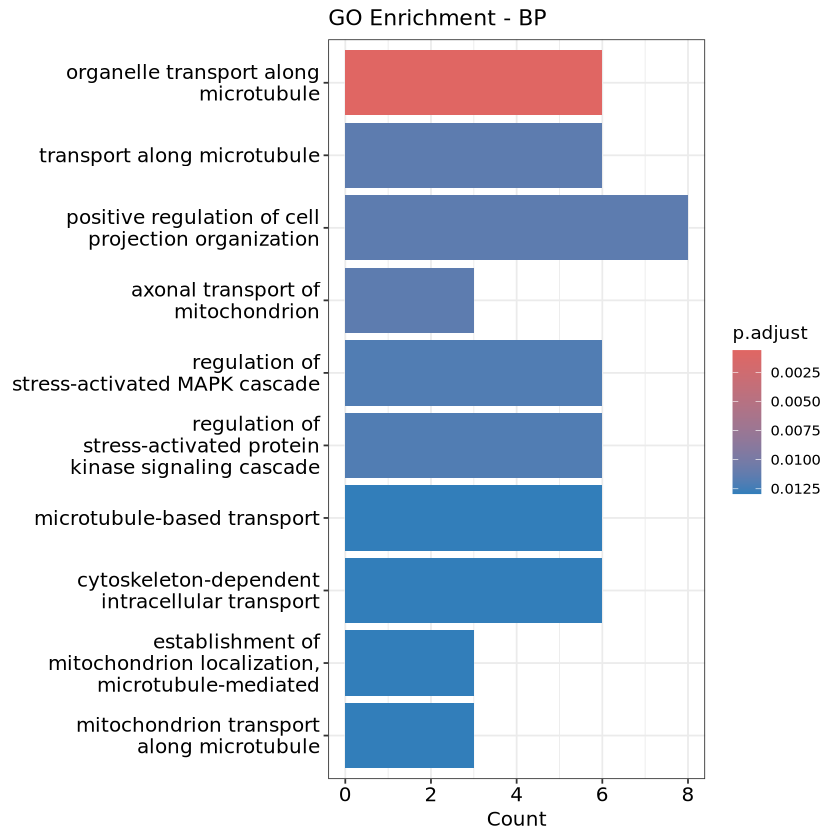

In [53]:
barplot(AD_AD1_Aging3_ego, showCategory = 10, title = "GO Enrichment - BP")

In [42]:
AD_AD1_Aging3_ego_cc <- enrichGO(
  gene          = AD_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [57]:
head(AD_AD1_Aging3_ego_cc, n=20)

ID         Description                    GeneRatio BgRatio  
GO:0005875 GO:0005875 microtubule associated complex 6/70      165/22568
GO:0030673 GO:0030673 axolemma                       3/70      26/22568 
GO:0044304 GO:0044304 main axon                      4/70      81/22568 
GO:0031256 GO:0031256 leading edge membrane          5/70      200/22568
GO:0005925 GO:0005925 focal adhesion                 7/70      495/22568
GO:0044754 GO:0044754 autolysosome                   2/70      16/22568 
GO:1904115 GO:1904115 axon cytoplasm                 3/70      66/22568 
GO:0032589 GO:0032589 neuron projection membrane     3/70      71/22568 
GO:0005767 GO:0005767 secondary lysosome             2/70      23/22568 
GO:0031430 GO:0031430 M band                         2/70      23/22568 
GO:0098978 GO:0098978 glutamatergic synapse          6/70      440/22568
GO:0099568 GO:0099568 cytoplasmic region             5/70      301/22568
GO:0120111 GO:0120111 neuron projection cytoplasm    3/70      92/22568 
GO:0031252 GO:0031252 cell leading edge              6/70      461/22568
GO:0044295 GO:0044295 axonal growth cone             2/70      30/22568 
GO:0072686 GO:0072686 mitotic spindle                4/70      211/22568
GO:0005775 GO:0005775 vacuolar lumen                 4/70      216/22568
GO:0031672 GO:0031672 A band                         2/70      35/22568 
GO:0043202 GO:0043202 lysosomal lumen                3/70      120/22568
GO:0051233 GO:0051233 spindle midzone                2/70      40/22568 
           pvalue       p.adjust    qvalue     
GO:0005875 1.241779e-05 0.002707079 0.001999918
GO:0030673 7.059388e-05 0.007694733 0.005684665
GO:0044304 1.179241e-04 0.008569148 0.006330660
GO:0031256 3.944617e-04 0.021498165 0.015882275
GO:0005925 8.518494e-04 0.035407905 0.026158424
GO:0044754 1.106502e-03 0.035407905 0.026158424
GO:1904115 1.136951e-03 0.035407905 0.026158424
GO:0032589 1.404448e-03 0.038271207 0.028273755
GO:0005767 2.300387e-03 0.044244104 0.032686374
GO:0031430 2.300387e-03 0.044244104 0.032686374
GO:0098978 2.430299e-03 0.044244104 0.032686374
GO:0099568 2.435455e-03 0.044244104 0.032686374
GO:0120111 2.945951e-03 0.047659300 0.035209430
GO:0031252 3.060689e-03 0.047659300 0.035209430
GO:0044295 3.900215e-03 0.056683119 0.041875988
GO:0072686 4.207099e-03 0.057321729 0.042347777
GO:0005775 4.570271e-03 0.058607003 0.043297303
GO:0031672 5.281757e-03 0.063967945 0.047257825
GO:0043202 6.194176e-03 0.071070015 0.052504646
GO:0051233 6.855247e-03 0.071163994 0.052574076
           geneID                                                                                                         
GO:0005875 ENSG00000187164/ENSG00000131966/ENSG00000047849/ENSG00000137177/ENSG00000138107/ENSG00000066629                
GO:0030673 ENSG00000115306/ENSG00000186868/ENSG00000029534                                                                
GO:0044304 ENSG00000115306/ENSG00000136717/ENSG00000186868/ENSG00000029534                                                
GO:0031256 ENSG00000070831/ENSG00000115306/ENSG00000186868/ENSG00000146648/ENSG00000029534                                
GO:0005925 ENSG00000142798/ENSG00000070831/ENSG00000169032/ENSG00000102882/ENSG00000146648/ENSG00000141298/ENSG00000241973
GO:0044754 ENSG00000225190/ENSG00000101460                                                                                
GO:1904115 ENSG00000131966/ENSG00000186868/ENSG00000186094                                                                
GO:0032589 ENSG00000115306/ENSG00000186868/ENSG00000029534                                                                
GO:0005767 ENSG00000225190/ENSG00000101460                                                                                
GO:0031430 ENSG00000115306/ENSG00000029534                                                                                
GO:0098978 ENSG00000070831/ENSG00000115306/ENSG00000136717/ENSG00000102882/ENSG00000101460/ENSG00000114646           

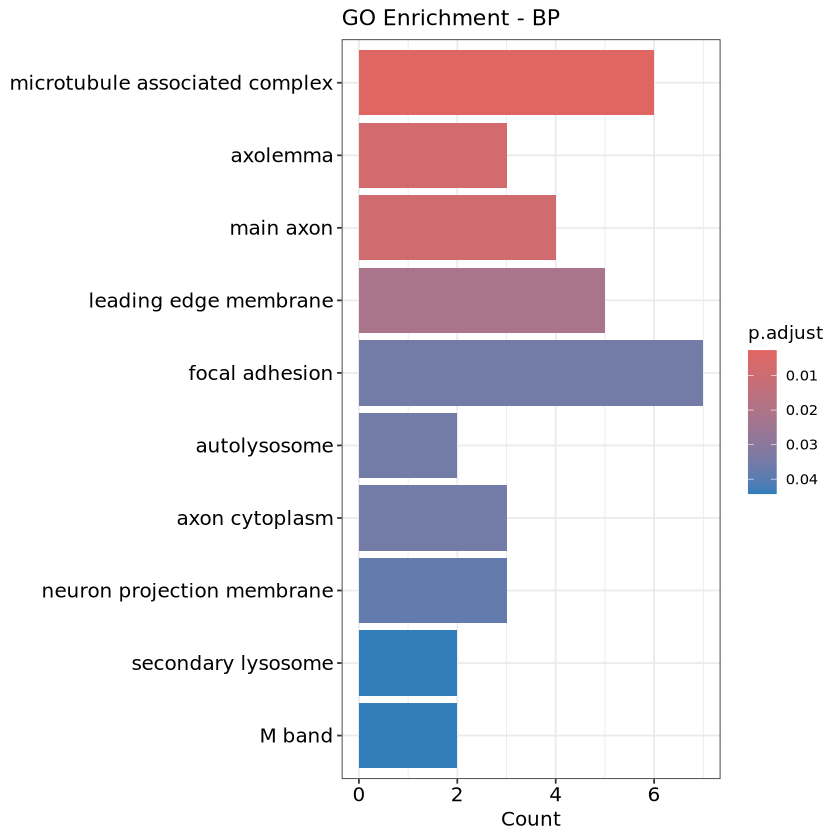

In [44]:
barplot(AD_AD1_Aging3_ego_cc, showCategory = 10, title = "GO Enrichment - BP")

In [45]:
AD_AD1_Aging3_ego_mf <- enrichGO(
  gene          = AD_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [46]:
head(AD_AD1_Aging3_ego_mf, n=10)

ID         Description                        GeneRatio BgRatio  
GO:0015631 GO:0015631 tubulin binding                    9/66      397/21059
GO:0019902 GO:0019902 phosphatase binding                6/66      230/21059
GO:0008017 GO:0008017 microtubule binding                6/66      289/21059
GO:0051020 GO:0051020 GTPase binding                     6/66      337/21059
GO:0003779 GO:0003779 actin binding                      7/66      475/21059
GO:0004708 GO:0004708 MAP kinase kinase activity         2/66      18/21059 
GO:0019903 GO:0019903 protein phosphatase binding        4/66      175/21059
GO:0004622 GO:0004622 lysophospholipase activity         2/66      24/21059 
GO:0004709 GO:0004709 MAP kinase kinase kinase activity  2/66      27/21059 
GO:0003713 GO:0003713 transcription coactivator activity 5/66      321/21059
           pvalue       p.adjust     qvalue     
GO:0015631 3.936472e-06 0.0008463414 0.000683703
GO:0019902 8.360783e-05 0.0089878415 0.007260680
GO:0008017 2.888550e-04 0.0207012777 0.016723186
GO:0051020 6.509736e-04 0.0301888799 0.024387590
GO:0003779 7.020670e-04 0.0301888799 0.024387590
GO:0004708 1.432923e-03 0.0513464168 0.041479358
GO:0019903 2.223728e-03 0.0683002252 0.055175213
GO:0004622 2.553741e-03 0.0686317791 0.055443053
GO:0004709 3.228089e-03 0.0717090241 0.057928955
GO:0003713 3.335303e-03 0.0717090241 0.057928955
           geneID                                                                                                                                         
GO:0015631 ENSG00000186868/ENSG00000101460/ENSG00000100242/ENSG00000186094/ENSG00000188042/ENSG00000181555/ENSG00000047849/ENSG00000137177/ENSG00000066629
GO:0019902 ENSG00000147324/ENSG00000102882/ENSG00000186868/ENSG00000100991/ENSG00000146648/ENSG00000029534                                                
GO:0008017 ENSG00000186868/ENSG00000101460/ENSG00000100242/ENSG00000047849/ENSG00000137177/ENSG00000066629                                                
GO:0051020 ENSG00000163171/ENSG00000115306/ENSG00000136717/ENSG00000174943/ENSG00000135968/ENSG00000100592                                                
GO:0003779 ENSG00000115306/ENSG00000136717/ENSG00000187164/ENSG00000186868/ENSG00000146648/ENSG00000100592/ENSG00000141298                                
GO:0004708 ENSG00000169032/ENSG00000102882                                                                                                                
GO:0019903 ENSG00000147324/ENSG00000186868/ENSG00000146648/ENSG00000029534                                                                                
GO:0004622 ENSG00000102886/ENSG00000136960                                                                                                                
GO:0004709 ENSG00000149930/ENSG00000146648                                                                                                                
GO:0003713 ENSG00000198646/ENSG00000100201/ENSG00000160208/ENSG00000173473/ENSG00000171206                                                                
           Count
GO:0015631 9    
GO:0019902 6    
GO:0008017 6    
GO:0051020 6    
GO:0003779 7    
GO:0004708 2    
GO:0019903 4    
GO:0004622 2    
GO:0004709 2    
GO:0003713 5

In [47]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

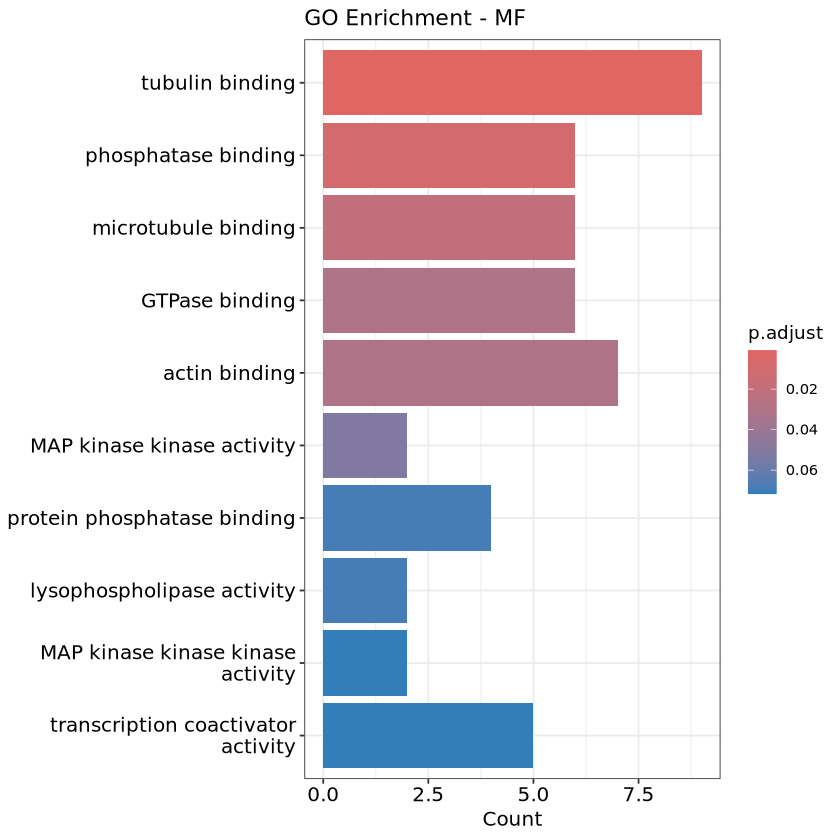

In [48]:
barplot(AD_AD1_Aging3_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [49]:
entrez_ids <- bitr(AD_AD1_Aging3, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns



In [50]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa05132 Human Diseases                       Infectious disease: bacterial  
hsa04140 Cellular Processes                   Transport and catabolism       
hsa05205 Human Diseases                       Cancer: overview               
hsa05212 Human Diseases                       Cancer: specific types         
hsa04912 Organismal Systems                   Endocrine system               
hsa05219 Human Diseases                       Cancer: specific types         
hsa04666 Organismal Systems                   Immune system                  
hsa04010 Environmental Information Processing Signal transduction            
hsa05213 Human Diseases                       Cancer: specific types         
hsa04370 Environmental Information Processing Signal transduction            
hsa04810 Cellular Processes                   Cell motility                  
hsa05211 Human Diseases                       Cancer: specific types         
hsa05230 Human Diseases                       Cancer: overview               
hsa05218 Human Diseases                       Cancer: specific types         
hsa05223 Human Diseases                       Cancer: specific types         
hsa05214 Human Diseases                       Cancer: specific types         
hsa01521 Human Diseases                       Drug resistance: antineoplastic
hsa05225 Human Diseases                       Cancer: specific types         
hsa04012 Environmental Information Processing Signal transduction            
hsa05210 Human Diseases                       Cancer: specific types         
         ID       Description                               GeneRatio BgRatio 
hsa05132 hsa05132 Salmonella infection                      7/35      251/9446
hsa04140 hsa04140 Autophagy - animal                        6/35      169/9446
hsa05205 hsa05205 Proteoglycans in cancer                   6/35      204/9446
hsa05212 hsa05212 Pancreatic cancer                         4/35      77/9446 
hsa04912 hsa04912 GnRH signaling pathway                    4/35      93/9446 
hsa05219 hsa05219 Bladder cancer                            3/35      41/9446 
hsa04666 hsa04666 Fc gamma R-mediated phagocytosis          4/35      99/9446 
hsa04010 hsa04010 MAPK signaling pathway                    6/35      300/9446
hsa05213 hsa05213 Endometrial cancer                        3/35      59/9446 
hsa04370 hsa04370 VEGF signaling pathway                    3/35      60/9446 
hsa04810 hsa04810 Regulation of actin cytoskeleton          5/35      232/9446
hsa05211 hsa05211 Renal cell carcinoma                      3/35      70/9446 
hsa05230 hsa05230 Central carbon metabolism in cancer       3/35      71/9446 
hsa05218 hsa05218 Melanoma                                  3/35      73/9446 
hsa05223 hsa05223 Non-small cell lung cancer                3/35      73/9446 
hsa05214 hsa05214 Glioma                                    3/35      76/9446 
hsa01521 hsa01521 EGFR tyrosine kinase inhibitor resistance 3/35      80/9446 
hsa05225 hsa05225 Hepatocellular carcinoma                  4/35      170/9446
hsa04012 hsa04012 ErbB signaling pathway                    3/35      86/9446 
hsa05210 hsa05210 Colorectal cancer                         3/35      87/9446 
         pvalue       p.adjust    qvalue     
hsa05132 3.060823e-05 0.002423184 0.001333710
hsa04140 3.167561e-05 0.002423184 0.001333710
hsa05205 9.070037e-05 0.004625719 0.002545975
hsa05212 1.764298e-04 0.006748439 0.003714311
hsa04912 3.649989e-04 0.010125059 0.005572788
hsa05219 4.511102e-04 0.010125059 0.005572788
hsa04666 4.632380e-04 0.010125059 0.005572788
hsa04010 7.279841e-04 0.013922696 0.007662991
hsa05213 1.314370e-03 0.021114751 0.011621466
hsa04370 1.380049e-03 0.021114751 0.011621466
hsa04810 1.522328e-03 0.021174203 0.011654188
hsa05211 2.152428e-03 0.024756614 0.013625932
hsa05230 2.241711e-03 0.024756614 0.013625932
hsa05218 2.427119e-03 0.024756614 0.013625932
hsa05223 2.427119e-03 

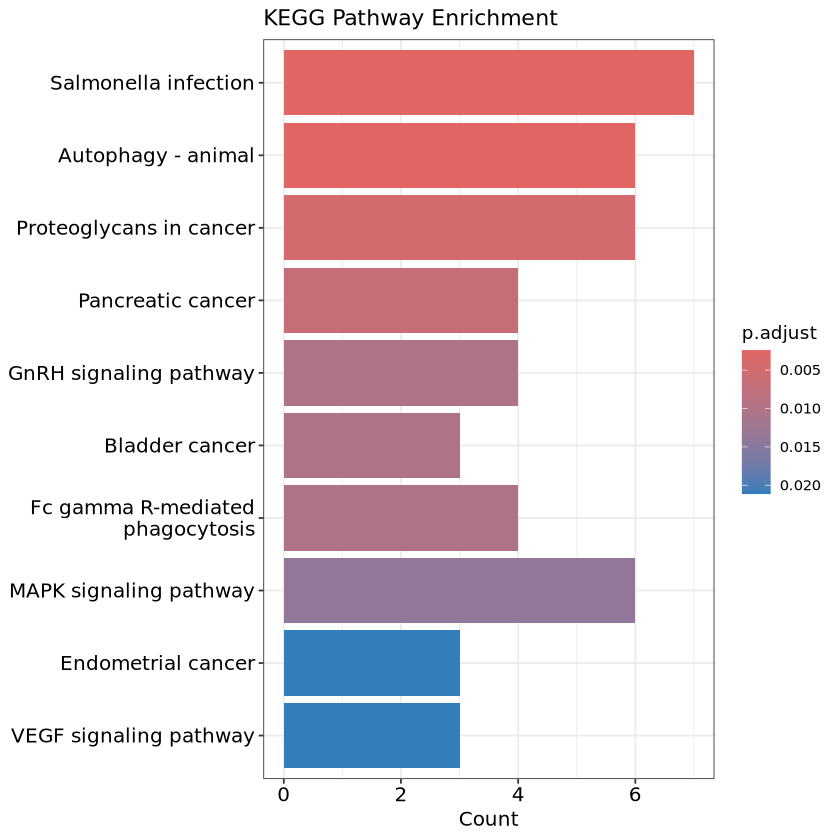

In [51]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### TL1_AD1_Aging3

In [73]:
TL1_AD1_Aging3_ego <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [74]:
head(TL1_AD1_Aging3_ego, n=35)

ID        
GO:0000381 GO:0000381
GO:0000380 GO:0000380
GO:0048024 GO:0048024
GO:0050684 GO:0050684
GO:0007052 GO:0007052
GO:0006751 GO:0006751
GO:1902850 GO:1902850
GO:0033504 GO:0033504
GO:1901748 GO:1901748
GO:0043484 GO:0043484
GO:0098693 GO:0098693
GO:1902855 GO:1902855
GO:1902883 GO:1902883
GO:0070417 GO:0070417
GO:1902287 GO:1902287
GO:0006750 GO:0006750
GO:0007008 GO:0007008
GO:0045040 GO:0045040
GO:0061430 GO:0061430
GO:1902285 GO:1902285
GO:0019184 GO:0019184
GO:0033689 GO:0033689
GO:0007051 GO:0007051
GO:1900117 GO:1900117
GO:1902018 GO:1902018
GO:2001014 GO:2001014
GO:1904862 GO:1904862
GO:0019370 GO:0019370
GO:0099515 GO:0099515
GO:0032211 GO:0032211
GO:0051457 GO:0051457
GO:0007097 GO:0007097
GO:0043931 GO:0043931
GO:1902042 GO:1902042
GO:1904357 GO:1904357
           Description                                                                            
GO:0000381 regulation of alternative mRNA splicing, via spliceosome                               
GO:0000380 alternative mRNA splicing, via spliceosome                                             
GO:0048024 regulation of mRNA splicing, via spliceosome                                           
GO:0050684 regulation of mRNA processing                                                          
GO:0007052 mitotic spindle organization                                                           
GO:0006751 glutathione catabolic process                                                          
GO:1902850 microtubule cytoskeleton organization involved in mitosis                              
GO:0033504 floor plate development                                                                
GO:1901748 leukotriene D4 metabolic process                                                       
GO:0043484 regulation of RNA splicing                                                             
GO:0098693 regulation of synaptic vesicle cycle                                                   
GO:1902855 regulation of non-motile cilium assembly                                               
GO:1902883 negative regulation of response to oxidative stress                                    
GO:0070417 cellular response to cold                                                              
GO:1902287 semaphorin-plexin signaling pathway involved in axon guidance                          
GO:0006750 glutathione biosynthetic process                                                       
GO:0007008 outer mitochondrial membrane organization                                              
GO:0045040 protein insertion into mitochondrial outer membrane                                    
GO:0061430 bone trabecula morphogenesis                                                           
GO:1902285 semaphorin-plexin signaling pathway involved in neuron projection guidance             
GO:0019184 nonribosomal peptide biosynthetic process                                              
GO:0033689 negative regulation of osteoblast proliferation                                        
GO:0007051 spindle organization                                                                   
GO:1900117 regulation of execution phase of apoptosis                                             
GO:1902018 negative regulation of cilium assembly                                                 
GO:2001014 regulation of skeletal muscle cell differentiation                                     
GO:1904862 inhibitory synapse assembly                                                            
GO:0019370 leukotriene biosynthetic process                                                       
GO:0099515 actin filament-based transport                                                         
GO:0032211 negative regulation of telomere maintenance via telomerase                             
GO:0051457 maintenance of protein location in nucleus                                             
GO:0007097 nuclear migration                       

In [75]:
TL1_AD1_Aging3_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                              GeneRatio
GO:0098693 GO:0098693 regulation of synaptic vesicle cycle     1/16     
GO:1902855 GO:1902855 regulation of non-motile cilium assembly 1/16     
GO:1902018 GO:1902018 negative regulation of cilium assembly   1/16     
GO:0060271 GO:0060271 cilium assembly                          2/16     
GO:0044782 GO:0044782 cilium organization                      2/16     
GO:1905515 GO:1905515 non-motile cilium assembly               1/16     
GO:1902017 GO:1902017 regulation of cilium assembly            1/16     
GO:0016079 GO:0016079 synaptic vesicle exocytosis              1/16     
GO:0099504 GO:0099504 synaptic vesicle cycle                   1/16     
GO:0099003 GO:0099003 vesicle-mediated transport in synapse    1/16     
           BgRatio   pvalue      p.adjust  qvalue    
GO:0098693 13/21261  0.009741856 0.1431377 0.09990156
GO:1902855 13/21261  0.009741856 0.1431377 0.09990156
GO:1902018 19/21261  0.014208024 0.1431377 0.09990156
GO:0060271 396/21261 0.034954181 0.1431377 0.09990156
GO:0044782 425/21261 0.039763144 0.1431377 0.09990156
GO:1905515 70/21261  0.051415284 0.1478325 0.10317827
GO:1902017 75/21261  0.054991302 0.1478325 0.10317827
GO:0016079 98/21261  0.071278809 0.1639413 0.11442125
GO:0099504 216/21261 0.150782939 0.2241568 0.15644813
GO:0099003 241/21261 0.166786554 0.2296658 0.16029308
           geneID                          Count
GO:0098693 ENSG00000101152                 1    
GO:1902855 ENSG00000047849                 1    
GO:1902018 ENSG00000047849                 1    
GO:0060271 ENSG00000100211/ENSG00000047849 2    
GO:0044782 ENSG00000100211/ENSG00000047849 2    
GO:1905515 ENSG00000047849                 1    
GO:1902017 ENSG00000047849                 1    
GO:0016079 ENSG00000101152                 1    
GO:0099504 ENSG00000101152                 1    
GO:0099003 ENSG00000101152                 1

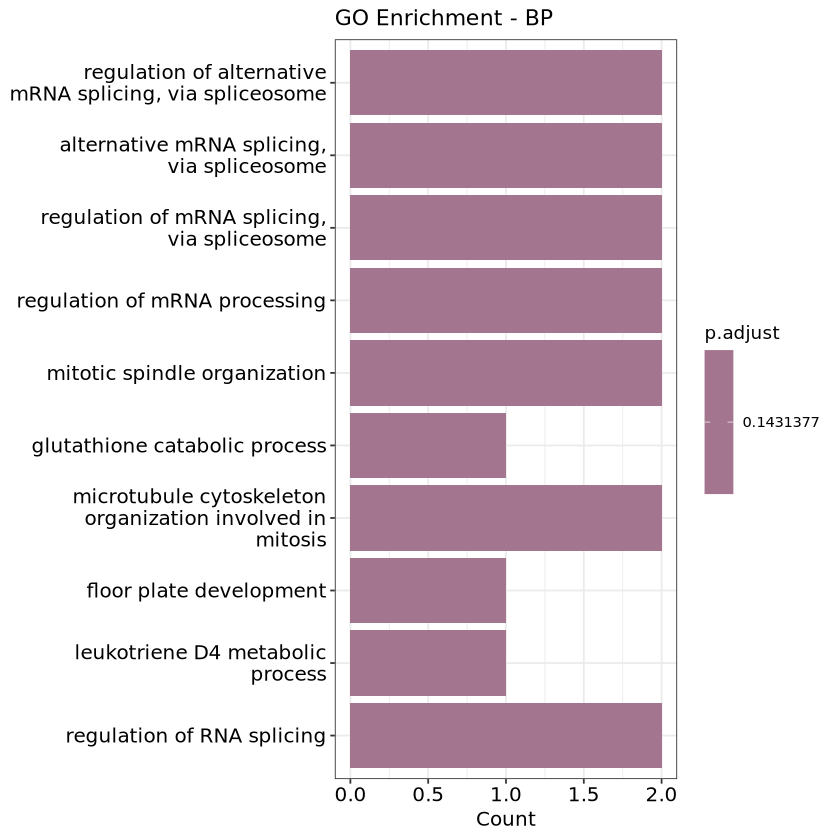

In [76]:
barplot(TL1_AD1_Aging3_ego, showCategory = 10, title = "GO Enrichment - BP")

In [77]:
TL1_AD1_Aging3_ego_cc <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [78]:
head(TL1_AD1_Aging3_ego_cc, n=20)

ID         Description                                           
GO:0000781 GO:0000781 chromosome, telomeric region                          
GO:0035097 GO:0035097 histone methyltransferase complex                     
GO:0034708 GO:0034708 methyltransferase complex                             
GO:0098687 GO:0098687 chromosomal region                                    
GO:0016607 GO:0016607 nuclear speck                                         
GO:0002116 GO:0002116 semaphorin receptor complex                           
GO:0034992 GO:0034992 microtubule organizing center attachment site         
GO:0034993 GO:0034993 meiotic nuclear membrane microtubule tethering complex
GO:0106083 GO:0106083 nuclear membrane protein complex                      
GO:0106094 GO:0106094 nuclear membrane microtubule tethering complex        
GO:0044666 GO:0044666 MLL3/4 complex                                        
GO:0060198 GO:0060198 clathrin-sculpted vesicle                             
GO:0000782 GO:0000782 telomere cap complex                                  
GO:0000783 GO:0000783 nuclear telomere cap complex                          
GO:0042583 GO:0042583 chromaffin granule                                    
GO:0140445 GO:0140445 chromosome, telomeric repeat region                   
GO:0010369 GO:0010369 chromocenter                                          
GO:0005742 GO:0005742 mitochondrial outer membrane translocase complex      
GO:0098799 GO:0098799 outer mitochondrial membrane protein complex          
GO:0000793 GO:0000793 condensed chromosome                                  
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0000781 3/17      199/22568 0.0004192163 0.02934514 0.02074017
GO:0035097 2/17      77/22568  0.0015116491 0.04592627 0.03245917
GO:0034708 2/17      110/22568 0.0030522953 0.04592627 0.03245917
GO:0098687 3/17      444/22568 0.0041887723 0.04592627 0.03245917
GO:0016607 3/17      500/22568 0.0058323377 0.04592627 0.03245917
GO:0002116 1/17      11/22568  0.0082567532 0.04592627 0.03245917
GO:0034992 1/17      11/22568  0.0082567532 0.04592627 0.03245917
GO:0034993 1/17      11/22568  0.0082567532 0.04592627 0.03245917
GO:0106083 1/17      11/22568  0.0082567532 0.04592627 0.03245917
GO:0106094 1/17      11/22568  0.0082567532 0.04592627 0.03245917
GO:0044666 1/17      12/22568  0.0090041768 0.04592627 0.03245917
GO:0060198 1/17      12/22568  0.0090041768 0.04592627 0.03245917
GO:0000782 1/17      13/22568  0.0097510703 0.04592627 0.03245917
GO:0000783 1/17      13/22568  0.0097510703 0.04592627 0.03245917
GO:0042583 1/17      14/22568  0.0104974339 0.04592627 0.03245917
GO:0140445 1/17      14/22568  0.0104974339 0.04592627 0.03245917
GO:0010369 1/17      15/22568  0.0112432681 0.04629581 0.03272035
GO:0005742 1/17      22/22568  0.0164493114 0.06333498 0.04476307
GO:0098799 1/17      23/22568  0.0171909224 0.06333498 0.04476307
GO:0000793 2/17      296/22568 0.0204778632 0.07167252 0.05065577
           geneID                                          Count
GO:0000781 ENSG00000100242/ENSG00000107960/ENSG00000094916 3    
GO:0035097 ENSG00000198646/ENSG00000094916                 2    
GO:0034708 ENSG00000198646/ENSG00000094916                 2    
GO:0098687 ENSG00000100242/ENSG00000107960/ENSG00000094916 3    
GO:0016607 ENSG00000100201/ENSG00000100211/ENSG00000170633 3    
GO:0002116 ENSG00000164050                                 1    
GO:0034992 ENSG00000100242                                 1    
GO:0034993 ENSG00000100242                                 1    
GO:0106083 ENSG00000100242                                 1    
GO:0106094 ENSG00000100242                                 1    
GO:0044666 ENSG00000198646                                 1    
GO:0060198 ENSG00000101152                                 1    
GO:0000782 ENSG00000107960                                 1    
GO:0000783 ENSG00000107960                                 1    
GO:0042583 ENSG00000101152       

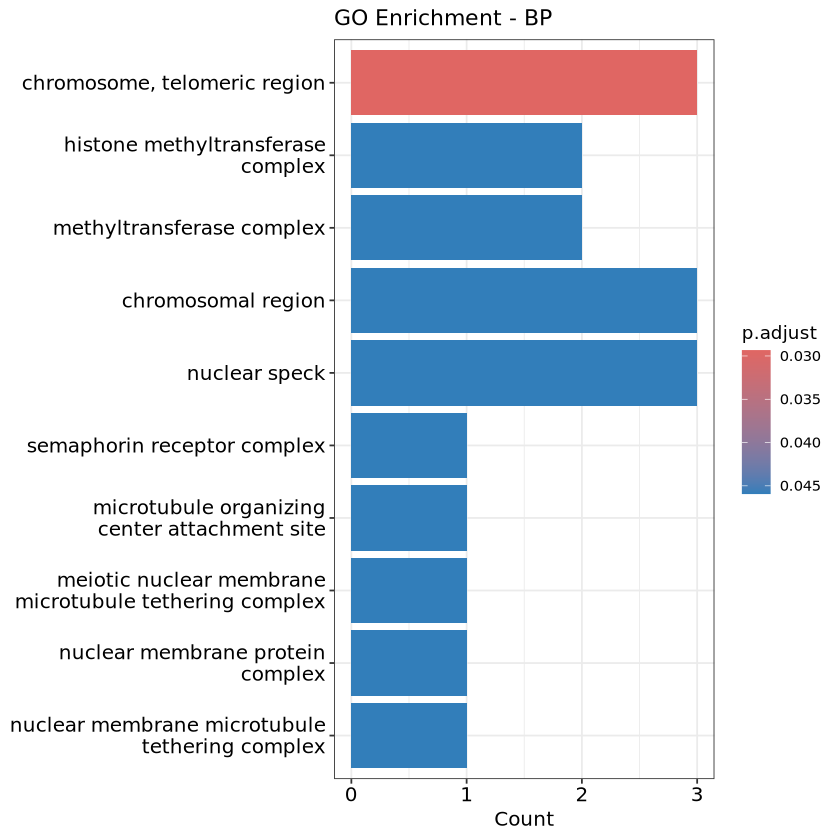

In [79]:
barplot(TL1_AD1_Aging3_ego_cc, showCategory = 10, title = "GO Enrichment - BP")

In [80]:
TL1_AD1_Aging3_ego_mf <- enrichGO(
  gene          = TL1_AD1_Aging3,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [81]:
head(TL1_AD1_Aging3_ego_mf, n=10)

ID         Description                                   GeneRatio
GO:0017154 GO:0017154 semaphorin receptor activity                  1/17     
GO:0043047 GO:0043047 single-stranded telomeric DNA binding         1/17     
GO:0043008 GO:0043008 ATP-dependent protein binding                 1/17     
GO:0043021 GO:0043021 ribonucleoprotein complex binding             2/17     
GO:0098847 GO:0098847 sequence-specific single stranded DNA binding 1/17     
GO:0005521 GO:0005521 lamin binding                                 1/17     
GO:0008242 GO:0008242 omega peptidase activity                      1/17     
GO:0046965 GO:0046965 nuclear retinoid X receptor binding           1/17     
GO:0032794 GO:0032794 GTPase activating protein binding             1/17     
GO:0030215 GO:0030215 semaphorin receptor binding                   1/17     
           BgRatio   pvalue      p.adjust   qvalue    
GO:0017154 12/21059  0.009646684 0.08265926 0.04685141
GO:0043047 12/21059  0.009646684 0.08265926 0.04685141
GO:0043008 13/21059  0.010446608 0.08265926 0.04685141
GO:0043021 201/21059 0.011219083 0.08265926 0.04685141
GO:0098847 15/21059  0.012044633 0.08265926 0.04685141
GO:0005521 16/21059  0.012842734 0.08265926 0.04685141
GO:0008242 17/21059  0.013640228 0.08265926 0.04685141
GO:0046965 17/21059  0.013640228 0.08265926 0.04685141
GO:0032794 19/21059  0.015233398 0.08265926 0.04685141
GO:0030215 24/21059  0.019205734 0.08265926 0.04685141
           geneID                          Count
GO:0017154 ENSG00000164050                 1    
GO:0043047 ENSG00000107960                 1    
GO:0043008 ENSG00000101152                 1    
GO:0043021 ENSG00000100201/ENSG00000094916 2    
GO:0098847 ENSG00000107960                 1    
GO:0005521 ENSG00000100242                 1    
GO:0008242 ENSG00000131067                 1    
GO:0046965 ENSG00000198646                 1    
GO:0032794 ENSG00000164050                 1    
GO:0030215 ENSG00000164050                 1

In [82]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

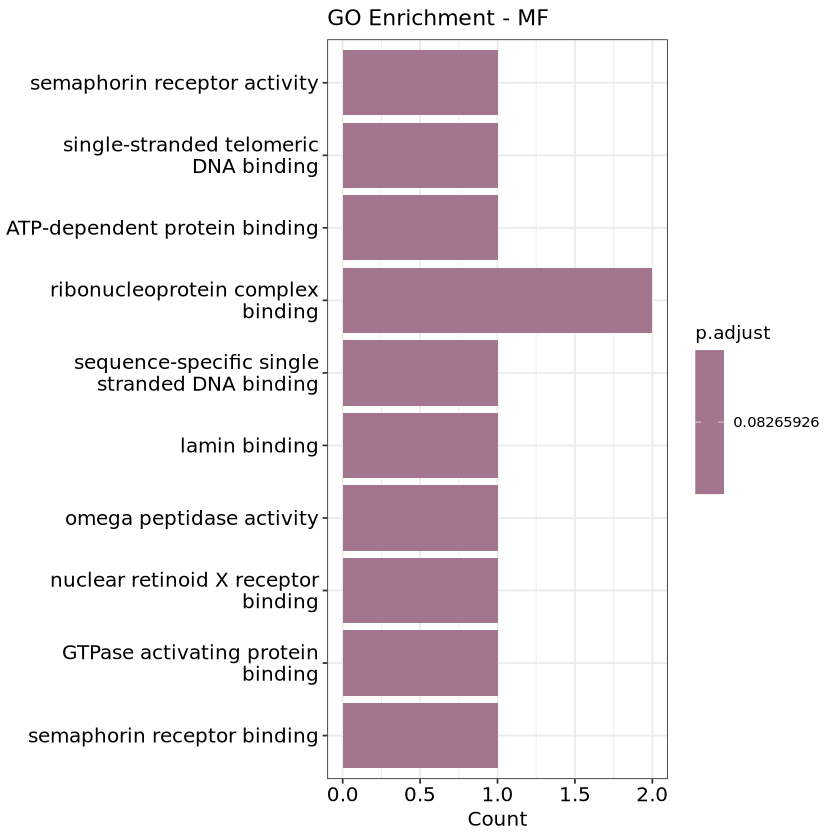

In [83]:
barplot(TL1_AD1_Aging3_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [84]:
entrez_ids <- bitr(TL1_AD1_Aging3, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [85]:
kegg_enrich %>% head(n=20)

category                             subcategory                     
hsa00430 Metabolism                           Metabolism of other amino acids 
hsa00480 Metabolism                           Metabolism of other amino acids 
hsa04137 Cellular Processes                   Transport and catabolism        
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa04310 Environmental Information Processing Signal transduction             
hsa04360 Organismal Systems                   Development and regeneration    
hsa04820 NA                                   NA                              
         ID       Description                                 GeneRatio
hsa00430 hsa00430 Taurine and hypotaurine metabolism          1/6      
hsa00480 hsa00480 Glutathione metabolism                      1/6      
hsa04137 hsa04137 Mitophagy - animal                          1/6      
hsa04141 hsa04141 Protein processing in endoplasmic reticulum 1/6      
hsa04310 hsa04310 Wnt signaling pathway                       1/6      
hsa04360 hsa04360 Axon guidance                               1/6      
hsa04820 hsa04820 Cytoskeleton in muscle cells                1/6      
         BgRatio  pvalue     p.adjust   qvalue     geneID Count
hsa00430 17/9446  0.01075259 0.07526811 0.05659256 2686   1    
hsa00480 59/9446  0.03690545 0.12916909 0.09711962 2686   1    
hsa04137 105/9446 0.06488542 0.12991654 0.09768161 84315  1    
hsa04141 172/9446 0.10442470 0.12991654 0.09768161 80331  1    
hsa04310 174/9446 0.10558321 0.12991654 0.09768161 25776  1    
hsa04360 184/9446 0.11135704 0.12991654 0.09768161 5364   1    
hsa04820 233/9446 0.13920184 0.13920184 0.10466304 25777  1

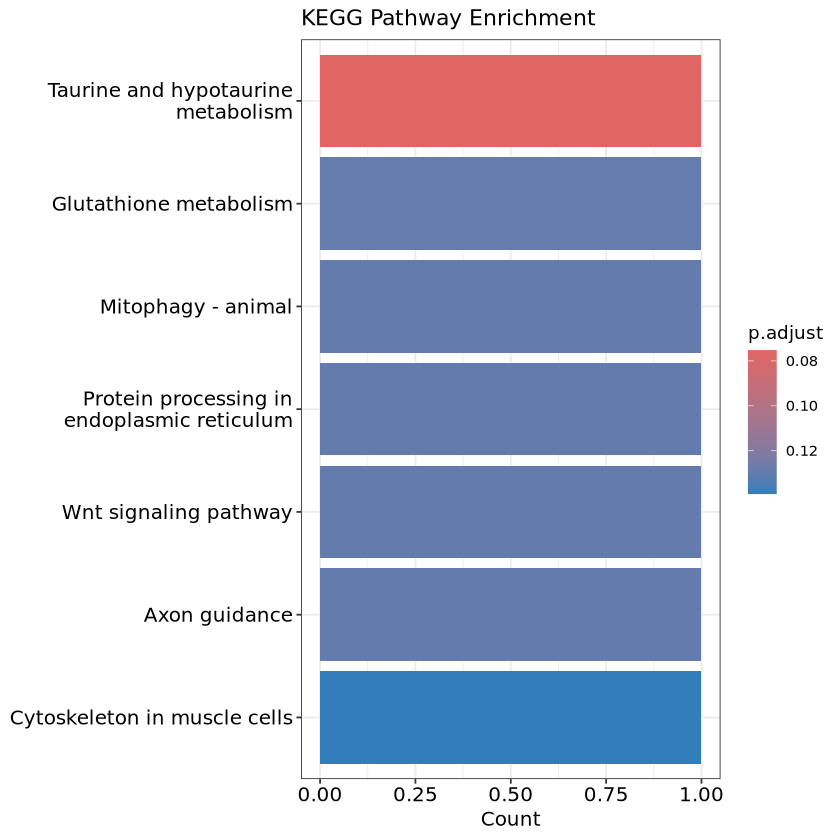

In [86]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### TL1_AD1_AD2

In [80]:
TL1_AD1_AD2_ego <- enrichGO(
  gene          = TL1_AD1_AD2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [81]:
head(TL1_AD1_AD2_ego, n=5)

ID        
GO:0061644 GO:0061644
GO:2000427 GO:2000427
GO:2000425 GO:2000425
GO:1902042 GO:1902042
GO:0007098 GO:0007098
           Description                                                                            
GO:0061644 protein localization to CENP-A containing chromatin                                    
GO:2000427 positive regulation of apoptotic cell clearance                                        
GO:2000425 regulation of apoptotic cell clearance                                                 
GO:1902042 negative regulation of extrinsic apoptotic signaling pathway via death domain receptors
GO:0007098 centrosome cycle                                                                       
           GeneRatio BgRatio   pvalue       p.adjust  qvalue    
GO:0061644 2/30      18/21261  0.0002903776 0.0890795 0.07229690
GO:2000427 2/30      21/21261  0.0003975099 0.0890795 0.07229690
GO:2000425 2/30      23/21261  0.0004780653 0.0890795 0.07229690
GO:1902042 2/30      31/21261  0.0008725157 0.1118045 0.09074053
GO:0007098 3/30      148/21261 0.0011691486 0.1118045 0.09074053
           geneID                                          Count
GO:0061644 ENSG00000278463/ENSG00000275126                 2    
GO:2000427 ENSG00000244731/ENSG00000224389                 2    
GO:2000425 ENSG00000244731/ENSG00000224389                 2    
GO:1902042 ENSG00000170633/ENSG00000012048                 2    
GO:0007098 ENSG00000175216/ENSG00000012048/ENSG00000126001 3

In [82]:
TL1_AD1_AD2_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                              GeneRatio
GO:1905515 GO:1905515 non-motile cilium assembly               2/30     
GO:1902855 GO:1902855 regulation of non-motile cilium assembly 1/30     
GO:1902018 GO:1902018 negative regulation of cilium assembly   1/30     
GO:1902017 GO:1902017 regulation of cilium assembly            1/30     
GO:0060271 GO:0060271 cilium assembly                          2/30     
GO:0044782 GO:0044782 cilium organization                      2/30     
           BgRatio   pvalue      p.adjust  qvalue   
GO:1905515 70/21261  0.004379381 0.1530046 0.1241785
GO:1902855 13/21261  0.018194039 0.2050578 0.1664249
GO:1902018 19/21261  0.026482965 0.2050578 0.1664249
GO:1902017 75/21261  0.100653748 0.2296549 0.1863878
GO:0060271 396/21261 0.107068595 0.2356352 0.1912415
GO:0044782 425/21261 0.120345588 0.2500862 0.2029699
           geneID                          Count
GO:1905515 ENSG00000047849/ENSG00000126001 2    
GO:1902855 ENSG00000047849                 1    
GO:1902018 ENSG00000047849                 1    
GO:1902017 ENSG00000047849                 1    
GO:0060271 ENSG00000047849/ENSG00000126001 2    
GO:0044782 ENSG00000047849/ENSG00000126001 2

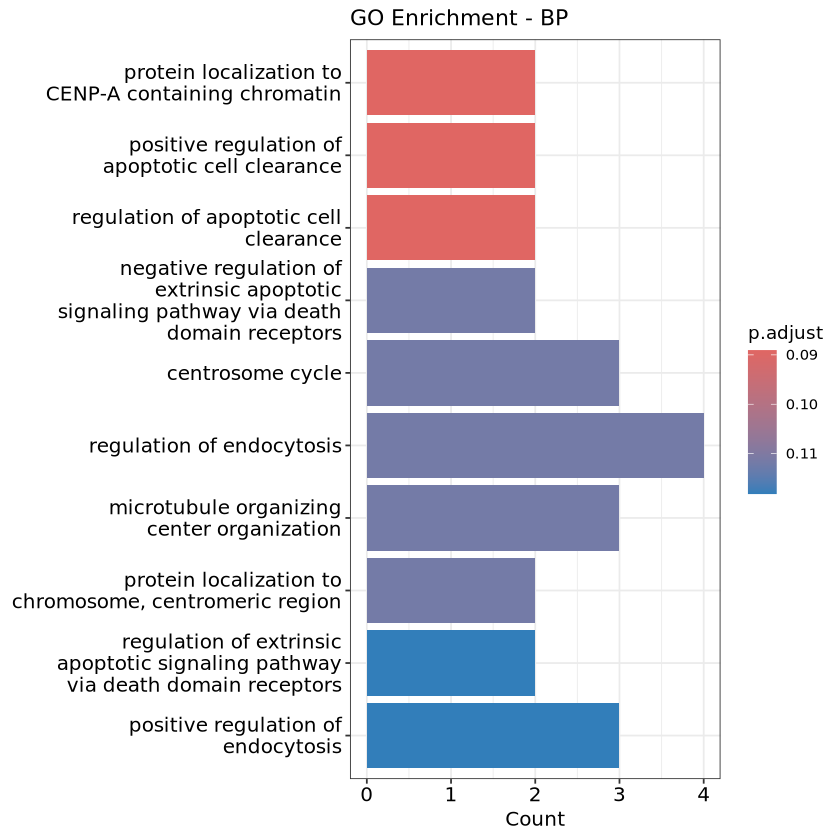

In [83]:
barplot(TL1_AD1_AD2_ego, showCategory = 10, title = "GO Enrichment - BP")

In [84]:
TL1_AD1_AD2_ego_cc <- enrichGO(
  gene          = TL1_AD1_AD2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [85]:
head(TL1_AD1_AD2_ego_cc, n=5)

ID         Description                         GeneRatio BgRatio  
GO:0043505 GO:0043505 CENP-A containing nucleosome        2/31      18/22568 
GO:0061638 GO:0061638 CENP-A containing chromatin         2/31      18/22568 
GO:0098687 GO:0098687 chromosomal region                  5/31      444/22568
GO:0034506 GO:0034506 chromosome, centromeric core domain 2/31      20/22568 
GO:0000775 GO:0000775 chromosome, centromeric region      4/31      277/22568
           pvalue       p.adjust    qvalue     
GO:0043505 0.0002755846 0.008370273 0.006203532
GO:0061638 0.0002755846 0.008370273 0.006203532
GO:0098687 0.0003210001 0.008370273 0.006203532
GO:0034506 0.0003416438 0.008370273 0.006203532
GO:0000775 0.0005382159 0.010549032 0.007818294
           geneID                                                                         
GO:0043505 ENSG00000278463/ENSG00000275126                                                
GO:0061638 ENSG00000278463/ENSG00000275126                                                
GO:0098687 ENSG00000107960/ENSG00000094916/ENSG00000278463/ENSG00000275126/ENSG00000175216
GO:0034506 ENSG00000278463/ENSG00000275126                                                
GO:0000775 ENSG00000094916/ENSG00000278463/ENSG00000275126/ENSG00000175216                
           Count
GO:0043505 2    
GO:0061638 2    
GO:0098687 5    
GO:0034506 2    
GO:0000775 4

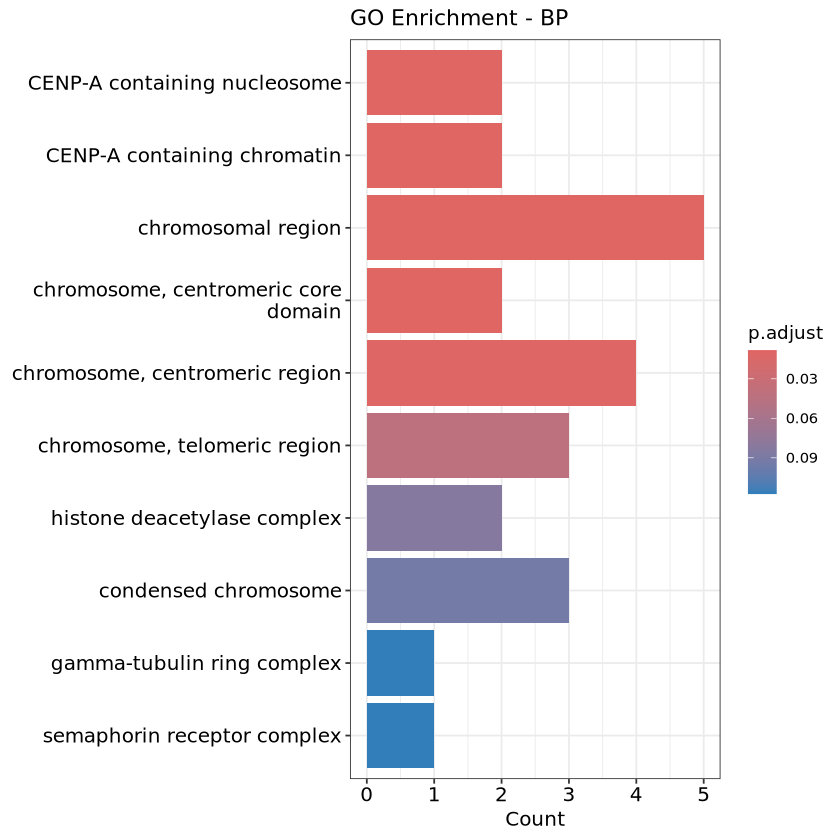

In [86]:
barplot(TL1_AD1_AD2_ego_cc, showCategory = 10, title = "GO Enrichment - BP")

In [87]:
TL1_AD1_AD2_ego_mf <- enrichGO(
  gene          = TL1_AD1_AD2,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [88]:
head(TL1_AD1_AD2_ego_mf, n=10)

ID         Description                              GeneRatio
GO:0001848 GO:0001848 complement binding                       2/31     
GO:0002039 GO:0002039 p53 binding                              2/31     
GO:0030527 GO:0030527 structural constituent of chromatin      2/31     
GO:0001849 GO:0001849 complement component C1q complex binding 1/31     
GO:0019203 GO:0019203 carbohydrate phosphatase activity        1/31     
GO:0019855 GO:0019855 calcium channel inhibitor activity       1/31     
GO:0050308 GO:0050308 sugar-phosphatase activity               1/31     
GO:0017154 GO:0017154 semaphorin receptor activity             1/31     
GO:0043047 GO:0043047 single-stranded telomeric DNA binding    1/31     
GO:0042826 GO:0042826 histone deacetylase binding              2/31     
           BgRatio   pvalue      p.adjust  qvalue    
GO:0001848 41/21059  0.001659233 0.1159312 0.08080552
GO:0002039 80/21059  0.006170139 0.1159312 0.08080552
GO:0030527 101/21059 0.009673452 0.1159312 0.08080552
GO:0001849 11/21059  0.016077734 0.1159312 0.08080552
GO:0019203 11/21059  0.016077734 0.1159312 0.08080552
GO:0019855 11/21059  0.016077734 0.1159312 0.08080552
GO:0050308 11/21059  0.016077734 0.1159312 0.08080552
GO:0017154 12/21059  0.017526879 0.1159312 0.08080552
GO:0043047 12/21059  0.017526879 0.1159312 0.08080552
GO:0042826 142/21059 0.018474399 0.1159312 0.08080552
           geneID                          Count
GO:0001848 ENSG00000244731/ENSG00000224389 2    
GO:0002039 ENSG00000170633/ENSG00000012048 2    
GO:0030527 ENSG00000278463/ENSG00000275126 2    
GO:0001849 ENSG00000244731                 1    
GO:0019203 ENSG00000141349                 1    
GO:0019855 ENSG00000165912                 1    
GO:0050308 ENSG00000141349                 1    
GO:0017154 ENSG00000164050                 1    
GO:0043047 ENSG00000107960                 1    
GO:0042826 ENSG00000094916/ENSG00000108840 2

In [89]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

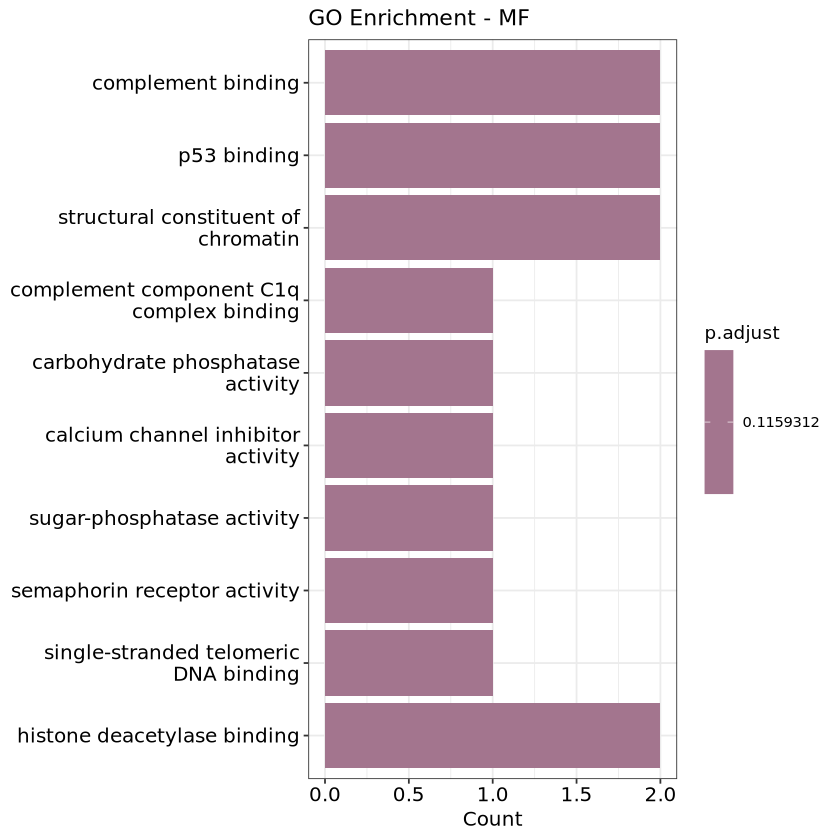

In [90]:
barplot(TL1_AD1_AD2_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [91]:
entrez_ids <- bitr(TL1_AD1_AD2, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(TL1_AD1_AD2, fromType = "ENSEMBL", toType = "ENTREZID", :
“3.03% of input gene IDs are fail to map...”


In [94]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa05322 Human Diseases                       Immune disease                 
hsa05034 Human Diseases                       Substance dependence           
hsa05133 Human Diseases                       Infectious disease: bacterial  
hsa04610 Organismal Systems                   Immune system                  
hsa05150 Human Diseases                       Infectious disease: bacterial  
hsa04936 Human Diseases                       Endocrine and metabolic disease
hsa04613 Organismal Systems                   Immune system                  
hsa05203 Human Diseases                       Cancer: overview               
hsa05171 Human Diseases                       Infectious disease: viral      
hsa04151 Environmental Information Processing Signal transduction            
hsa04910 Organismal Systems                   Endocrine system               
hsa00052 Metabolism                           Carbohydrate metabolism        
hsa00500 Metabolism                           Carbohydrate metabolism        
hsa03440 Genetic Information Processing       Replication and repair         
hsa05030 Human Diseases                       Substance dependence           
hsa04973 Organismal Systems                   Digestive system               
hsa05206 Human Diseases                       Cancer: overview               
hsa03460 Genetic Information Processing       Replication and repair         
hsa04927 Organismal Systems                   Endocrine system               
hsa00970 Genetic Information Processing       Translation                    
         ID       Description                             GeneRatio BgRatio 
hsa05322 hsa05322 Systemic lupus erythematosus            5/13      144/9446
hsa05034 hsa05034 Alcoholism                              4/13      191/9446
hsa05133 hsa05133 Pertussis                               3/13      78/9446 
hsa04610 hsa04610 Complement and coagulation cascades     3/13      88/9446 
hsa05150 hsa05150 Staphylococcus aureus infection         3/13      102/9446
hsa04936 hsa04936 Alcoholic liver disease                 3/13      144/9446
hsa04613 hsa04613 Neutrophil extracellular trap formation 3/13      196/9446
hsa05203 hsa05203 Viral carcinogenesis                    3/13      205/9446
hsa05171 hsa05171 Coronavirus disease - COVID-19          3/13      238/9446
hsa04151 hsa04151 PI3K-Akt signaling pathway              3/13      362/9446
hsa04910 hsa04910 Insulin signaling pathway               2/13      138/9446
hsa00052 hsa00052 Galactose metabolism                    1/13      32/9446 
hsa00500 hsa00500 Starch and sucrose metabolism           1/13      40/9446 
hsa03440 hsa03440 Homologous recombination                1/13      41/9446 
hsa05030 hsa05030 Cocaine addiction                       1/13      49/9446 
hsa04973 hsa04973 Carbohydrate digestion and absorption   1/13      52/9446 
hsa05206 hsa05206 MicroRNAs in cancer                     2/13      320/9446
hsa03460 hsa03460 Fanconi anemia pathway                  1/13      55/9446 
hsa04927 hsa04927 Cortisol synthesis and secretion        1/13      65/9446 
hsa00970 hsa00970 Aminoacyl-tRNA biosynthesis             1/13      66/9446 
         pvalue       p.adjust     qvalue       geneID                     
hsa05322 8.959459e-07 4.838108e-05 3.961024e-05 720/110384692/8335/8368/721
hsa05034 1.003969e-04 2.627370e-03 2.151063e-03 1388/8335/8368/10014       
hsa05133 1.459650e-04 2.627370e-03 2.151063e-03 720/110384692/721          
hsa04610 2.088772e-04 2.819842e-03 2.308643e-03 720/110384692/721          
hsa05150 3.231971e-04 3.490529e-03 2.857743e-03 720/110384692/721          
hsa04936 8.871289e-04 7.984160e-03 6.536739e-03 720/110384692/721          
hsa04613 2.158034e-03 1.655868e-02 1.355681e-02 8335/8368/10014            
hsa05203 2.453137e-03 1.655868e-02 1.355681e-02 1388/8368/10014            
hsa05171 3.746431e-03 2.247859e-02 1.840352e-02 720/110384692/721     

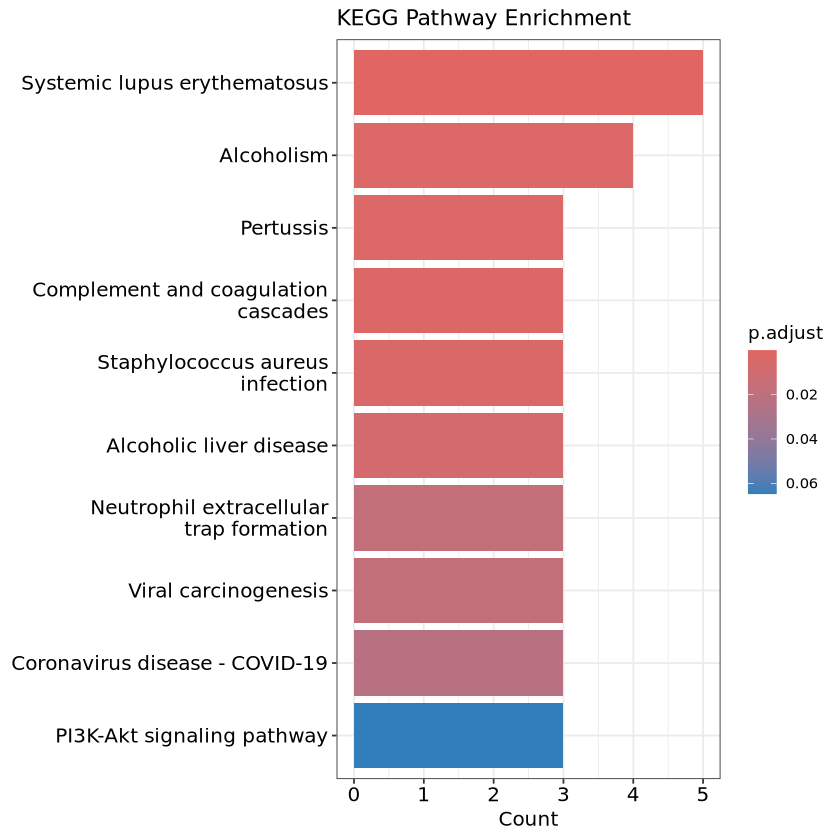

In [93]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

### TL1_AD1 list

In [60]:
TL1_AD1_ego <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [61]:
head(TL1_AD1_ego, n=5)

ID        
GO:1902855 GO:1902855
GO:0070417 GO:0070417
GO:1902287 GO:1902287
GO:0061430 GO:0061430
GO:1902285 GO:1902285
           Description                                                               
GO:1902855 regulation of non-motile cilium assembly                                  
GO:0070417 cellular response to cold                                                 
GO:1902287 semaphorin-plexin signaling pathway involved in axon guidance             
GO:0061430 bone trabecula morphogenesis                                              
GO:1902285 semaphorin-plexin signaling pathway involved in neuron projection guidance
           GeneRatio BgRatio  pvalue      p.adjust   qvalue     geneID         
GO:1902855 1/7       13/21261 0.004272896 0.07314734 0.03963091 ENSG00000047849
GO:0070417 1/7       14/21261 0.004600931 0.07314734 0.03963091 ENSG00000170633
GO:1902287 1/7       14/21261 0.004600931 0.07314734 0.03963091 ENSG00000164050
GO:0061430 1/7       16/21261 0.005256723 0.07314734 0.03963091 ENSG00000164050
GO:1902285 1/7       16/21261 0.005256723 0.07314734 0.03963091 ENSG00000164050
           Count
GO:1902855 1    
GO:0070417 1    
GO:1902287 1    
GO:0061430 1    
GO:1902285 1

In [62]:
TL1_AD1_ego %>% as.data.frame |> filter(str_detect(Description, "cilium|vesicle"))

ID         Description                              GeneRatio
GO:1902855 GO:1902855 regulation of non-motile cilium assembly 1/7      
GO:1902018 GO:1902018 negative regulation of cilium assembly   1/7      
GO:1905515 GO:1905515 non-motile cilium assembly               1/7      
GO:1902017 GO:1902017 regulation of cilium assembly            1/7      
GO:0060271 GO:0060271 cilium assembly                          1/7      
GO:0044782 GO:0044782 cilium organization                      1/7      
           BgRatio   pvalue      p.adjust   qvalue     geneID          Count
GO:1902855 13/21261  0.004272896 0.07314734 0.03963091 ENSG00000047849 1    
GO:1902018 19/21261  0.006239717 0.07314734 0.03963091 ENSG00000047849 1    
GO:1905515 70/21261  0.022823688 0.07760054 0.04204364 ENSG00000047849 1    
GO:1902017 75/21261  0.024436722 0.07816478 0.04234934 ENSG00000047849 1    
GO:0060271 396/21261 0.123332780 0.13748572 0.07448917 ENSG00000047849 1    
GO:0044782 425/21261 0.131827795 0.14068674 0.07622347 ENSG00000047849 1

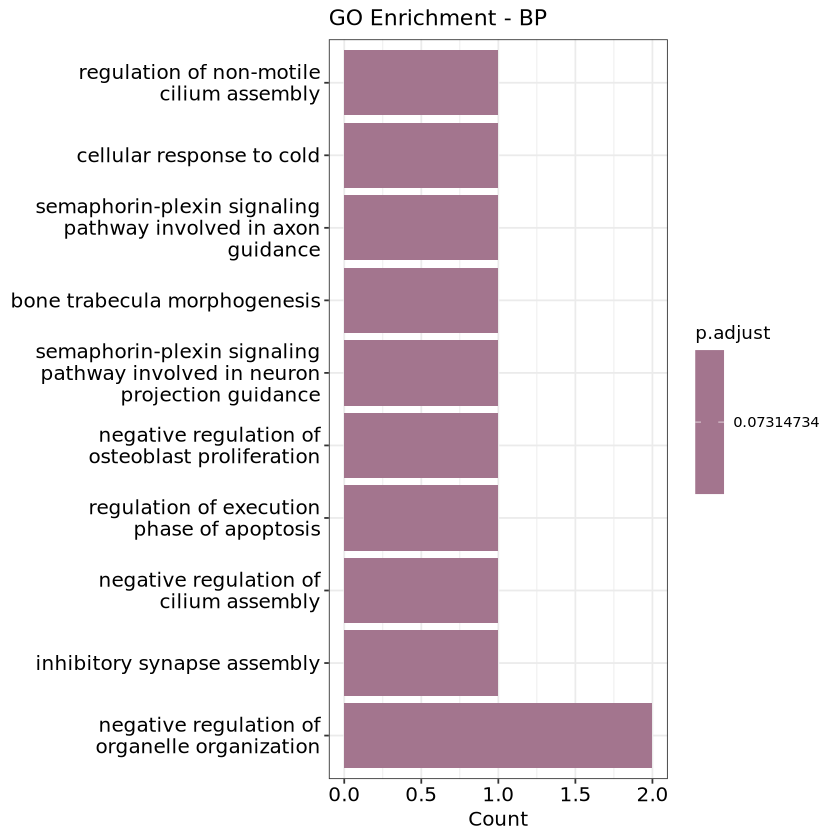

In [63]:
barplot(TL1_AD1_ego, showCategory = 10, title = "GO Enrichment - BP")

In [64]:
TL1_AD1_ego_cc <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [65]:
head(TL1_AD1_ego_cc, n=5)

ID         Description                         GeneRatio BgRatio  
GO:0000781 GO:0000781 chromosome, telomeric region        2/8       199/22568
GO:0002116 GO:0002116 semaphorin receptor complex         1/8       11/22568 
GO:0000782 GO:0000782 telomere cap complex                1/8       13/22568 
GO:0000783 GO:0000783 nuclear telomere cap complex        1/8       13/22568 
GO:0140445 GO:0140445 chromosome, telomeric repeat region 1/8       14/22568 
           pvalue      p.adjust   qvalue     geneID                         
GO:0000781 0.002091830 0.02741294 0.01489328 ENSG00000107960/ENSG00000094916
GO:0002116 0.003893284 0.02741294 0.01489328 ENSG00000164050                
GO:0000782 0.004599727 0.02741294 0.01489328 ENSG00000107960                
GO:0000783 0.004599727 0.02741294 0.01489328 ENSG00000107960                
GO:0140445 0.004952784 0.02741294 0.01489328 ENSG00000107960                
           Count
GO:0000781 2    
GO:0002116 1    
GO:0000782 1    
GO:0000783 1    
GO:0140445 1

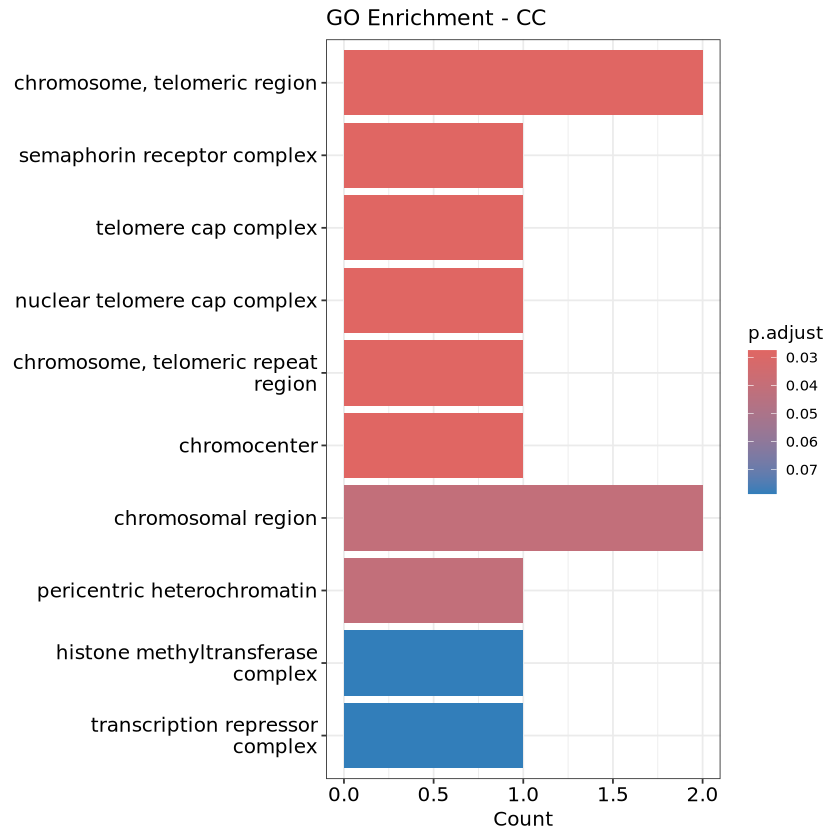

In [66]:
barplot(TL1_AD1_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [67]:
TL1_AD1_ego_mf <- enrichGO(
  gene          = TL1_AD1,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [68]:
head(TL1_AD1_ego_mf, n=10)

ID         Description                                   GeneRatio
GO:0017154 GO:0017154 semaphorin receptor activity                  1/8      
GO:0043047 GO:0043047 single-stranded telomeric DNA binding         1/8      
GO:0098847 GO:0098847 sequence-specific single stranded DNA binding 1/8      
GO:0032794 GO:0032794 GTPase activating protein binding             1/8      
GO:0030215 GO:0030215 semaphorin receptor binding                   1/8      
GO:0042162 GO:0042162 telomeric DNA binding                         1/8      
GO:0002039 GO:0002039 p53 binding                                   1/8      
GO:0035064 GO:0035064 methylated histone binding                    1/8      
GO:0140034 GO:0140034 methylation-dependent protein binding         1/8      
GO:0003697 GO:0003697 single-stranded DNA binding                   1/8      
           BgRatio   pvalue      p.adjust   qvalue     geneID          Count
GO:0017154 12/21059  0.004550294 0.04497661 0.02840628 ENSG00000164050 1    
GO:0043047 12/21059  0.004550294 0.04497661 0.02840628 ENSG00000107960 1    
GO:0098847 15/21059  0.005685033 0.04497661 0.02840628 ENSG00000107960 1    
GO:0032794 19/21059  0.007196258 0.04497661 0.02840628 ENSG00000164050 1    
GO:0030215 24/21059  0.009082462 0.04541231 0.02868146 ENSG00000164050 1    
GO:0042162 40/21059  0.015097260 0.06290525 0.03972963 ENSG00000107960 1    
GO:0002039 80/21059  0.029994706 0.08742652 0.05521675 ENSG00000170633 1    
GO:0035064 82/21059  0.030734374 0.08742652 0.05521675 ENSG00000094916 1    
GO:0140034 84/21059  0.031473549 0.08742652 0.05521675 ENSG00000094916 1    
GO:0003697 126/21059 0.046882696 0.11720674 0.07402531 ENSG00000107960 1

In [69]:
# MAP1LC3A, SUN2, KIF9, MAP4, SETD2-tubulin binding

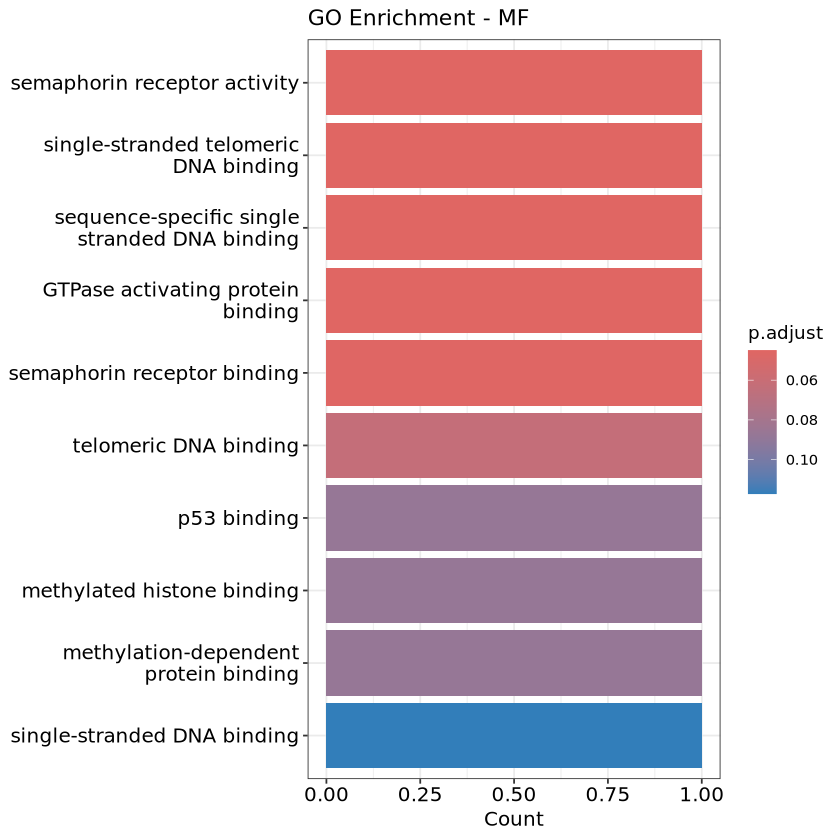

In [70]:
barplot(TL1_AD1_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### image_AD

In [71]:
AD_xQTL_ego <- enrichGO(
  gene          = AD,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [72]:
head(AD_xQTL_ego, n=5)

ID         Description                                              
GO:0018023 GO:0018023 peptidyl-lysine trimethylation                           
GO:0034502 GO:0034502 protein localization to chromosome                       
GO:0010001 GO:0010001 glial cell differentiation                               
GO:1902850 GO:1902850 microtubule cytoskeleton organization involved in mitosis
GO:0018022 GO:0018022 peptidyl-lysine methylation                              
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0018023 3/190     10/21261  8.049447e-05 0.1494871 0.1386985
GO:0034502 7/190     127/21261 1.476036e-04 0.1494871 0.1386985
GO:0010001 10/190    276/21261 1.977928e-04 0.1494871 0.1386985
GO:1902850 8/190     180/21261 2.215445e-04 0.1494871 0.1386985
GO:0018022 5/190     66/21261  3.107262e-04 0.1563081 0.1450272
           geneID                                                                                                                                                         
GO:0018023 ENSG00000181555/ENSG00000145002/ENSG00000186523                                                                                                                
GO:0034502 ENSG00000181555/ENSG00000173273/ENSG00000105229/ENSG00000278463/ENSG00000254093/ENSG00000275126/ENSG00000139579                                                
GO:0010001 ENSG00000186868/ENSG00000125966/ENSG00000067560/ENSG00000114646/ENSG00000128271/ENSG00000110492/ENSG00000102882/ENSG00000166886/ENSG00000131095/ENSG00000038427
GO:1902850 ENSG00000066629/ENSG00000181555/ENSG00000173273/ENSG00000047849/ENSG00000067560/ENSG00000037042/ENSG00000131462/ENSG00000175216                                
GO:0018022 ENSG00000181555/ENSG00000145002/ENSG00000186523/ENSG00000120071/ENSG00000025293                                                                                
           Count
GO:0018023  3   
GO:0034502  7   
GO:0010001 10   
GO:1902850  8   
GO:0018022  5

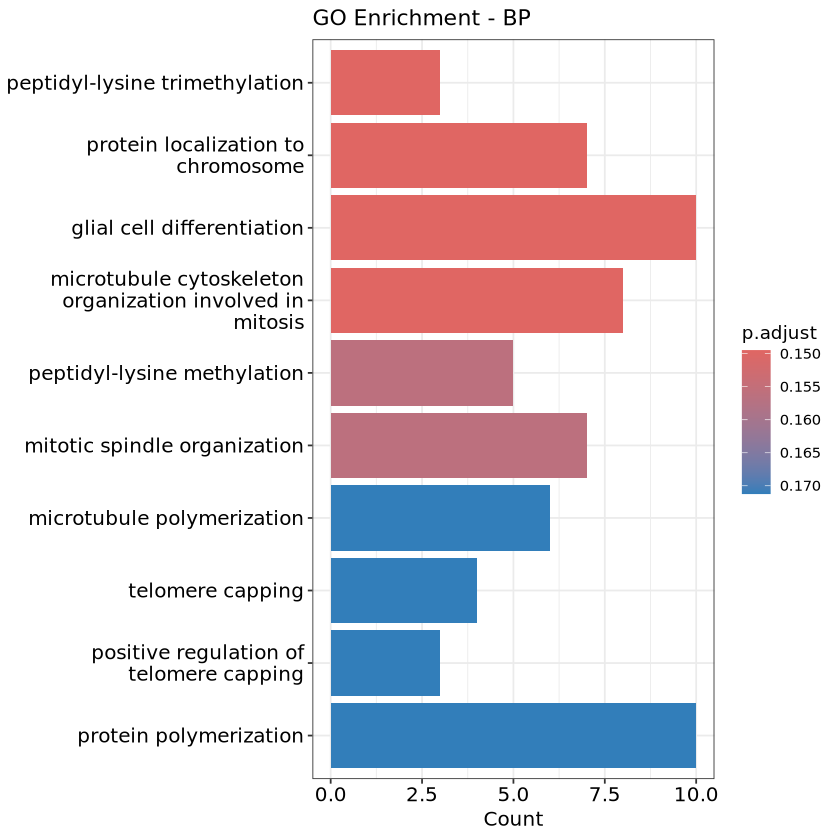

In [73]:
barplot(AD_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [74]:
AD_xQTL_ego_cc <- enrichGO(
  gene          = AD,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [75]:
head(AD_xQTL_ego_cc, n=5)

ID         Description           GeneRatio BgRatio   pvalue      
GO:0036064 GO:0036064 ciliary basal body    9/193     181/22568 2.692513e-05
GO:0030673 GO:0030673 axolemma              4/193     26/22568  6.688947e-05
GO:0031252 GO:0031252 cell leading edge     13/193    461/22568 1.788878e-04
GO:0001741 GO:0001741 XY body               3/193     16/22568  3.176696e-04
GO:0031256 GO:0031256 leading edge membrane 8/193     200/22568 3.371740e-04
           p.adjust    qvalue     
GO:0036064 0.008373714 0.007057217
GO:0030673 0.010401313 0.008766041
GO:0031252 0.018544706 0.015629148
GO:0001741 0.018553723 0.015636747
GO:0031256 0.018553723 0.015636747
           geneID                                                                                                                                                                                                         
GO:0036064 ENSG00000100592/ENSG00000186094/ENSG00000076201/ENSG00000100578/ENSG00000111490/ENSG00000126001/ENSG00000135912/ENSG00000174989/ENSG00000131462                                                                
GO:0030673 ENSG00000186868/ENSG00000029534/ENSG00000128271/ENSG00000115306                                                                                                                                                
GO:0031252 ENSG00000186868/ENSG00000067560/ENSG00000029534/ENSG00000146648/ENSG00000128271/ENSG00000088992/ENSG00000088280/ENSG00000115306/ENSG00000137312/ENSG00000131462/ENSG00000108852/ENSG00000149091/ENSG00000198561
GO:0001741 ENSG00000173473/ENSG00000143194/ENSG00000012048                                                                                                                                                                
GO:0031256 ENSG00000186868/ENSG00000067560/ENSG00000029534/ENSG00000146648/ENSG00000128271/ENSG00000088992/ENSG00000115306/ENSG00000108852                                                                                
           Count
GO:0036064  9   
GO:0030673  4   
GO:0031252 13   
GO:0001741  3   
GO:0031256  8

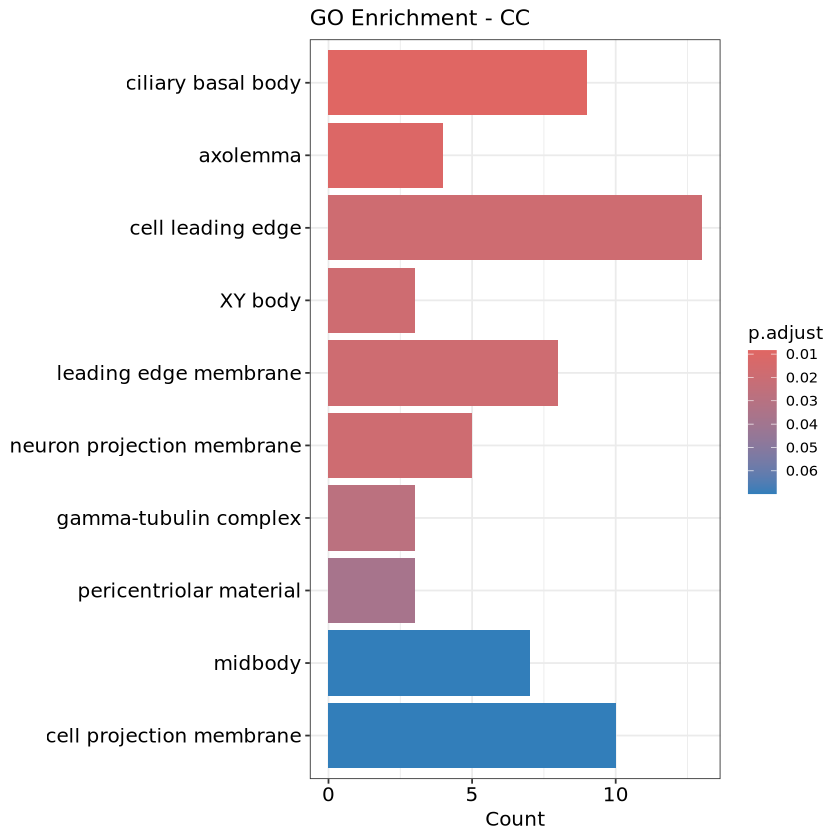

In [76]:
barplot(AD_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [77]:
AD_xQTL_ego_mf <- enrichGO(
  gene          = AD,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [78]:
head(AD_xQTL_ego_mf, n=5)

ID         Description                           GeneRatio BgRatio  
GO:0044389 GO:0044389 ubiquitin-like protein ligase binding 12/190    382/21059
GO:0031625 GO:0031625 ubiquitin protein ligase binding      11/190    363/21059
GO:0015631 GO:0015631 tubulin binding                       11/190    397/21059
GO:0008081 GO:0008081 phosphoric diester hydrolase activity 5/190     97/21059 
GO:0019887 GO:0019887 protein kinase regulator activity     8/190     249/21059
           pvalue       p.adjust   qvalue    
GO:0044389 0.0001917691 0.06769449 0.06217356
GO:0031625 0.0004793662 0.08460813 0.07770778
GO:0015631 0.0009992405 0.11757730 0.10798810
GO:0008081 0.0018694913 0.12418972 0.11406123
GO:0019887 0.0019586763 0.12418972 0.11406123
           geneID                                                                                                                                                                                         
GO:0044389 ENSG00000050130/ENSG00000147324/ENSG00000170633/ENSG00000100567/ENSG00000146648/ENSG00000105229/ENSG00000185104/ENSG00000012048/ENSG00000136560/ENSG00000109332/ENSG00000170581/ENSG00000133104
GO:0031625 ENSG00000050130/ENSG00000147324/ENSG00000170633/ENSG00000100567/ENSG00000146648/ENSG00000105229/ENSG00000185104/ENSG00000012048/ENSG00000136560/ENSG00000109332/ENSG00000133104                
GO:0015631 ENSG00000138175/ENSG00000066629/ENSG00000186868/ENSG00000186094/ENSG00000181555/ENSG00000047849/ENSG00000188042/ENSG00000137177/ENSG00000135912/ENSG00000012048/ENSG00000175216                
GO:0008081 ENSG00000073417/ENSG00000136960/ENSG00000115556/ENSG00000102886/ENSG00000161714                                                                                                                
GO:0019887 ENSG00000073417/ENSG00000155792/ENSG00000146648/ENSG00000088992/ENSG00000185104/ENSG00000186834/ENSG00000115592/ENSG00000175224                                                                
           Count
GO:0044389 12   
GO:0031625 11   
GO:0015631 11   
GO:0008081  5   
GO:0019887  8

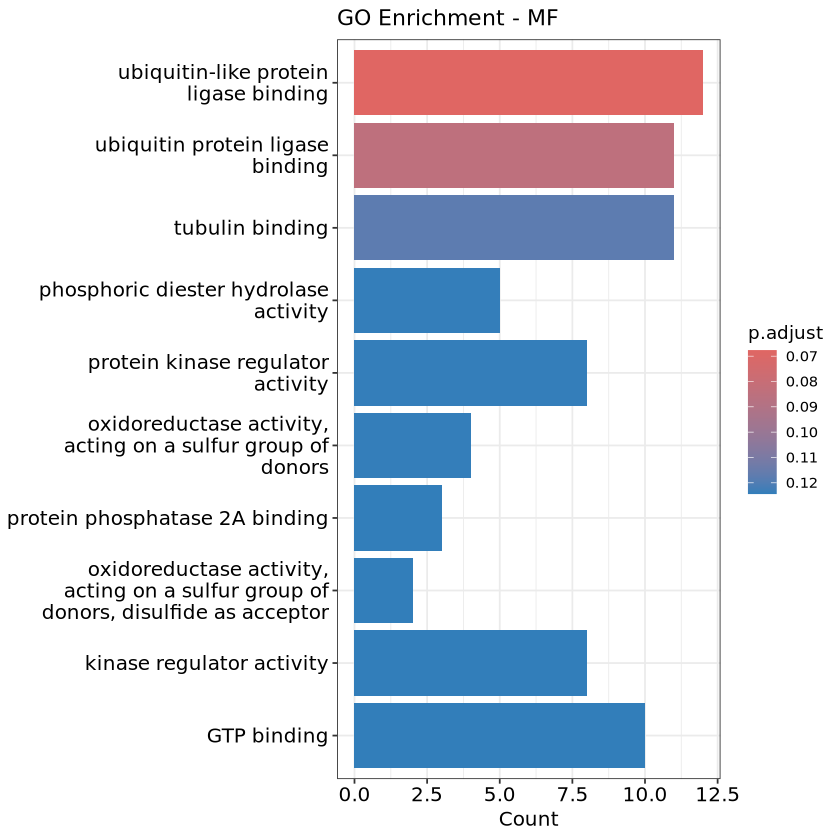

In [79]:
barplot(AD_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [15]:
entrez_ids <- bitr(AD, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“1.46% of input gene IDs are fail to map...”


In [16]:
kegg_enrich %>% head(n=20)

category                             subcategory                    
hsa05133 Human Diseases                       Infectious disease: bacterial  
hsa04928 Organismal Systems                   Endocrine system               
hsa04520 Cellular Processes                   Cellular community - eukaryotes
hsa05034 Human Diseases                       Substance dependence           
hsa05322 Human Diseases                       Immune disease                 
hsa04140 Cellular Processes                   Transport and catabolism       
hsa04810 Cellular Processes                   Cell motility                  
hsa05131 Human Diseases                       Infectious disease: bacterial  
hsa04610 Organismal Systems                   Immune system                  
hsa04613 Organismal Systems                   Immune system                  
hsa04072 Environmental Information Processing Signal transduction            
hsa04070 Environmental Information Processing Signal transduction            
hsa04015 Environmental Information Processing Signal transduction            
hsa04921 Organismal Systems                   Endocrine system               
hsa05160 Human Diseases                       Infectious disease: viral      
hsa04625 Organismal Systems                   Immune system                  
hsa04730 Organismal Systems                   Nervous system                 
hsa04350 Environmental Information Processing Signal transduction            
hsa04630 Environmental Information Processing Signal transduction            
hsa05171 Human Diseases                       Infectious disease: viral      
         ID       Description                                         GeneRatio
hsa05133 hsa05133 Pertussis                                           6/86     
hsa04928 hsa04928 Parathyroid hormone synthesis, secretion and action 6/86     
hsa04520 hsa04520 Adherens junction                                   5/86     
hsa05034 hsa05034 Alcoholism                                          7/86     
hsa05322 hsa05322 Systemic lupus erythematosus                        6/86     
hsa04140 hsa04140 Autophagy - animal                                  6/86     
hsa04810 hsa04810 Regulation of actin cytoskeleton                    7/86     
hsa05131 hsa05131 Shigellosis                                         7/86     
hsa04610 hsa04610 Complement and coagulation cascades                 4/86     
hsa04613 hsa04613 Neutrophil extracellular trap formation             6/86     
hsa04072 hsa04072 Phospholipase D signaling pathway                   5/86     
hsa04070 hsa04070 Phosphatidylinositol signaling system               4/86     
hsa04015 hsa04015 Rap1 signaling pathway                              6/86     
hsa04921 hsa04921 Oxytocin signaling pathway                          5/86     
hsa05160 hsa05160 Hepatitis C                                         5/86     
hsa04625 hsa04625 C-type lectin receptor signaling pathway            4/86     
hsa04730 hsa04730 Long-term depression                                3/86     
hsa04350 hsa04350 TGF-beta signaling pathway                          4/86     
hsa04630 hsa04630 JAK-STAT signaling pathway                          5/86     
hsa05171 hsa05171 Coronavirus disease - COVID-19                      6/86     
         BgRatio  pvalue       p.adjust   qvalue    
hsa05133 78/9446  7.261559e-05 0.01684682 0.01475243
hsa04928 115/9446 6.084818e-04 0.07058388 0.06180894
hsa04520 93/9446  1.542969e-03 0.09068934 0.07941489
hsa05034 191/9446 1.729626e-03 0.09068934 0.07941489
hsa05322 144/9446 1.954512e-03 0.09068934 0.07941489
hsa04140 169/9446 4.333649e-03 0.16756777 0.14673585
hsa04810 232/9446 5.105970e-03 0.16922642 0.14818829
hsa05131 253/9446 8.101473e-03 0.20407208 0.17870195
hsa04610 88/9446  8.360740e-03 0.20407208 0.17870195
hsa04613 196/9446 8.796210e-03 0.20407208 0.17870195
hsa04072 149/9446 1.143390e-02 0.22129471 0.19378348
hsa04070 98/9446  1.209634e-02 0.22129471 0.19378348
hs

In [19]:
pertussis = entrez_ids |> filter(ENTREZID %in% c("387","5595","721","720","110384692","51561"))
all |> filter(gene_id %in% pertussis$ENSEMBL)

#chr  start    end      gene_id         source gene_name event_id    
1  chr3  46680000 50412998 ENSG00000067560 TWAS   RHOA      image_AD1   
2  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_AD2   
3  chr6  29640000 33560000 ENSG00000224389 TWAS   C4B       image_AD2   
4  chr6  29640000 33560000 ENSG00000244731 TWAS   C4A       image_AD2   
5  chr12 56334173 56340409 ENSG00000110944 QTL    IL23A     image_AD2   
6  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging2
7  chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging2
8  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging3
9  chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging3
10 chr12 56334173 56340409 ENSG00000110944 QTL    IL23A     image_Aging4
11 chr6  29640000 33560000 ENSG00000224389 TWAS   C4B       image_Aging5
12 chr6  29640000 33560000 ENSG00000244731 TWAS   C4A       image_Aging5
13 chr6  31982056 32002680 ENSG00000244731 QTL    C4A       image_Aging5
14 chr6  32014794 32035417 ENSG00000224389 QTL    C4B       image_Aging5
15 chr6  29640000 33560000 ENSG00000244731 TWAS   C4A       TL1         
16 chr6  29640000 33560000 ENSG00000224389 TWAS   C4B       TL1

In [20]:
secretion = entrez_ids |> filter(ENTREZID %in% c("10893","387","2768","1956","5595","1388"))
all |> filter(gene_id %in% secretion$ENSEMBL)

#chr  start    end      gene_id         source gene_name event_id    
1  chr20 34226689 37080000 ENSG00000125966 TWAS   MMP24     image_AD1   
2  chr3  46680000 50412998 ENSG00000067560 TWAS   RHOA      image_AD1   
3  chr7   2728104  2844307 ENSG00000146535 QTL    GNA12     image_AD1   
4  chr7  55019016 55211627 ENSG00000146648 QTL    EGFR      image_AD1   
5  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_AD2   
6  chr20 34226689 37080000 ENSG00000125966 TWAS   MMP24     image_AD2   
7  chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     image_AD2   
8  chr7   2728104  2844307 ENSG00000146535 QTL    GNA12     image_Aging1
9  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging2
10 chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging2
11 chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging3
12 chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging3
13 chr7   2728104  2844307 ENSG00000146535 QTL    GNA12     image_Aging4
14 chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     image_Aging5
15 chr7         0  6000000 ENSG00000146535 TWAS   GNA12     image_Aging5
16 chr7   2728104  2844307 ENSG00000146535 QTL    GNA12     image_Aging5
17 chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     TL1

In [21]:
junction = entrez_ids |> filter(ENTREZID %in% c("387","1956","5595","83605","1500"))
all |> filter(gene_id %in% junction$ENSEMBL)

#chr  start    end      gene_id         source gene_name event_id    
1 chr3  46680000 50412998 ENSG00000067560 TWAS   RHOA      image_AD1   
2 chr7  55019016 55211627 ENSG00000146648 QTL    EGFR      image_AD1   
3 chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_AD2   
4 chr7  44999474 45076468 ENSG00000136280 QTL    CCM2      image_AD2   
5 chr11 57753242 57819545 ENSG00000198561 QTL    CTNND1    image_AD2   
6 chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging2
7 chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging2
8 chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging3
9 chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging3

In [22]:
alcohol = entrez_ids |> filter(ENTREZID %in% c("135","5595","8335","1388","10014","8969","8368"))
all |> filter(gene_id %in% alcohol$ENSEMBL)

#chr  start    end      gene_id         source gene_name event_id    
1  chr22 24417878 24442356 ENSG00000128271 QTL    ADORA2A   image_AD1   
2  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_AD2   
3  chr6  25033092 30480000 ENSG00000278463 TWAS   H2AC4     image_AD2   
4  chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     image_AD2   
5  chr17 42560000 46680000 ENSG00000108840 TWAS   HDAC5     image_AD2   
6  chr6  27133041 27135290 ENSG00000196787 QTL    H2AC11    image_AD2   
7  chr6  27873147 27873533 ENSG00000275126 QTL    H4C13     image_AD2   
8  chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging2
9  chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging2
10 chr16 28360000 34000000 ENSG00000102882 TWAS   MAPK3     image_Aging3
11 chr16 30114104 30123505 ENSG00000102882 QTL    MAPK3     image_Aging3
12 chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     image_Aging5
13 chr6  29640000 33560000 ENSG00000213676 TWAS   ATF6B     TL1         
14 chr6  25033092 30480000 ENSG00000278463 TWAS   H2AC4     TL1         
15 chr6  25960000 30480000 ENSG00000275126 TWAS   H4C13     TL1         
16 chr17 42560000 46680000 ENSG00000108840 TWAS   HDAC5     TL1

In [23]:
autoimmune = entrez_ids |> filter(ENTREZID %in% c("8335","721","720","110384692","8969","8368"))
all |> filter(gene_id %in% autoimmune$ENSEMBL)

#chr start    end      gene_id         source gene_name event_id    
1  chr6 25033092 30480000 ENSG00000278463 TWAS   H2AC4     image_AD2   
2  chr6 29640000 33560000 ENSG00000224389 TWAS   C4B       image_AD2   
3  chr6 29640000 33560000 ENSG00000244731 TWAS   C4A       image_AD2   
4  chr6 27133041 27135290 ENSG00000196787 QTL    H2AC11    image_AD2   
5  chr6 27873147 27873533 ENSG00000275126 QTL    H4C13     image_AD2   
6  chr6 29640000 33560000 ENSG00000224389 TWAS   C4B       image_Aging5
7  chr6 29640000 33560000 ENSG00000244731 TWAS   C4A       image_Aging5
8  chr6 31982056 32002680 ENSG00000244731 QTL    C4A       image_Aging5
9  chr6 32014794 32035417 ENSG00000224389 QTL    C4B       image_Aging5
10 chr6 29640000 33560000 ENSG00000244731 TWAS   C4A       TL1         
11 chr6 25033092 30480000 ENSG00000278463 TWAS   H2AC4     TL1         
12 chr6 25960000 30480000 ENSG00000275126 TWAS   H4C13     TL1         
13 chr6 29640000 33560000 ENSG00000224389 TWAS   C4B       TL1

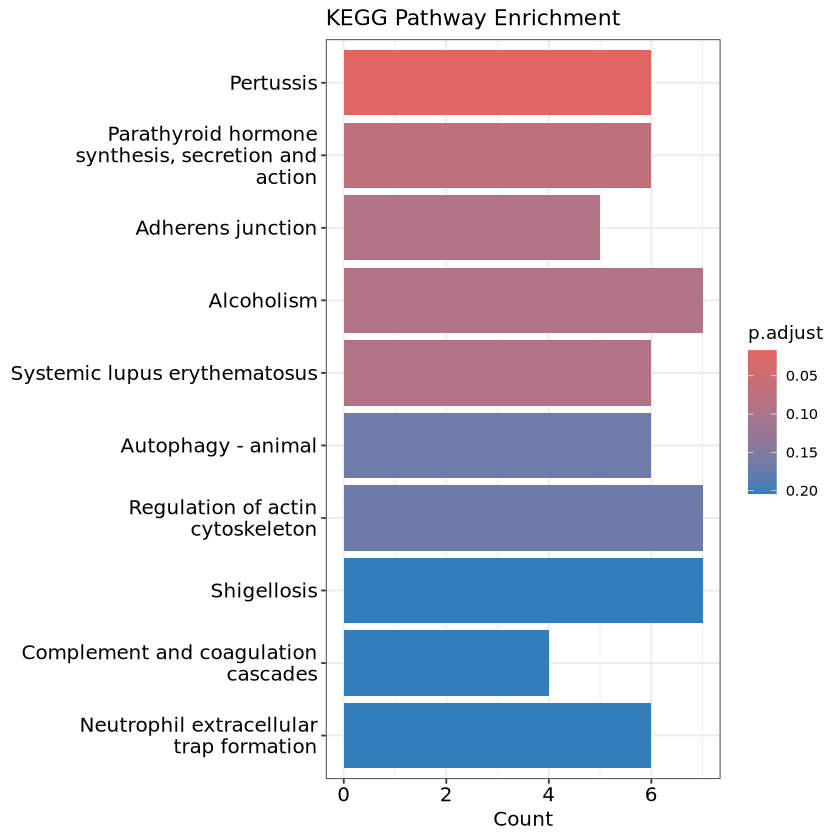

In [17]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")